# コピュラを扱うPythonパッケージ

## 準備

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

from copulas import datasets, univariate, bivariate, multivariate

import warnings
warnings.simplefilter('ignore')

## データセット（copulas.datasets）

### 単変量サンプルデータ

#### ベルヌーイ分布

- `copulas.datasets.sample_univariate_bernoulli`
    - $p=0.3$
- [Wikipedia/ベルヌーイ分布](https://ja.wikipedia.org/wiki/%E3%83%99%E3%83%AB%E3%83%8C%E3%83%BC%E3%82%A4%E5%88%86%E5%B8%83)

In [2]:
univariate_bernoulli = datasets.sample_univariate_bernoulli(size=1000, seed=42)
univariate_bernoulli.describe()

count    1000.000000
mean        0.319000
std         0.466322
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
dtype: float64

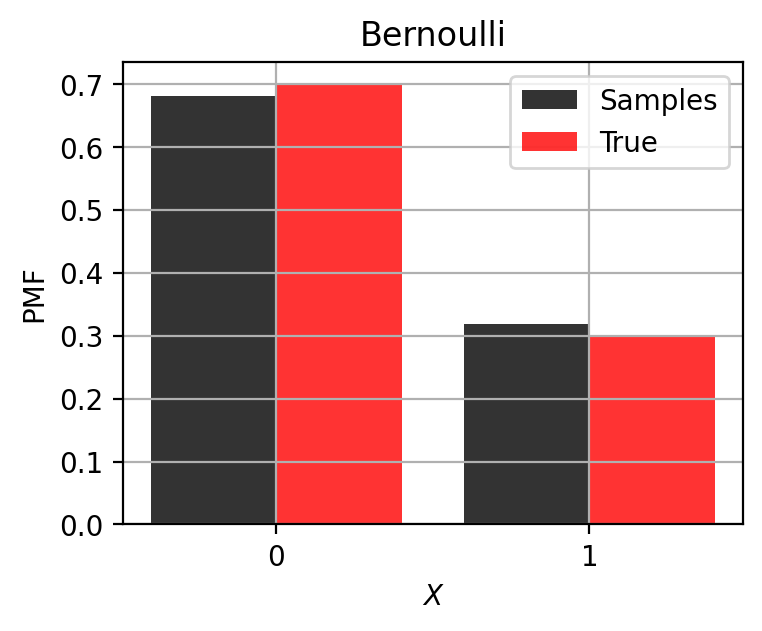

In [3]:
plt.figure(figsize=[4,3], dpi=200)
plt.bar(np.arange(2)-0.2, univariate_bernoulli.value_counts(normalize=True), color='black', label='Samples', alpha=0.8, width=0.4)
plt.bar(np.arange(2)+0.2, sp.stats.bernoulli.pmf(k=np.arange(2), p=0.3), color='red', label='True', alpha=0.8, width=0.4)
plt.xticks(np.arange(2))
plt.xlabel(r'$X$')
plt.ylabel('PMF')
plt.title('Bernoulli')
plt.legend()
plt.grid()
plt.show()

#### ベータ分布

- `copulas.datasets.sample_univariate_beta`
    - $\alpha=3$
    - $\beta=1$
    - $\text{location}=4$
- [Wikipedia/ベータ分布](https://ja.wikipedia.org/wiki/%E3%83%99%E3%83%BC%E3%82%BF%E5%88%86%E5%B8%83)

In [4]:
univariate_beta = datasets.sample_univariate_beta(size=1000, seed=42)
univariate_beta.describe()

count    1000.000000
mean        4.753897
std         0.197522
min         4.095559
25%         4.637237
50%         4.802029
75%         4.914152
max         4.999985
dtype: float64

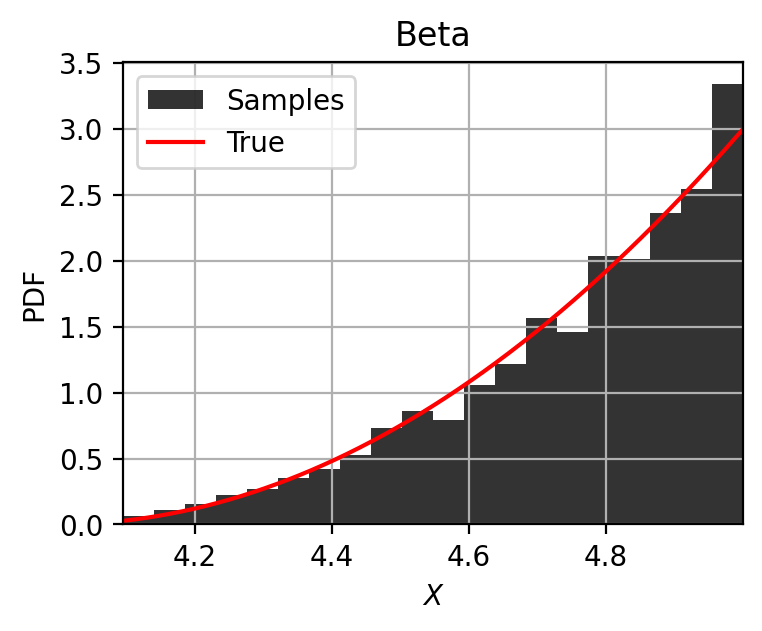

In [5]:
x_min = np.min(univariate_beta)
x_max = np.max(univariate_beta)
x = np.linspace(x_min, x_max, 1001)

plt.figure(figsize=[4,3], dpi=200)
plt.hist(univariate_beta, density=True, color='black', label='Samples', bins=20, alpha=0.8)
plt.plot(x, sp.stats.beta.pdf(x, a=3, b=1, loc=4), color='red', label='True')
plt.xlim(x_min, x_max)
plt.xlabel(r'$X$')
plt.ylabel('PDF')
plt.title('Beta')
plt.legend()
plt.grid()
plt.show()

#### 二峰分布（正規分布）

- `copulas.datasets.sample_univariate_bimodal`
    - $X\sim 0.3\mathcal{N}(0,1)+0.7\mathcal{N}(10,1)$
- [Wikipedia/Multimodal_distribution](https://en.wikipedia.org/wiki/Multimodal_distribution)

In [6]:
univariate_bimodal = datasets.sample_univariate_bimodal(size=1000, seed=42)
univariate_bimodal.describe()

count    1000.000000
mean        6.830066
std         4.813490
min        -3.241267
25%         0.642253
50%         9.401486
75%        10.404561
max        13.193108
dtype: float64

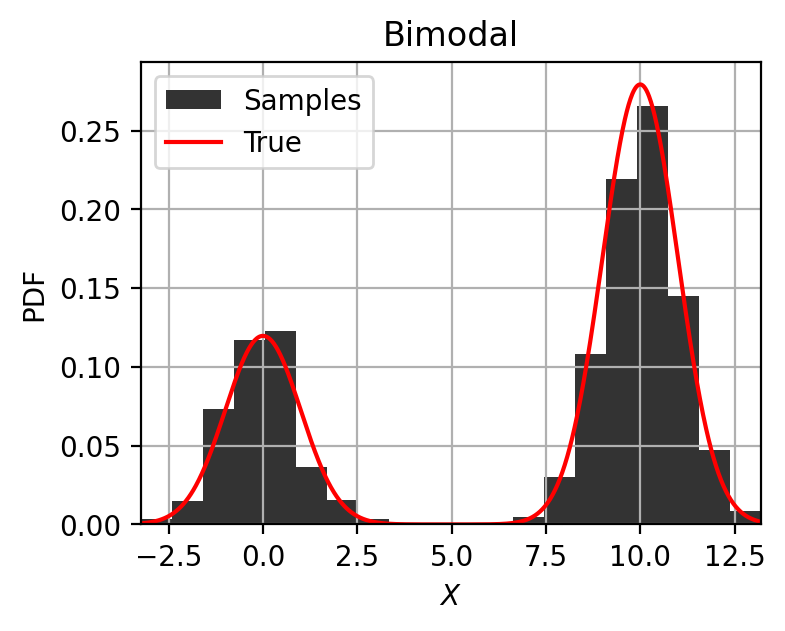

In [7]:
x_min = np.min(univariate_bimodal)
x_max = np.max(univariate_bimodal)
x = np.linspace(x_min, x_max, 1001)

plt.figure(figsize=[4,3], dpi=200)
plt.hist(univariate_bimodal, density=True, color='black', label='Samples', bins=20, alpha=0.8)
plt.plot(x, 0.3*sp.stats.norm.pdf(x)+0.7*sp.stats.norm.pdf(x, loc=10), color='red', label='True')
plt.xlim(x_min, x_max)
plt.xlabel(r'$X$')
plt.ylabel('PDF')
plt.title('Bimodal')
plt.legend()
plt.grid()
plt.show()

#### 退化分布

- `copulas.datasets.sample_univariate_degenerate`
    - 確率1で特定の値のみ取る分布
- [Wikipedia/退化分布](https://ja.wikipedia.org/wiki/%E9%80%80%E5%8C%96%E5%88%86%E5%B8%83)

In [8]:
univariate_degenerate = datasets.sample_univariate_degenerate(size=1000, seed=42)
univariate_degenerate.describe()

count    1.000000e+03
mean     3.745401e-01
std      1.110779e-16
min      3.745401e-01
25%      3.745401e-01
50%      3.745401e-01
75%      3.745401e-01
max      3.745401e-01
dtype: float64

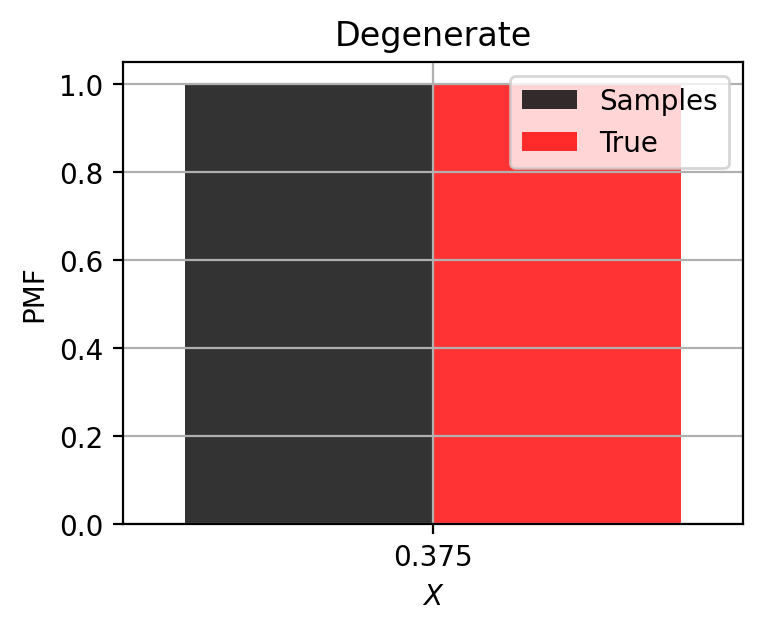

In [9]:
plt.figure(figsize=[4,3], dpi=200)
plt.bar(univariate_degenerate.unique()-0.2, univariate_degenerate.value_counts(normalize=True), color='black', label='Samples', alpha=0.8, width=0.4)
plt.bar(univariate_degenerate.unique()+0.2, 1, color='red', label='True', alpha=0.8, width=0.4)
plt.xticks(univariate_degenerate.unique())
plt.xlim(univariate_degenerate.unique()-0.5, univariate_degenerate.unique()+0.5)
plt.xlabel(r'$X$')
plt.ylabel('PMF')
plt.title('Degenerate')
plt.legend()
plt.grid()
plt.show()

#### 指数分布

- `copulas.datasets.sample_univariate_exponential`
    - $\lambda=1$
    - $\text{location}=3$
- [Wikipedia/指数分布](https://ja.wikipedia.org/wiki/%E6%8C%87%E6%95%B0%E5%88%86%E5%B8%83)

In [10]:
univariate_exponential = datasets.sample_univariate_exponential(size=1000, seed=42)
univariate_exponential.describe()

count    1000.000000
mean        3.972506
std         0.972510
min         3.004643
25%         3.269157
50%         3.686783
75%         4.363830
max        11.172446
dtype: float64

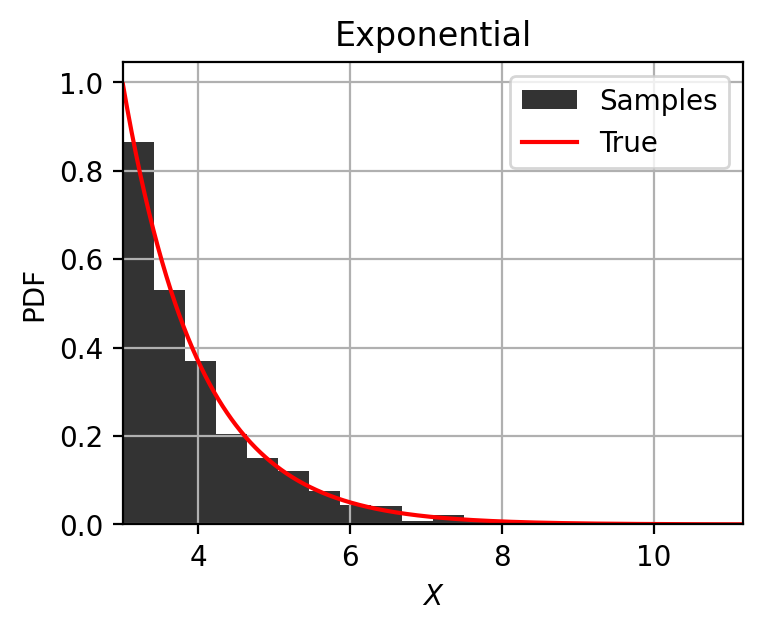

In [11]:
x_min = np.min(univariate_exponential)
x_max = np.max(univariate_exponential)
x = np.linspace(x_min, x_max, 1001)

plt.figure(figsize=[4,3], dpi=200)
plt.hist(univariate_exponential, density=True, color='black', label='Samples', bins=20, alpha=0.8)
plt.plot(x, sp.stats.expon.pdf(x, loc=3, scale=1), color='red', label='True')
plt.xlim(x_min, x_max)
plt.xlabel(r'$X$')
plt.ylabel('PDF')
plt.title('Exponential')
plt.legend()
plt.grid()
plt.show()

#### 正規分布

- `copulas.datasets.sample_univariate_normal`
    - $\mu=1$
    - $\sigma=1$
- [Wikipedia/正規分布](https://ja.wikipedia.org/wiki/%E6%AD%A3%E8%A6%8F%E5%88%86%E5%B8%83)

In [12]:
univariate_normal = datasets.sample_univariate_normal(size=1000, seed=42)
univariate_normal.describe()

count    1000.000000
mean        1.019332
std         0.979216
min        -2.241267
25%         0.352410
50%         1.025301
75%         1.647944
max         4.852731
dtype: float64

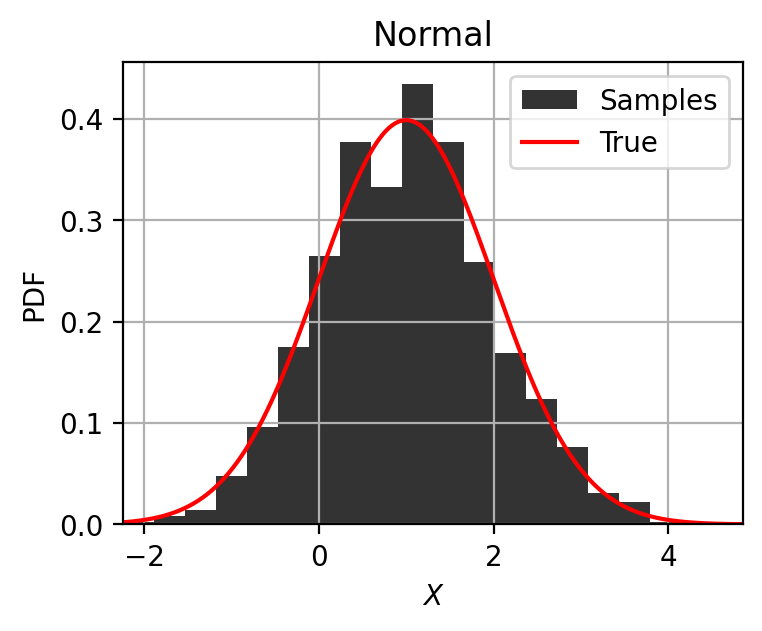

In [13]:
x_min = np.min(univariate_normal)
x_max = np.max(univariate_normal)
x = np.linspace(x_min, x_max, 1001)

plt.figure(figsize=[4,3], dpi=200)
plt.hist(univariate_normal, density=True, color='black', label='Samples', bins=20, alpha=0.8)
plt.plot(x, sp.stats.norm.pdf(x, loc=1, scale=1), color='red', label='True')
plt.xlim(x_min, x_max)
plt.xlabel(r'$X$')
plt.ylabel('PDF')
plt.title('Normal')
plt.legend()
plt.grid()
plt.show()

#### 一様分布

- `copulas.datasets.sample_univariate_uniform`
    - $a=-1$
    - $b=3$
- [Wikipedia/連続一様分布](https://ja.wikipedia.org/wiki/%E9%80%A3%E7%B6%9A%E4%B8%80%E6%A7%98%E5%88%86%E5%B8%83)

In [14]:
univariate_uniform = datasets.sample_univariate_uniform(size=1000, seed=42)
univariate_uniform.describe()

count    1000.000000
mean        0.961026
std         1.168549
min        -0.981472
25%        -0.056107
50%         0.987230
75%         1.977278
max         2.998871
dtype: float64

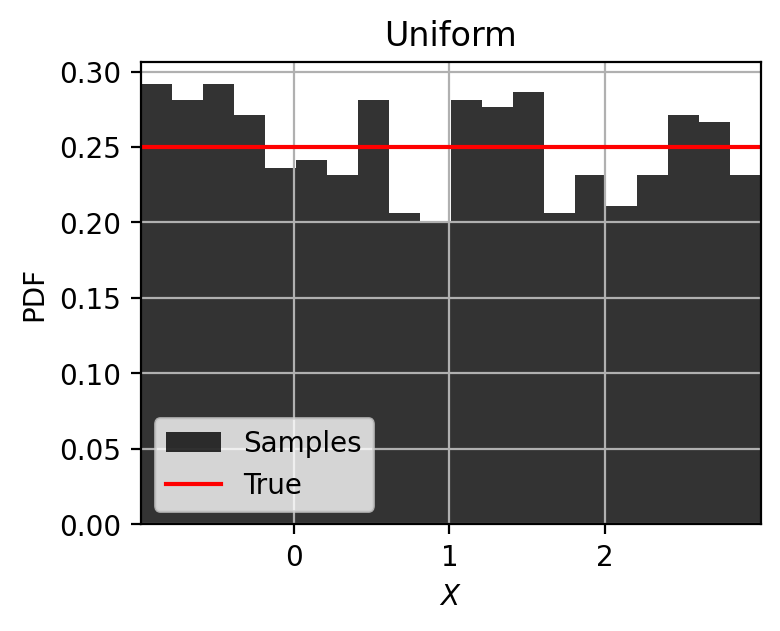

In [15]:
x_min = np.min(univariate_uniform)
x_max = np.max(univariate_uniform)
x = np.linspace(x_min, x_max, 1001)

plt.figure(figsize=[4,3], dpi=200)
plt.hist(univariate_uniform, density=True, color='black', label='Samples', bins=20, alpha=0.8)
plt.plot(x, sp.stats.uniform.pdf(x, loc=-1, scale=4), color='red', label='True')
plt.xlim(x_min, x_max)
plt.xlabel(r'$X$')
plt.ylabel('PDF')
plt.title('Uniform')
plt.legend()
plt.grid()
plt.show()

#### 全分布の一括生成

In [16]:
univariates = datasets.sample_univariates(size=1000, seed=42)
univariates.describe()

bernoulli      bimodal      uniform       normal    degenerate  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1.000000e+03   
mean      0.319000     6.830066     0.961026     1.019332  3.745401e-01   
std       0.466322     4.813490     1.168549     0.979216  1.110779e-16   
min       0.000000    -3.241267    -0.981472    -2.241267  3.745401e-01   
25%       0.000000     0.642253    -0.056107     0.352410  3.745401e-01   
50%       0.000000     9.401486     0.987230     1.025301  3.745401e-01   
75%       1.000000    10.404561     1.977278     1.647944  3.745401e-01   
max       1.000000    13.193108     2.998871     4.852731  3.745401e-01   

       exponential         beta  
count  1000.000000  1000.000000  
mean      3.972506     4.753897  
std       0.972510     0.197522  
min       3.004643     4.095559  
25%       3.269157     4.637237  
50%       3.686783     4.802029  
75%       4.363830     4.914152  
max      11.172446     4.999985

### 2変量サンプルデータ

- `copulas.datasets.sample_bivariate_age_income`
    - 年齢（age）と収入（income）に関するトイデータ
- 生成方法は公式ドキュメント参照
    - [公式ドキュメント](https://sdv.dev/Copulas/_modules/copulas/datasets.html#sample_bivariate_age_income)

In [17]:
bivariate_age_income = datasets.sample_bivariate_age_income(size=1000, seed=42)
bivariate_age_income.describe()

age       income
count  1000.000000  1000.000000
mean     43.425501   333.307659
std      14.039431   117.446434
min      18.613540     0.295913
25%      32.437622   336.463831
50%      41.441070   366.055976
75%      52.751687   394.781536
max      94.308014   457.172386

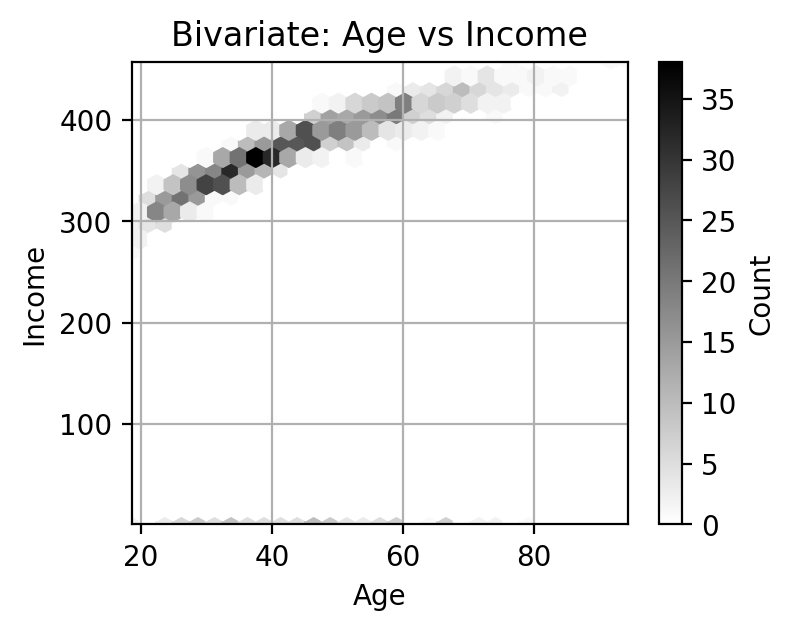

In [18]:
plt.figure(figsize=[4,3], dpi=200)
plt.hexbin(bivariate_age_income['age'], bivariate_age_income['income'], gridsize=30, cmap='binary')
plt.title('Bivariate: Age vs Income')
plt.xlim(bivariate_age_income['age'].min(), bivariate_age_income['age'].max())
plt.ylim(bivariate_age_income['income'].min(), bivariate_age_income['income'].max())
plt.xlabel('Age')
plt.ylabel('Income')
plt.colorbar(label='Count')
plt.grid()
plt.show()

### 3変量サンプルデータ

- `copulas.datasets.sample_trivariate_xyz`
    - $X\sim\text{Beta}(0.1,0.1)$
    - $Y\sim\text{Beta}(0.1,0.5)$
    - $Z\sim\mathcal{N}(0,1) +10Y$

In [19]:
trivariate_xyz = datasets.sample_trivariate_xyz(size=1000, seed=42)
trivariate_xyz.describe()

x             y            z
count  1.000000e+03  1.000000e+03  1000.000000
mean   4.877069e-01  1.740512e-01     1.719482
std    4.577264e-01  2.953310e-01     3.141824
min    1.418215e-23  2.619421e-49    -3.007632
25%    2.858653e-04  5.280553e-06    -0.285169
50%    3.821834e-01  4.966257e-03     0.594033
75%    9.981801e-01  2.029450e-01     2.358909
max    1.000000e+00  9.999824e-01    12.455912

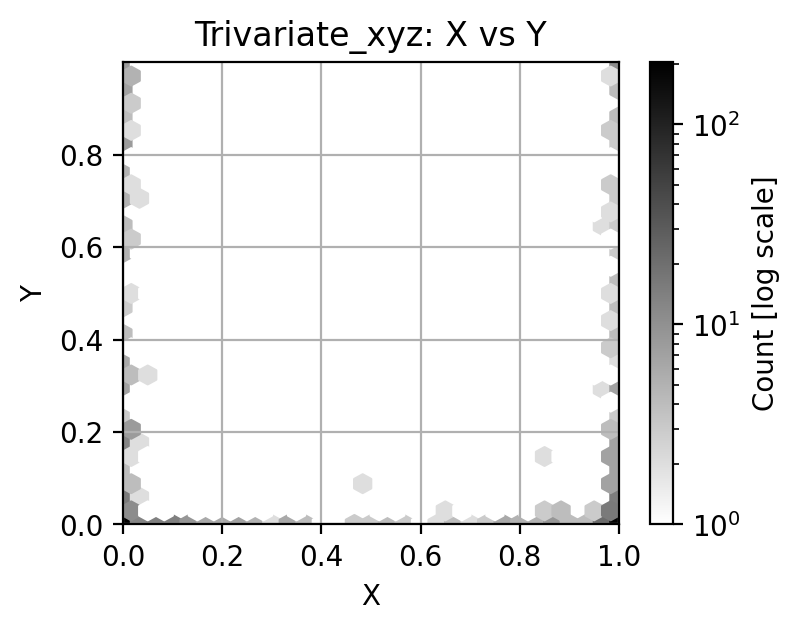

In [20]:
plt.figure(figsize=[4,3], dpi=200)
plt.hexbin(trivariate_xyz['x'], trivariate_xyz['y'], gridsize=30, bins='log', cmap='binary')
plt.title('Trivariate_xyz: X vs Y')
plt.xlim(trivariate_xyz['x'].min(), trivariate_xyz['x'].max())
plt.ylim(trivariate_xyz['y'].min(), trivariate_xyz['y'].max())
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Count [log scale]')
plt.grid()
plt.show()

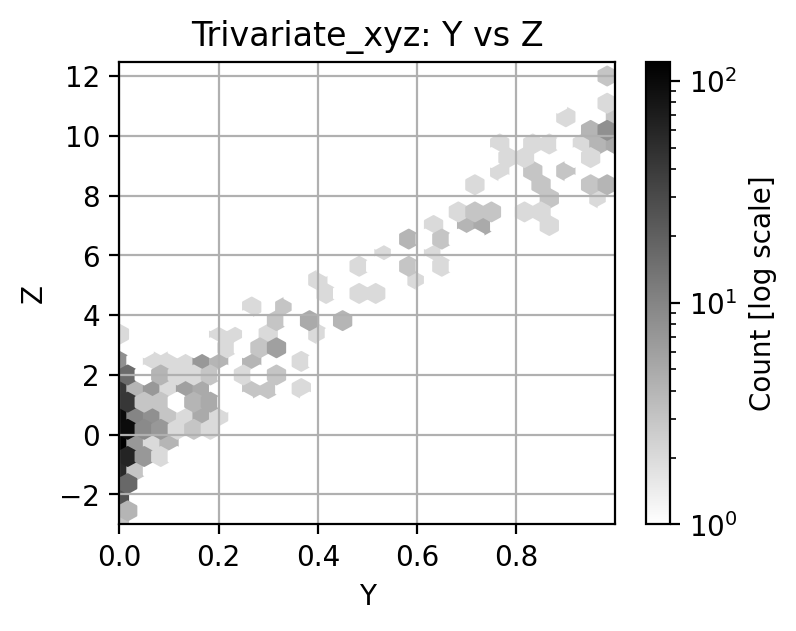

In [21]:
plt.figure(figsize=[4,3], dpi=200)
plt.hexbin(trivariate_xyz['y'], trivariate_xyz['z'], gridsize=30, bins='log', cmap='binary')
plt.title('Trivariate_xyz: Y vs Z')
plt.xlim(trivariate_xyz['y'].min(), trivariate_xyz['y'].max())
plt.ylim(trivariate_xyz['z'].min(), trivariate_xyz['z'].max())
plt.xlabel('Y')
plt.ylabel('Z')
plt.colorbar(label='Count [log scale]')
plt.grid()
plt.show()

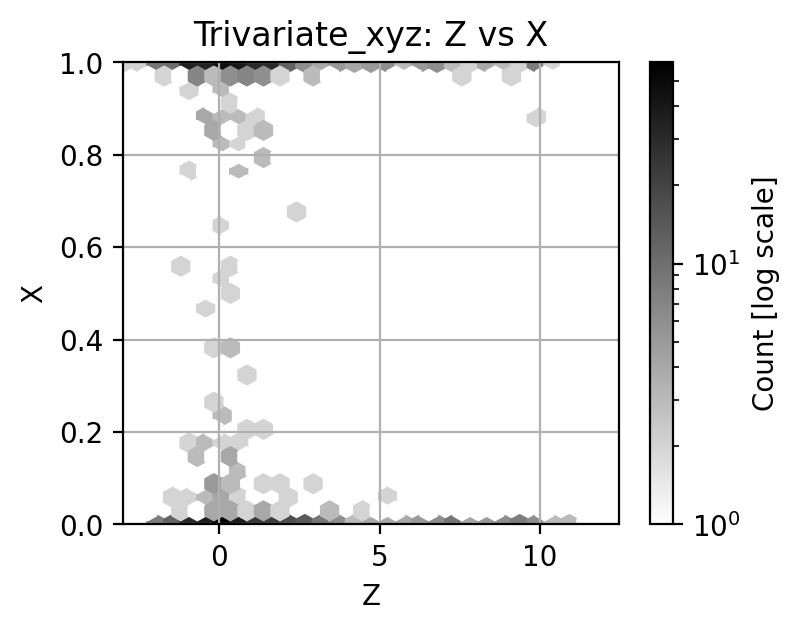

In [22]:
plt.figure(figsize=[4,3], dpi=200)
plt.hexbin(trivariate_xyz['z'], trivariate_xyz['x'], gridsize=30, bins='log', cmap='binary')
plt.title('Trivariate_xyz: Z vs X')
plt.xlim(trivariate_xyz['z'].min(), trivariate_xyz['z'].max())
plt.ylim(trivariate_xyz['x'].min(), trivariate_xyz['x'].max())
plt.xlabel('Z')
plt.ylabel('X')
plt.colorbar(label='Count [log scale]')
plt.grid()
plt.show()

## 単変量分布に基づくモデル化（copulas.univariate）

### 分布を指定して推定

※位置パラメータ$\mu$とスケールパラメータ$\sigma$は省略

- ベータ分布: `copulas.univariate.BetaUnivariate`
    - 形状パラメータ: $a>0$
    - 形状パラメータ: $b>0$

$$
f(x;a,b)=\frac{\Gamma(a+b)x^{a-1}(1-x)^{b-1}}{\Gamma(a)\Gamma(b)}\quad\text{for }0\leq x\leq 1
$$


- ガンマ分布: `copulas.univariate.GammaUnivariate`
    - 形状パラメータ: $a>0$
 
$$
f(x;a)=\frac{x^{a-1}e^{-x}}{\Gamma(a)}\quad\text{for }x\geq 0
$$


- 正規分布: `copulas.univariate.GaussianUnivariate`

$$
f(x)=\frac{1}{\sqrt{2\pi}}\exp\left(-\frac{x^2}{2}\right)\quad\text{for }x\in\mathbb{R}
$$


- 切断正規分布: `copulas.univariate.TruncatedGaussian`
    - 形状パラメータ: $a\in\mathbb{R}$
    - 形状パラメータ: $b\in\mathbb{R}$

$$
f(x;a,b)=\left\{
\begin{array}{ll}
\frac{\phi(x)}{\Phi(b)-\Phi(a)} & \text{for }a<x<b\\
0 & \text{otherwise}
\end{array}
\right.
$$



- t分布: `copulas.univariate.StudentTUnivariate`
    - 自由度: $\nu>0$
 
$$
f(x;\nu)=\frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\pi\nu}\Gamma\left(\frac{\nu}{2}\right)}\left(1+\frac{x^2}{\nu}\right)^{-\frac{\nu+1}{2}}\quad\text{for }x\in\mathbb{R}
$$


- 一様分布: `copulas.univariate.UniformUnivariate`

$$
f(x)=\left\{
\begin{array}{ll}
1 & \text{for }0\leq x\leq1\\
0 & \text{otherwise}
\end{array}
\right.
$$


- 対数ラプラス分布: `copulas.univariate.LogLaplace`
    - 形状パラメータ: $c>0$

$$
f(x;c)=\left\{
\begin{array}{ll}
\frac{c}{2}x^{c-1} & \text{for }0<x<1\\
\frac{c}{2}x^{-c-1} & \text{for }x\geq1
\end{array}
\right.
$$

In [23]:
# モデルはベータ分布に基づく `BetaUnivariate` クラス
# 訓練データはベータ分布から生成された `univariate_beta` を使用
model_beta = univariate.BetaUnivariate()  # モデル
model_beta.fit(univariate_beta)  # 学習
model_beta._params  # 推定されたパラメータ

{'loc': 4.052009283524141,
 'scale': 0.947975527152111,
 'a': 2.552323190906778,
 'b': 0.9041091899047314}

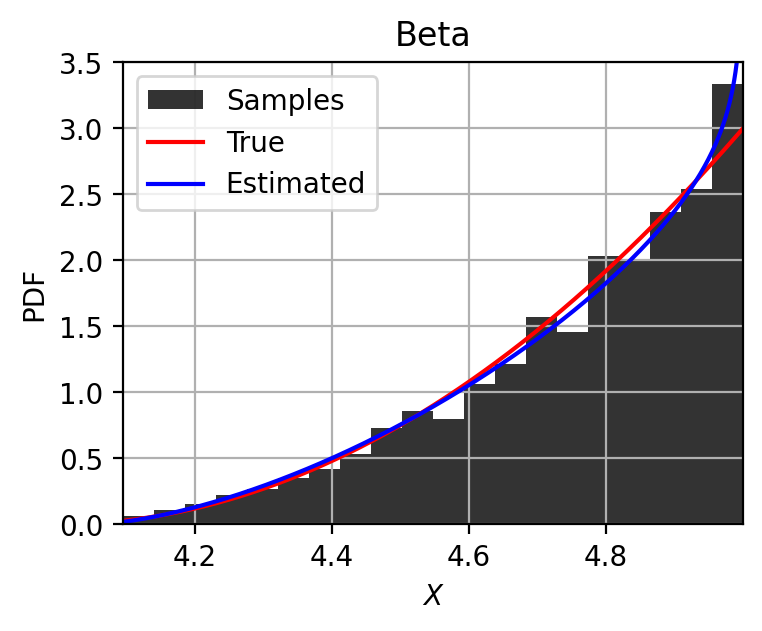

In [24]:
# 確率密度関数の推定結果をプロット
x_min = np.min(univariate_beta)
x_max = np.max(univariate_beta)
x = np.linspace(x_min, x_max, 1001)

plt.figure(figsize=[4,3], dpi=200)
plt.hist(univariate_beta, density=True, color='black', label='Samples', bins=20, alpha=0.8)
plt.plot(x, sp.stats.beta.pdf(x, a=3, b=1, loc=4), color='red', label='True')
plt.plot(x, model_beta.pdf(x), color='blue', label='Estimated')
plt.xlim(x_min, x_max)
plt.ylim(0, 3.5)
plt.xlabel(r'$X$')
plt.ylabel('PDF')
plt.title('Beta')
plt.legend()
plt.grid()
plt.show()

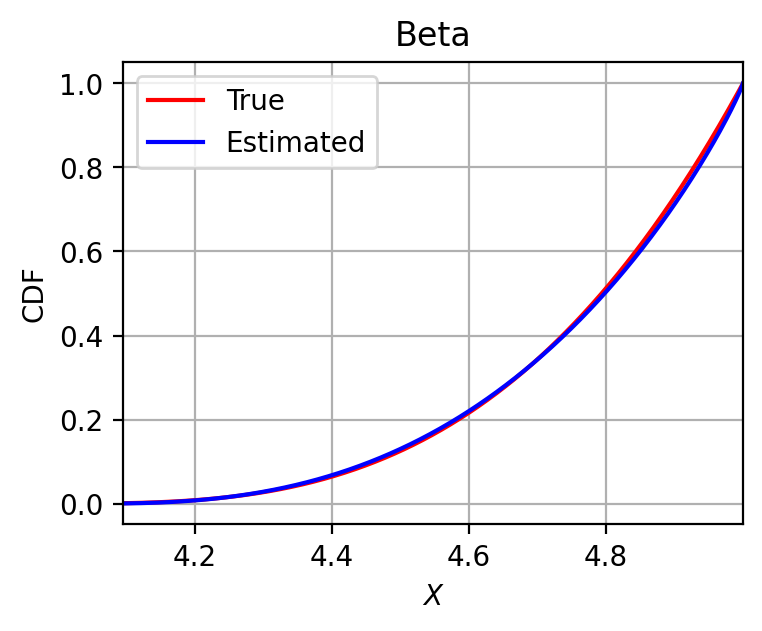

In [25]:
# 累積分布関数
plt.figure(figsize=[4,3], dpi=200)
plt.plot(x, sp.stats.beta.cdf(x, a=3, b=1, loc=4), color='red', label='True')
plt.plot(x, model_beta.cdf(x), color='blue', label='Estimated')
plt.xlim(x_min, x_max)
plt.xlabel(r'$X$')
plt.ylabel('CDF')
plt.title('Beta')
plt.legend()
plt.grid()
plt.show()

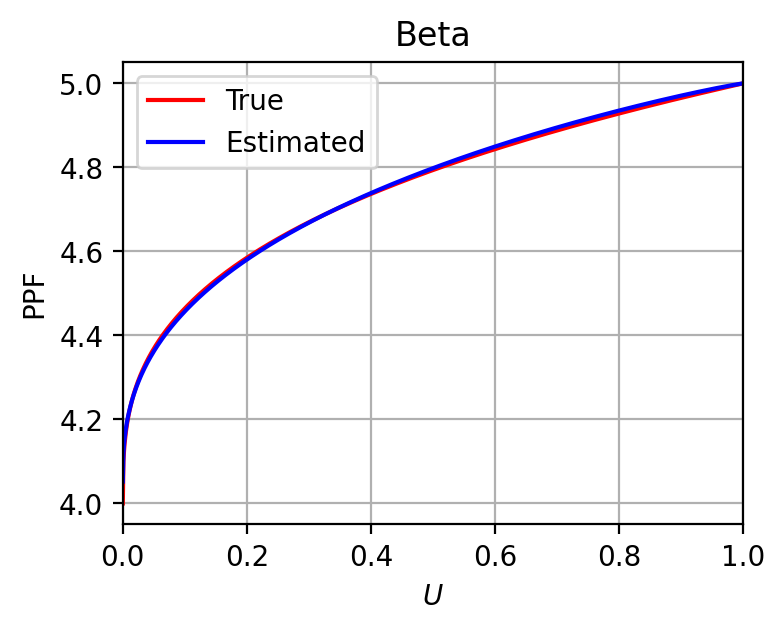

In [26]:
# パーセンタイル
u = np.linspace(0, 1, 1001)

plt.figure(figsize=[4,3], dpi=200)
plt.plot(u, sp.stats.beta.ppf(u, a=3, b=1, loc=4), color='red', label='True')
plt.plot(u, model_beta.ppf(u), color='blue', label='Estimated')
plt.xlim(0,1)
plt.xlabel(r'$U$')
plt.ylabel('PPF')
plt.title('Beta')
plt.legend()
plt.grid()
plt.show()

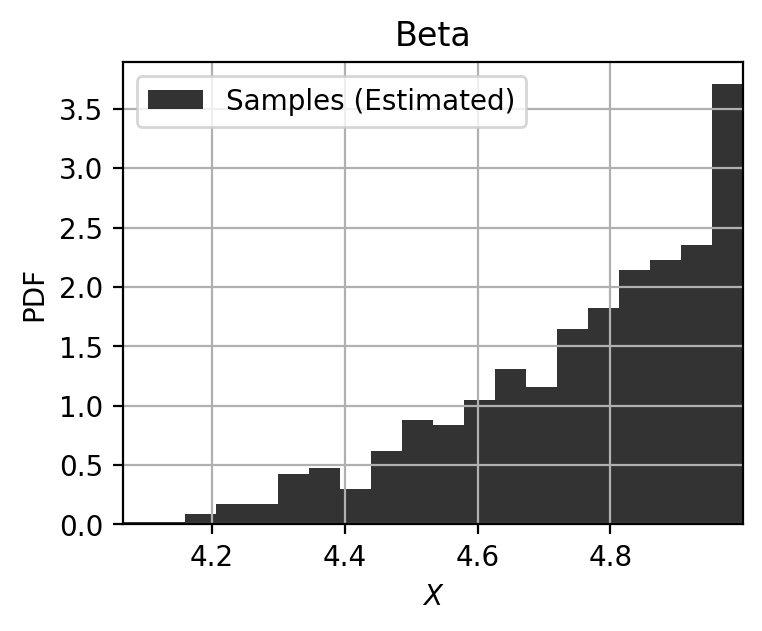

In [27]:
# 学習済みモデルからのサンプル
model_beta.set_random_state(random_state=42)
univariate_beta_new = model_beta.sample(n_samples=1000)

x_min = np.min(univariate_beta_new)
x_max = np.max(univariate_beta_new)
x = np.linspace(x_min, x_max, 1001)

plt.figure(figsize=[4,3], dpi=200)
plt.hist(univariate_beta_new, density=True, color='black', label='Samples (Estimated)', bins=20, alpha=0.8)
plt.xlim(x_min, x_max)
plt.xlabel(r'$X$')
plt.ylabel('PDF')
plt.title('Beta')
plt.legend()
plt.grid()
plt.show()

### 分布を指定せず推定

- カーネル密度推定: `copulas.univariate.GaussianKDE`
- copulas.univariateクラスからの推定: `copulas.univariate.Univariate`

In [28]:
# モデルは `GaussianKDE` クラス
# 訓練データはベータ分布から生成された `univariate_beta` を使用
model = univariate.Univariate()  # モデル
model.fit(univariate_beta)  # 学習
model.to_dict()  # 推定されたパラメータ

{'loc': 4.052009283524141,
 'scale': 0.947975527152111,
 'a': 2.552323190906778,
 'b': 0.9041091899047314,
 'type': 'copulas.univariate.beta.BetaUnivariate'}

In [29]:
# モデルは `GaussianKDE` クラス
# 訓練データはベータ分布から生成された `univariate_beta` を使用
model = univariate.GaussianKDE()  # モデル
model.fit(univariate_beta)  # 学習

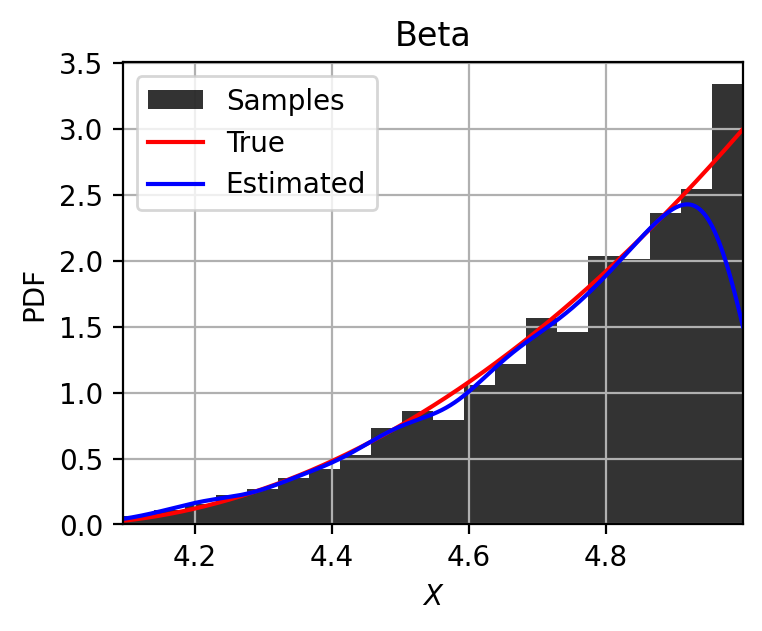

In [30]:
# 確率密度関数の推定結果をプロット
x_min = np.min(univariate_beta)
x_max = np.max(univariate_beta)
x = np.linspace(x_min, x_max, 1001)

plt.figure(figsize=[4,3], dpi=200)
plt.hist(univariate_beta, density=True, color='black', label='Samples', bins=20, alpha=0.8)
plt.plot(x, sp.stats.beta.pdf(x, a=3, b=1, loc=4), color='red', label='True')
plt.plot(x, model.pdf(x), color='blue', label='Estimated')
plt.xlim(x_min, x_max)
plt.xlabel(r'$X$')
plt.ylabel('PDF')
plt.title('Beta')
plt.legend()
plt.grid()
plt.show()

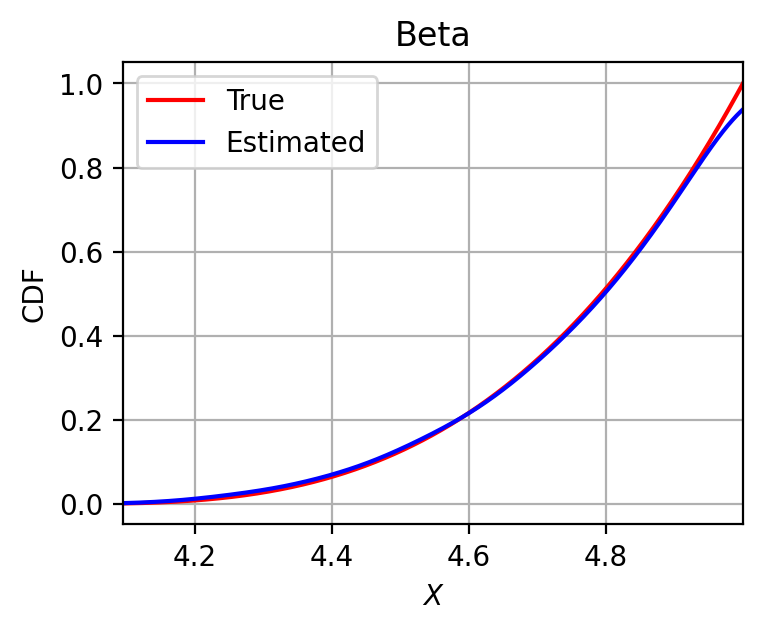

In [31]:
# 累積分布関数
plt.figure(figsize=[4,3], dpi=200)
plt.plot(x, sp.stats.beta.cdf(x, a=3, b=1, loc=4), color='red', label='True')
plt.plot(x, model.cdf(x), color='blue', label='Estimated')
plt.xlim(x_min, x_max)
plt.xlabel(r'$X$')
plt.ylabel('CDF')
plt.title('Beta')
plt.legend()
plt.grid()
plt.show()

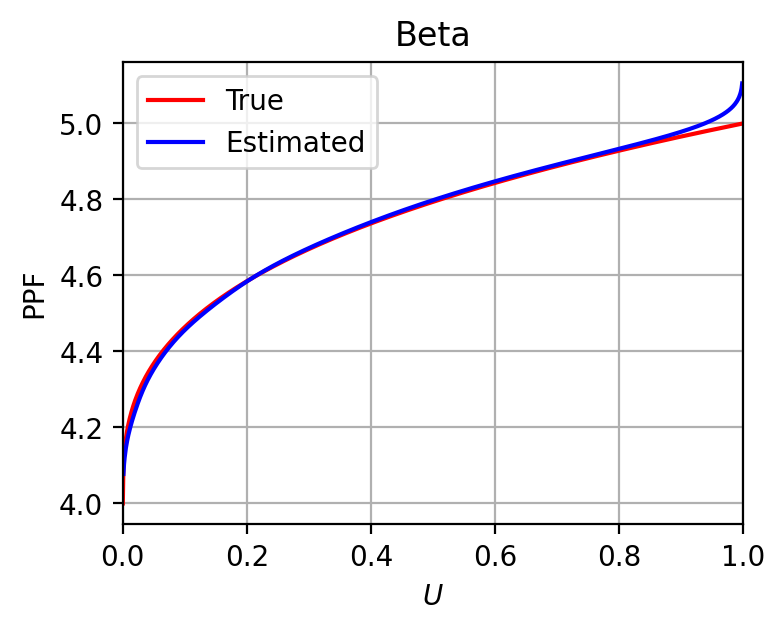

In [32]:
# パーセンタイル
u = np.linspace(0, 1, 1001)

plt.figure(figsize=[4,3], dpi=200)
plt.plot(u, sp.stats.beta.ppf(u, a=3, b=1, loc=4), color='red', label='True')
plt.plot(u, model.ppf(u), color='blue', label='Estimated')
plt.xlim(0,1)
plt.xlabel(r'$U$')
plt.ylabel('PPF')
plt.title('Beta')
plt.legend()
plt.grid()
plt.show()

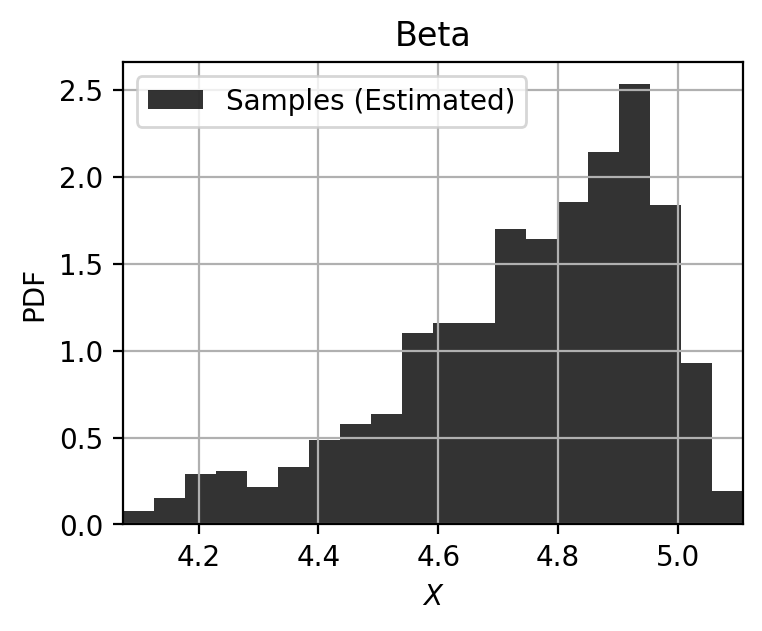

In [33]:
# 学習済みモデルからのサンプル
model.set_random_state(random_state=42)
univariate_new = model.sample(n_samples=1000)

x_min = np.min(univariate_new)
x_max = np.max(univariate_new)
x = np.linspace(x_min, x_max, 1001)

plt.figure(figsize=[4,3], dpi=200)
plt.hist(univariate_new, density=True, color='black', label='Samples (Estimated)', bins=20, alpha=0.8)
plt.xlim(x_min, x_max)
plt.xlabel(r'$X$')
plt.ylabel('PDF')
plt.title('Beta')
plt.legend()
plt.grid()
plt.show()

In [34]:
# モデルは `Univariate` クラス
# 用意された全てのデータ `univariates` からそれぞれ個別に訓練
models = {}
for name in univariates.columns:
    model = univariate.Univariate()
    model.fit(univariates[name])
    models[name] = model

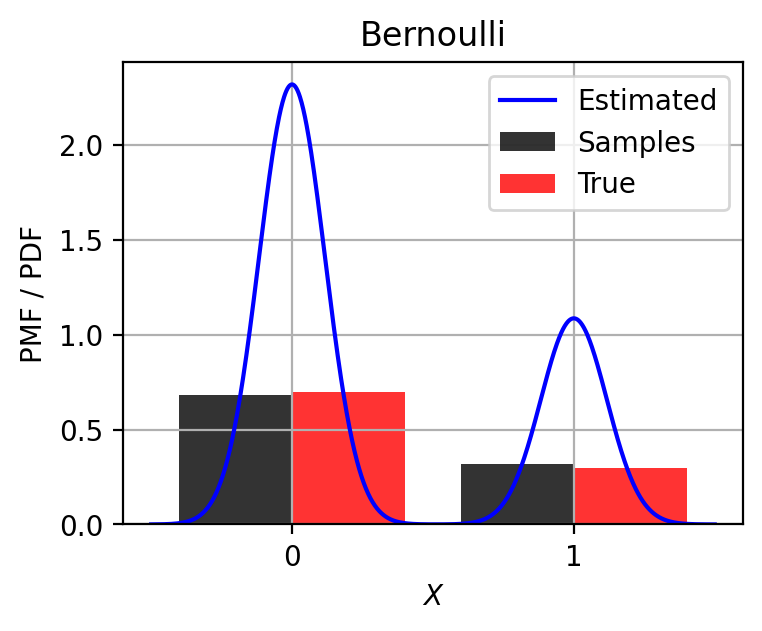

In [35]:
# ベルヌーイ分布から生成された `univariate_bernoulli` の推定結果
x = np.linspace(-0.5,1.5,1001)

plt.figure(figsize=[4,3], dpi=200)
plt.bar(np.arange(2)-0.2, univariate_bernoulli.value_counts(normalize=True), color='black', label='Samples', alpha=0.8, width=0.4)
plt.bar(np.arange(2)+0.2, sp.stats.bernoulli.pmf(k=np.arange(2), p=0.3), color='red', label='True', alpha=0.8, width=0.4)
plt.plot(x, models['bernoulli'].pdf(x), color='blue', label='Estimated')
plt.xticks(np.arange(2))
plt.xlabel(r'$X$')
plt.ylabel('PMF / PDF')
plt.title('Bernoulli')
plt.legend()
plt.grid()
plt.show()

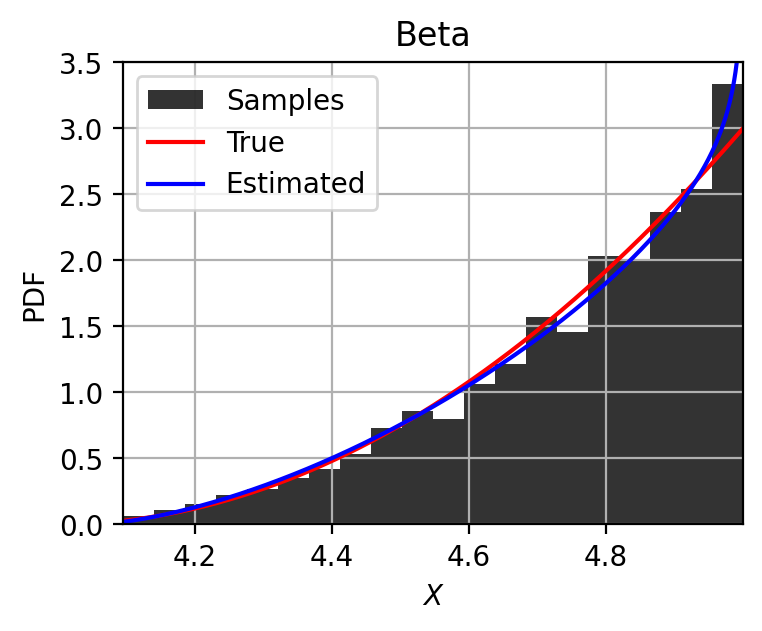

In [36]:
# ベータ分布から生成された `univariate_beta` の推定結果
x_min = np.min(univariates['beta'])
x_max = np.max(univariates['beta'])
x = np.linspace(x_min, x_max, 1001)

plt.figure(figsize=[4,3], dpi=200)
plt.hist(univariates['beta'], density=True, color='black', label='Samples', bins=20, alpha=0.8)
plt.plot(x, sp.stats.beta.pdf(x, a=3, b=1, loc=4), color='red', label='True')
plt.plot(x, models['beta'].pdf(x), color='blue', label='Estimated')
plt.xlim(x_min, x_max)
plt.ylim(0, 3.5)
plt.xlabel(r'$X$')
plt.ylabel('PDF')
plt.title('Beta')
plt.legend()
plt.grid()
plt.show()

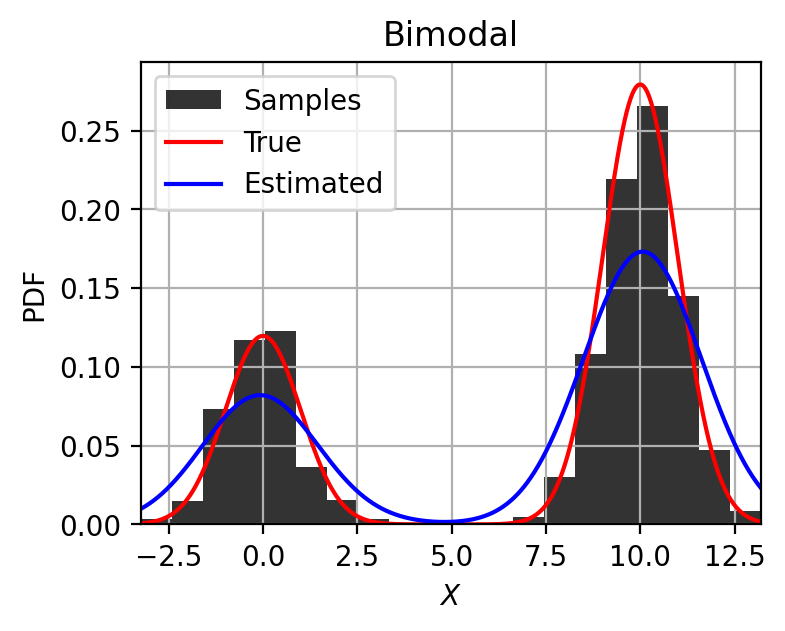

In [37]:
# 二峰分布から生成された `univariate_bimodal` の推定結果
x_min = np.min(univariates['bimodal'])
x_max = np.max(univariates['bimodal'])
x = np.linspace(x_min, x_max, 1001)

plt.figure(figsize=[4,3], dpi=200)
plt.hist(univariates['bimodal'], density=True, color='black', label='Samples', bins=20, alpha=0.8)
plt.plot(x, 0.3*sp.stats.norm.pdf(x)+0.7*sp.stats.norm.pdf(x, loc=10), color='red', label='True')
plt.plot(x, models['bimodal'].pdf(x), color='blue', label='Estimated')
plt.xlim(x_min, x_max)
plt.xlabel(r'$X$')
plt.ylabel('PDF')
plt.title('Bimodal')
plt.legend()
plt.grid()
plt.show()

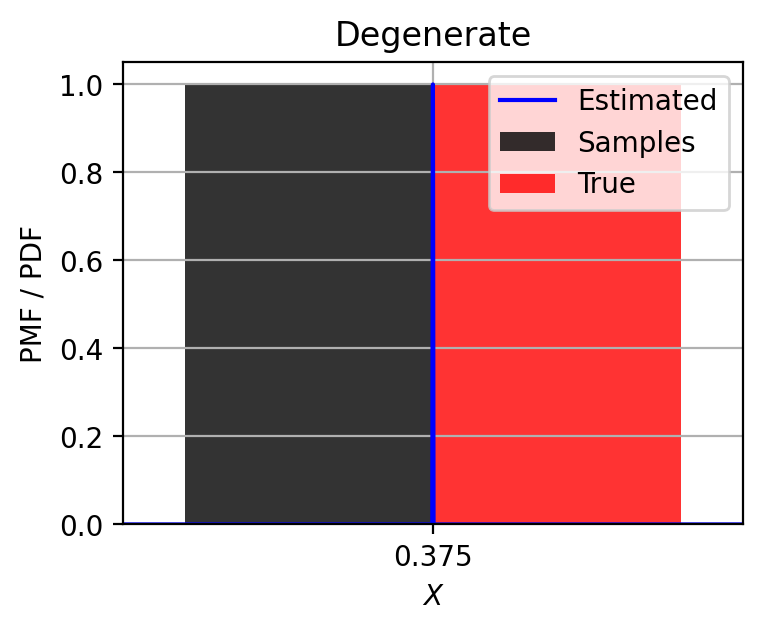

In [38]:
# 退化分布から生成された `univariate_degenerate` の推定結果
value = univariates['degenerate'].unique()
x = np.linspace(value-0.5, value+0.5, 1001)

plt.figure(figsize=[4,3], dpi=200)
plt.bar(value-0.2, univariates['degenerate'].value_counts(normalize=True), color='black', label='Samples', alpha=0.8, width=0.4)
plt.bar(value+0.2, 1, color='red', label='True', alpha=0.8, width=0.4)
plt.plot(x, models['degenerate'].pdf(x), color='blue', label='Estimated')
plt.xticks(value)
plt.xlim(value-0.5, value+0.5)
plt.xlabel(r'$X$')
plt.ylabel('PMF / PDF')
plt.title('Degenerate')
plt.legend()
plt.grid()
plt.show()

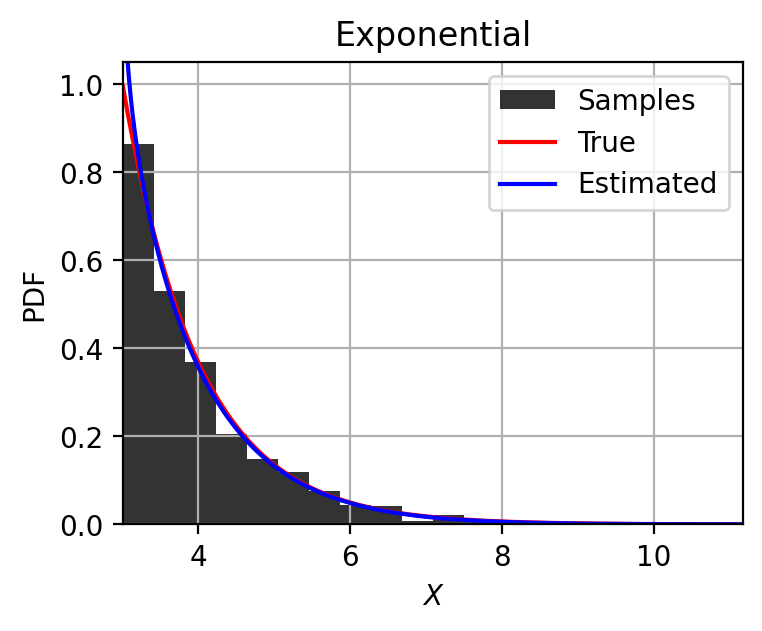

In [39]:
# 指数分布から生成された `univariate_exponential` の推定結果
x_min = np.min(univariates['exponential'])
x_max = np.max(univariates['exponential'])
x = np.linspace(x_min, x_max, 1001)

plt.figure(figsize=[4,3], dpi=200)
plt.hist(univariates['exponential'], density=True, color='black', label='Samples', bins=20, alpha=0.8)
plt.plot(x, sp.stats.expon.pdf(x, loc=3, scale=1), color='red', label='True')
plt.plot(x, models['exponential'].pdf(x), color='blue', label='Estimated')
plt.xlim(x_min, x_max)
plt.ylim(0, 1.05)
plt.xlabel(r'$X$')
plt.ylabel('PDF')
plt.title('Exponential')
plt.legend()
plt.grid()
plt.show()

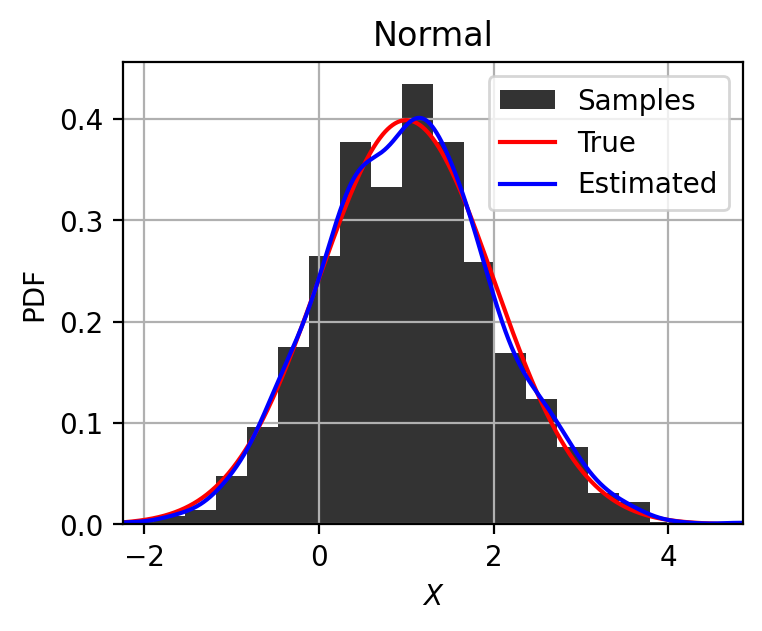

In [40]:
# 正規分布から生成された `univariate_normal` の推定結果
x_min = np.min(univariates['normal'])
x_max = np.max(univariates['normal'])
x = np.linspace(x_min, x_max, 1001)

plt.figure(figsize=[4,3], dpi=200)
plt.hist(univariates['normal'], density=True, color='black', label='Samples', bins=20, alpha=0.8)
plt.plot(x, sp.stats.norm.pdf(x, loc=1, scale=1), color='red', label='True')
plt.plot(x, models['normal'].pdf(x), color='blue', label='Estimated')
plt.xlim(x_min, x_max)
plt.xlabel(r'$X$')
plt.ylabel('PDF')
plt.title('Normal')
plt.legend()
plt.grid()
plt.show()

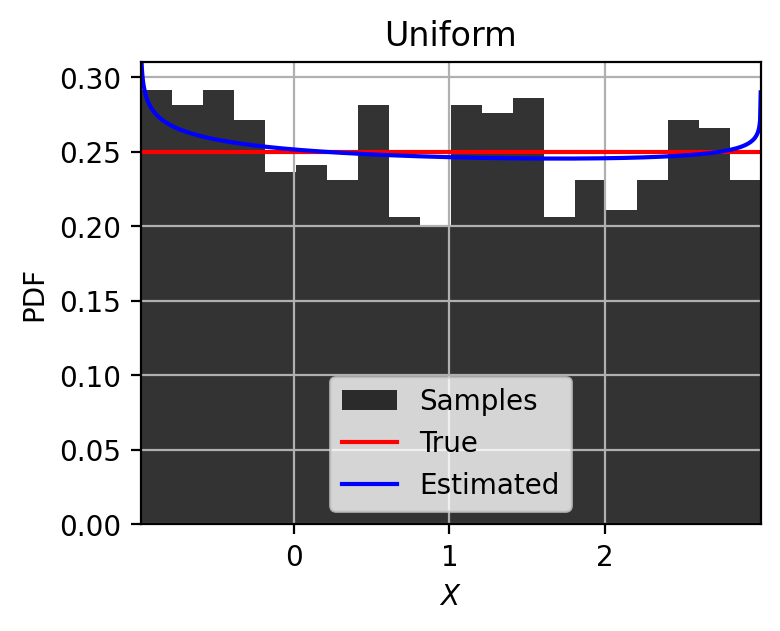

In [41]:
# 正規分布から生成された `univariate_uniform` の推定結果
x_min = np.min(univariates['uniform'])
x_max = np.max(univariates['uniform'])
x = np.linspace(x_min, x_max, 1001)

plt.figure(figsize=[4,3], dpi=200)
plt.hist(univariates['uniform'], density=True, color='black', label='Samples', bins=20, alpha=0.8)
plt.plot(x, sp.stats.uniform.pdf(x, loc=-1, scale=4), color='red', label='True')
plt.plot(x, models['uniform'].pdf(x), color='blue', label='Estimated')
plt.xlim(x_min, x_max)
plt.ylim(0, 0.31)
plt.xlabel(r'$X$')
plt.ylabel('PDF')
plt.title('Uniform')
plt.legend()
plt.grid()
plt.show()

## 2変量分布に基づくモデル化（copulas.bivariate）

### 周辺分布の推定

In [96]:
# カラムごとに周辺分布を推定
# モデルは特に指定しない
bivariate_age_income_models = {}
for name in bivariate_age_income.columns:
    model = univariate.Univariate()  # モデル
    model.fit(bivariate_age_income[name])  # 学習
    bivariate_age_income_models[name] = model  # 結果の格納

In [97]:
bivariate_age_income_models['age'].to_dict()  # 推定されたパラメータ

{'loc': 18.21096059018974,
 'scale': 86.81396581458543,
 'a': 1.9957417801945043,
 'b': 4.878446510002901,
 'type': 'copulas.univariate.beta.BetaUnivariate'}

In [98]:
bivariate_age_income_models['income'].to_dict()['type']  # 推定されたパラメータ

'copulas.univariate.gaussian_kde.GaussianKDE'

In [44]:
# 推定された周辺分布に基づく累積分布
bivariate_age_income_CDF = pd.DataFrame(columns=bivariate_age_income.columns)
for name in bivariate_age_income.columns:
    bivariate_age_income_CDF[name] = bivariate_age_income_models[name].cdf(bivariate_age_income[name])

### クレイトンコピュラ

- `copulas.bivariate.Clayton`

In [45]:
# クレイトンコピュラに基づく推定
copula_Clayton = bivariate.Clayton()
copula_Clayton.fit(bivariate_age_income_CDF.to_numpy())
copula_Clayton.to_dict()

{'copula_type': 'CLAYTON',
 'theta': 3.93836935587417,
 'tau': 0.6632072072072072}

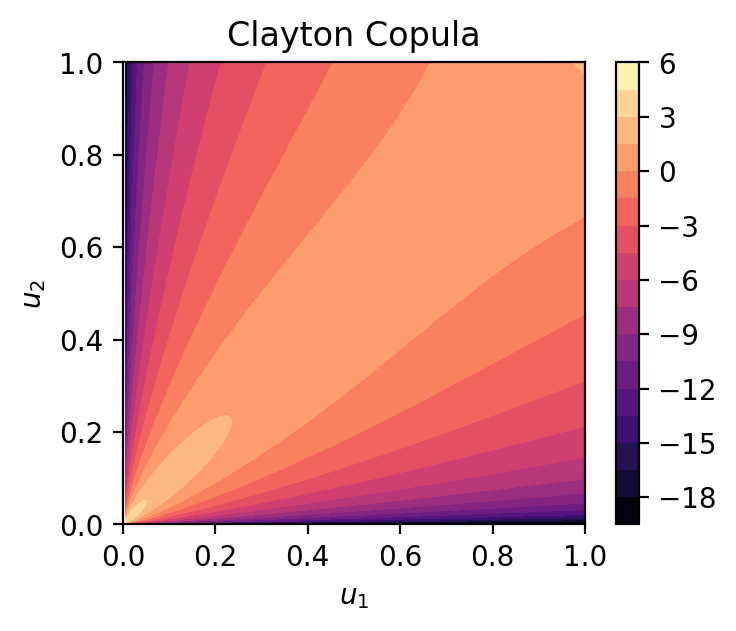

In [46]:
# 推定されたクレイトンコピュラの対数密度関数logc(u1,u2)
# (u1,u2)平面でのメッシュを作成
n_points = 201
u1 = np.linspace(0, 1, n_points)
u2 = np.linspace(0, 1, n_points)
u1_mesh, u2_mesh = np.meshgrid(u1, u2)
u = np.c_[u1_mesh.flatten(), u2_mesh.flatten()]

# インスタンスから密度関数c(u1,u2)を数値計算
c_Clayton = copula_Clayton.pdf(u).reshape(n_points, n_points)

# プロット
plt.figure(figsize=[4,3], dpi=200)
plt.contourf(u1_mesh, u2_mesh, np.log(c_Clayton), cmap='magma', levels=20)
plt.title('Clayton Copula')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$u_1$')
plt.ylabel(r'$u_2$')
plt.colorbar()

plt.show()

In [47]:
# 推定された周辺確率密度関数f1(x1),f2(x2)と同時確率密度関数g(x1,x2)
# (x1,x2)平面でのメッシュを作成
n_points = 201
x1 = np.linspace(bivariate_age_income['age'].min(), bivariate_age_income['age'].max(), n_points)
x2 = np.linspace(bivariate_age_income['income'].min(), bivariate_age_income['income'].max(), n_points)
x1_mesh, x2_mesh = np.meshgrid(x1, x2)
x = np.c_[x1_mesh.flatten(), x2_mesh.flatten()]

# インスタンスから周辺確率密度関数f1(x1),f2(x2)を数値計算
f1 = bivariate_age_income_models['age'].pdf(x1)
f2 = bivariate_age_income_models['income'].pdf(x2)

# インスタンスから同時確率密度関数g(x1,x2)を数値計算
u = np.c_[bivariate_age_income_models['age'].cdf(x1_mesh.flatten()),
          bivariate_age_income_models['income'].cdf(x2_mesh.flatten())]
g_Clayton = (copula_Clayton.pdf(u) 
             * bivariate_age_income_models['age'].pdf(x1_mesh.flatten()) 
             * bivariate_age_income_models['income'].pdf(x2_mesh.flatten())).reshape(n_points, n_points)

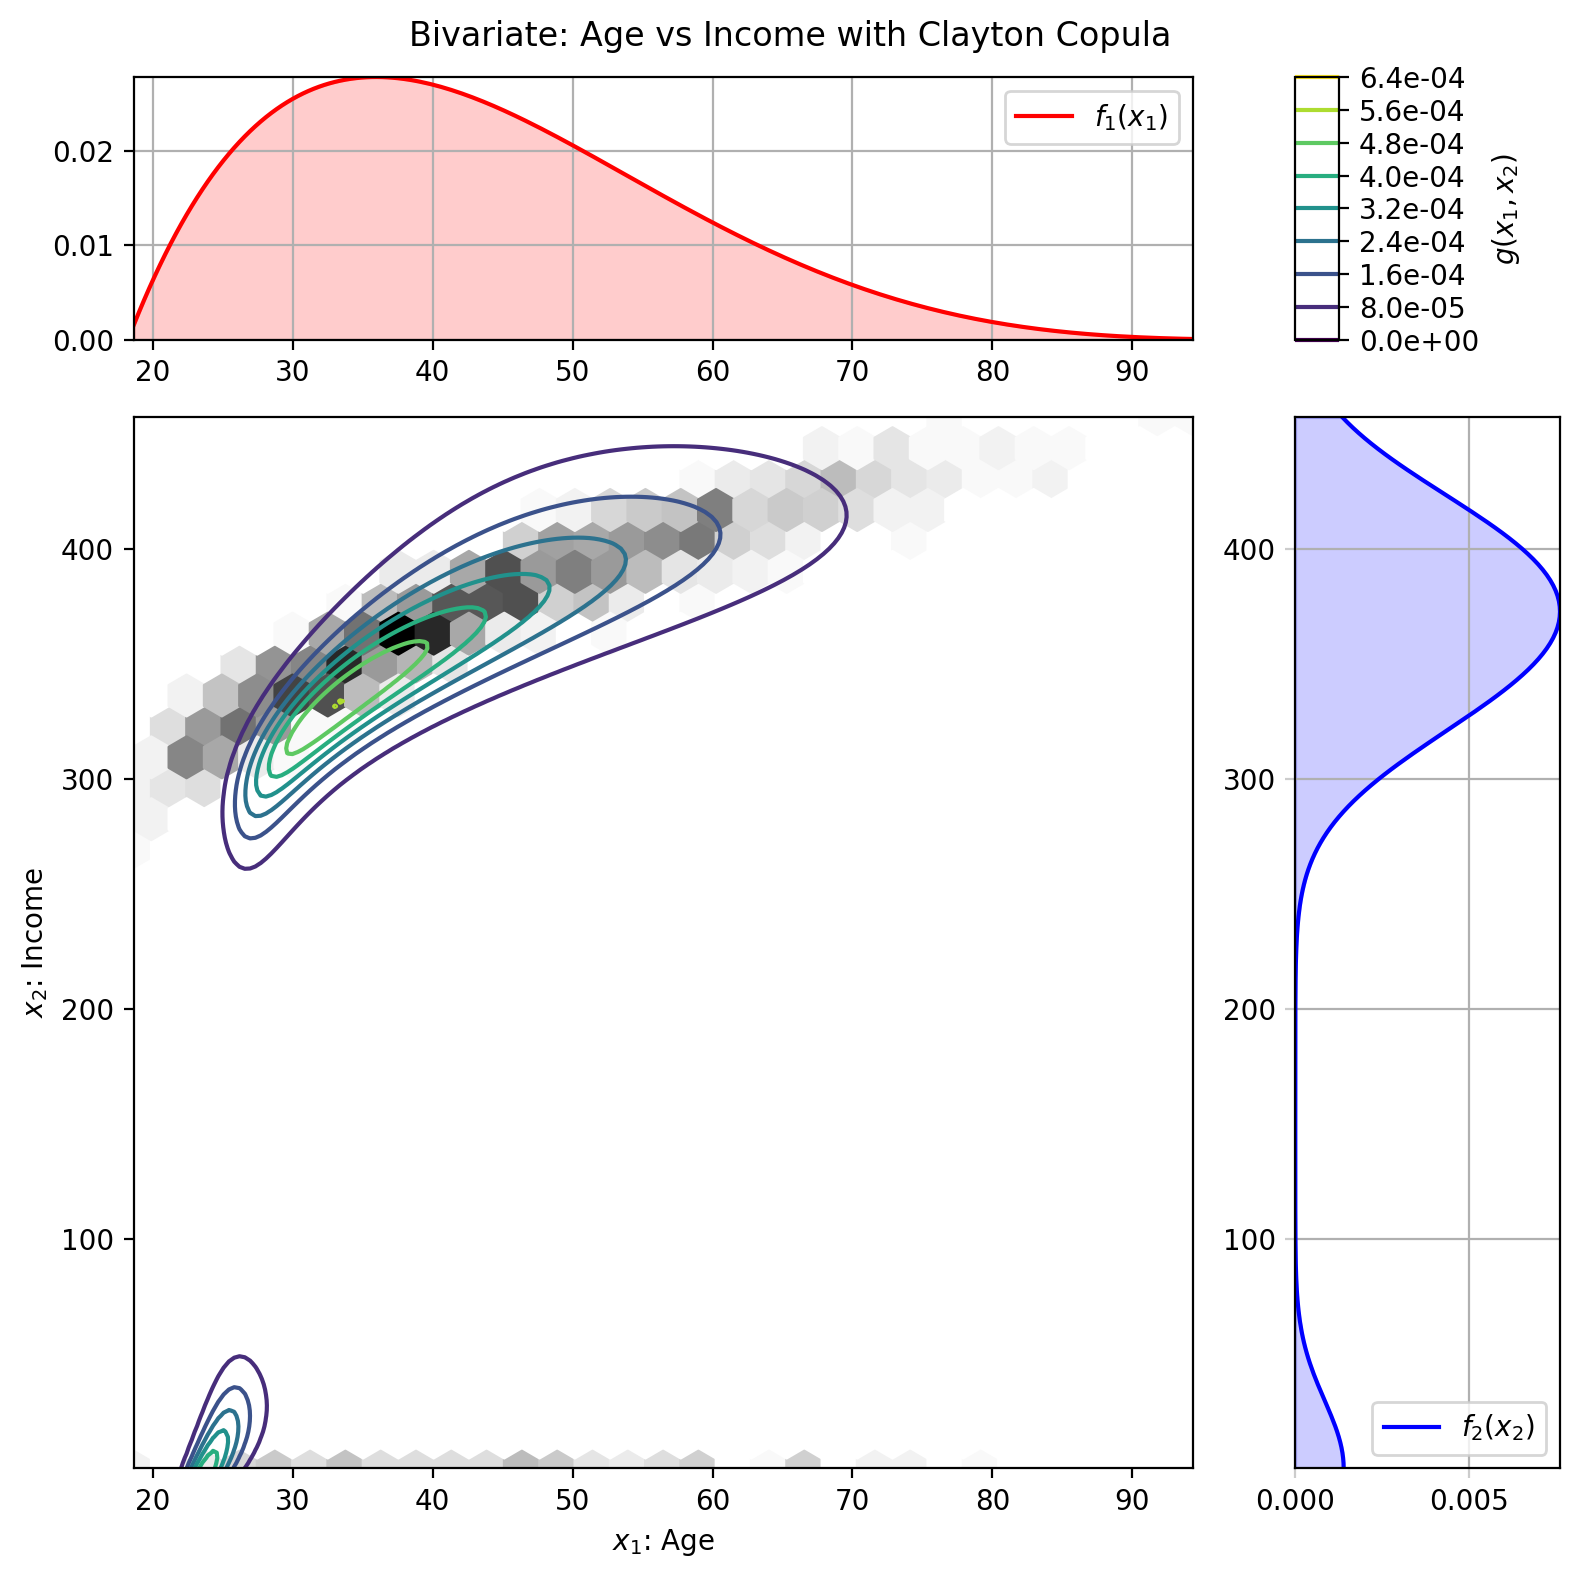

In [48]:
# プロット
fig = plt.figure(figsize=[8,8], dpi=200)
gs = GridSpec(2, 2, height_ratios=[2,8], width_ratios=[8,2])

ax = plt.subplot(gs[2])
ax.hexbin(bivariate_age_income['age'], bivariate_age_income['income'], gridsize=30, cmap='binary')
con = ax.contour(x1_mesh, x2_mesh, g_Clayton)
ax.set(axisbelow=False)
ax.set(xlabel=r'$x_1$' + ': Age')
ax.set(ylabel=r'$x_2$' + ': Income')
ax.autoscale(tight=True)

ax = plt.subplot(gs[3])
ax.plot(f2, x2, 'blue', label=r'$f_2(x_2)$')
ax.fill_betweenx(x2, f2, color='blue', alpha=0.2)
ax.tick_params(color="0.8")
ax.autoscale(tight=True)
ax.grid()
ax.legend()

ax = plt.subplot(gs[0])
ax.plot(x1, f1, 'red', label=r'$f_1(x_1)$')
ax.fill_between(x1, f1, color='red', alpha=0.2)
ax.autoscale(tight=True)
ax.grid()
ax.legend()

ax = plt.subplot(gs[1])
ax.set_visible(False)
cax = make_axes_locatable(ax).append_axes('left', size='20%', pad=0)
cbar = fig.colorbar(con, cax=cax, format="%.1e")
cbar.ax.set_ylabel(r'$g(x_1,x_2)$')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Bivariate: Age vs Income with Clayton Copula')
plt.show()

### ガンベルコピュラ

- `copulas.bivariate.Gumbel`

In [49]:
# ガンベルコピュラに基づく推定
copula_Gumbel = bivariate.Gumbel()
copula_Gumbel.fit(bivariate_age_income_CDF.to_numpy())
copula_Gumbel.to_dict()

{'copula_type': 'GUMBEL',
 'theta': 2.969184677937085,
 'tau': 0.6632072072072072}

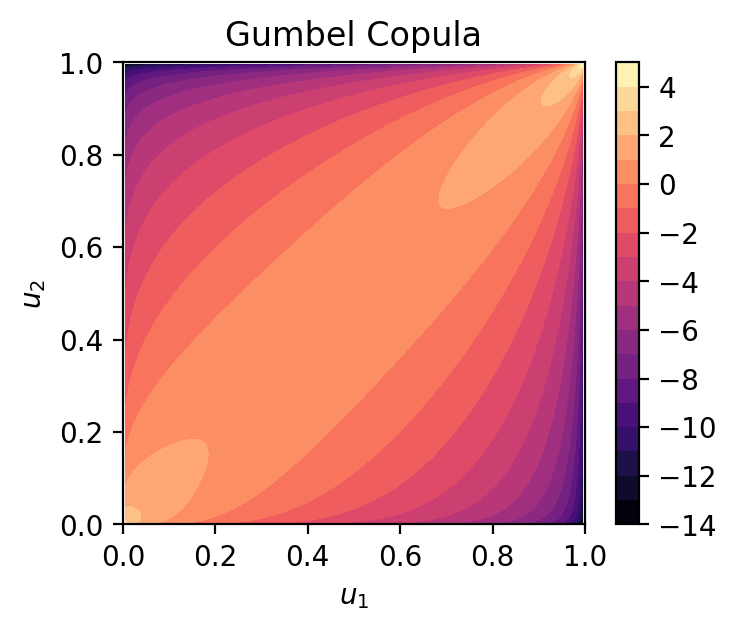

In [50]:
# 推定されたクレイトンコピュラの対数密度関数logc(u1,u2)
# (u1,u2)平面でのメッシュを作成
n_points = 201
u1 = np.linspace(0, 1, n_points)
u2 = np.linspace(0, 1, n_points)
u1_mesh, u2_mesh = np.meshgrid(u1, u2)
u = np.c_[u1_mesh.flatten(), u2_mesh.flatten()]

# インスタンスから密度関数c(u1,u2)を数値計算
c_Gumbel = copula_Gumbel.pdf(u).reshape(n_points, n_points)

# プロット
plt.figure(figsize=[4,3], dpi=200)
plt.contourf(u1_mesh, u2_mesh, np.log(c_Gumbel), cmap='magma', levels=20)
plt.title('Gumbel Copula')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$u_1$')
plt.ylabel(r'$u_2$')
plt.colorbar()

plt.show()

In [51]:
# 推定された周辺確率密度関数f1(x1),f2(x2)と同時確率密度関数g(x1,x2)
# (x1,x2)平面でのメッシュを作成
n_points = 201
x1 = np.linspace(bivariate_age_income['age'].min(), bivariate_age_income['age'].max(), n_points)
x2 = np.linspace(bivariate_age_income['income'].min(), bivariate_age_income['income'].max(), n_points)
x1_mesh, x2_mesh = np.meshgrid(x1, x2)
x = np.c_[x1_mesh.flatten(), x2_mesh.flatten()]

# インスタンスから周辺確率密度関数f1(x1),f2(x2)を数値計算
f1 = bivariate_age_income_models['age'].pdf(x1)
f2 = bivariate_age_income_models['income'].pdf(x2)

# インスタンスから同時確率密度関数g(x1,x2)を数値計算
u = np.c_[bivariate_age_income_models['age'].cdf(x1_mesh.flatten()),
          bivariate_age_income_models['income'].cdf(x2_mesh.flatten())]
g_Gumbel = (copula_Gumbel.pdf(u) 
             * bivariate_age_income_models['age'].pdf(x1_mesh.flatten()) 
             * bivariate_age_income_models['income'].pdf(x2_mesh.flatten())).reshape(n_points, n_points)

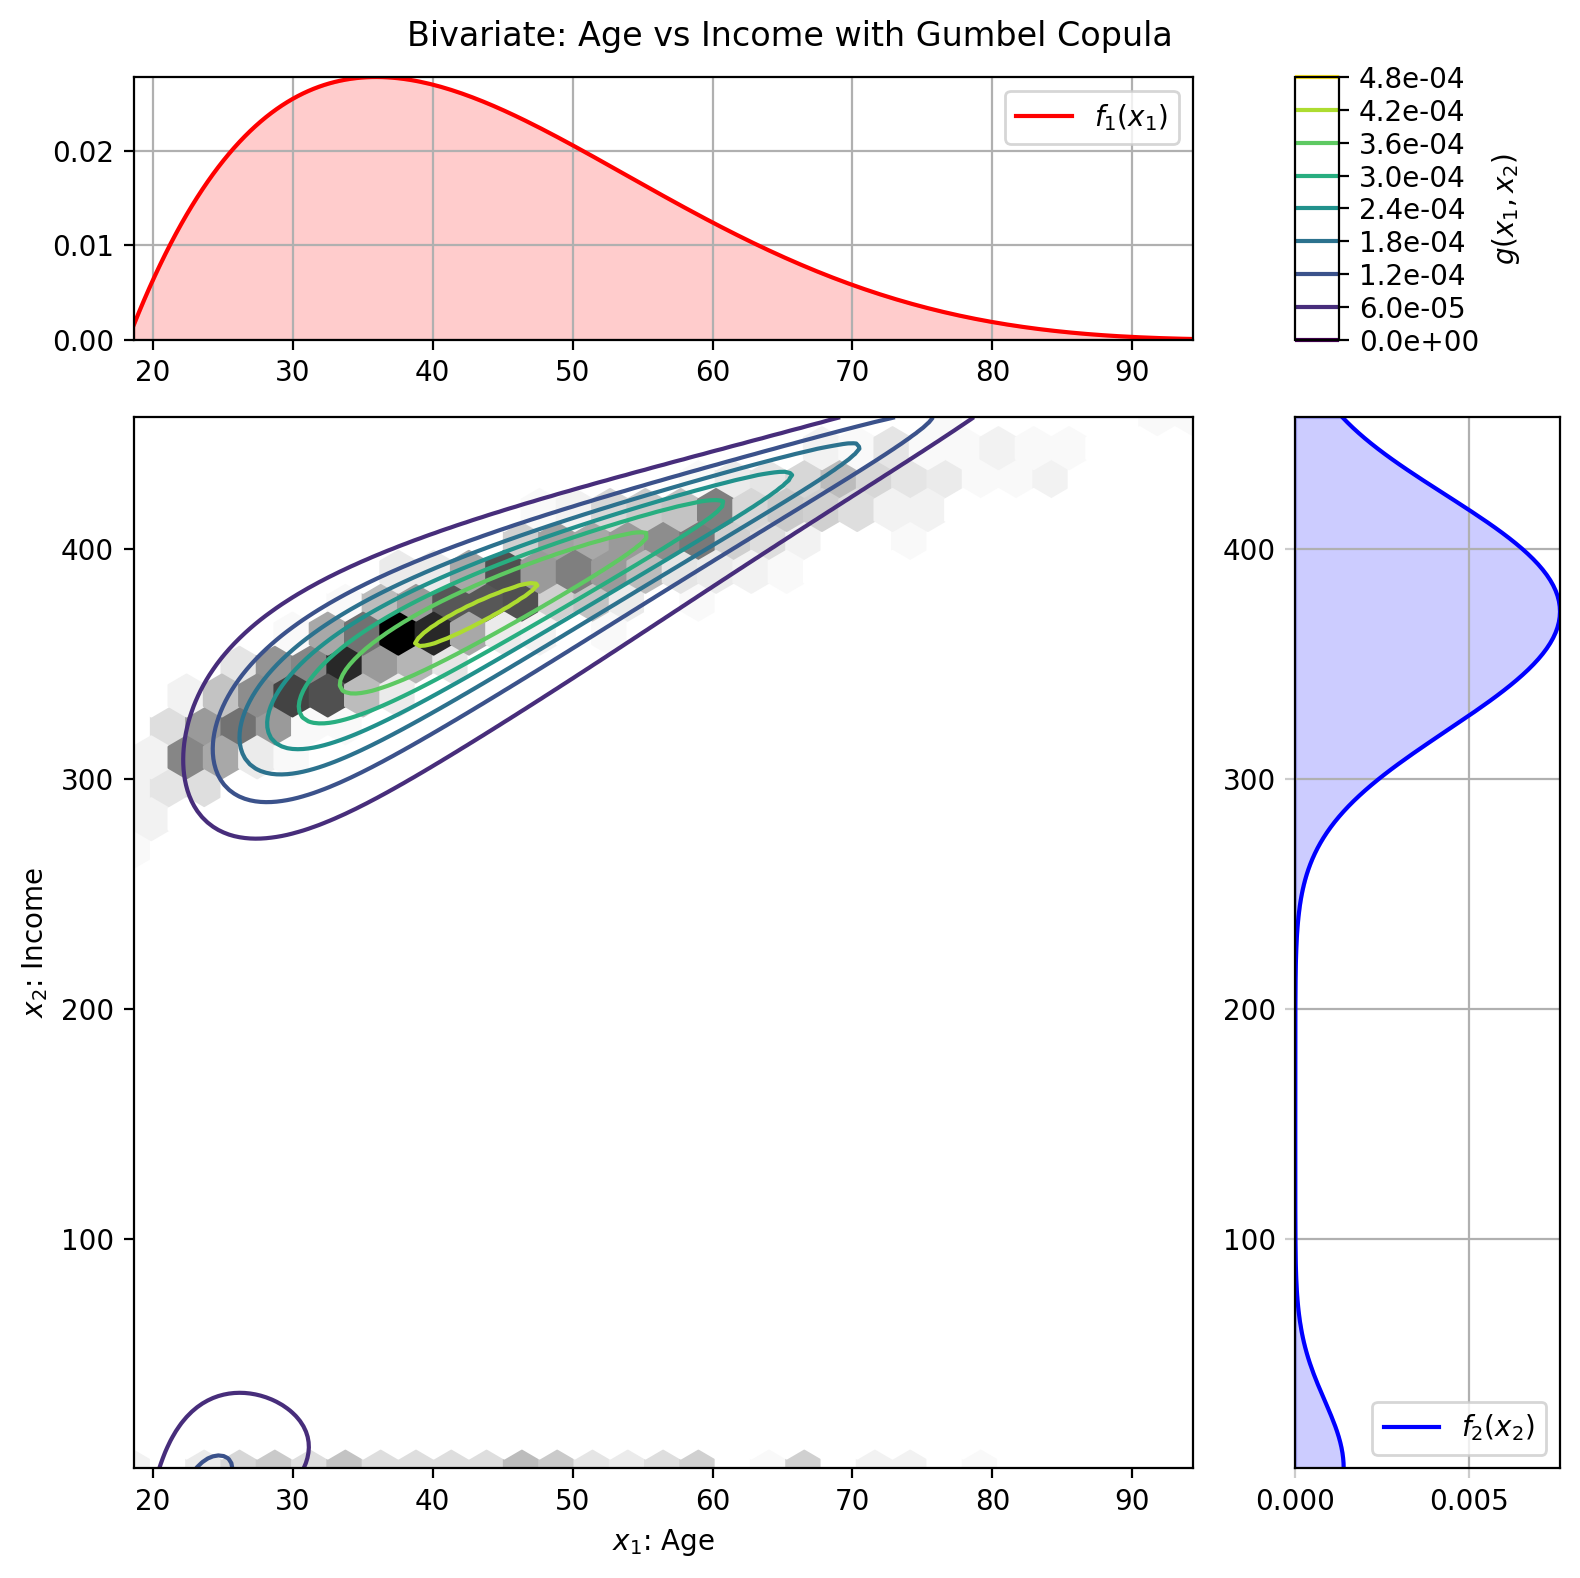

In [52]:
# プロット
fig = plt.figure(figsize=[8,8], dpi=200)
gs = GridSpec(2, 2, height_ratios=[2,8], width_ratios=[8,2])

ax = plt.subplot(gs[2])
ax.hexbin(bivariate_age_income['age'], bivariate_age_income['income'], gridsize=30, cmap='binary')
con = ax.contour(x1_mesh, x2_mesh, g_Gumbel)
ax.set(axisbelow=False)
ax.set(xlabel=r'$x_1$' + ': Age')
ax.set(ylabel=r'$x_2$' + ': Income')
ax.autoscale(tight=True)

ax = plt.subplot(gs[3])
ax.plot(f2, x2, 'blue', label=r'$f_2(x_2)$')
ax.fill_betweenx(x2, f2, color='blue', alpha=0.2)
ax.tick_params(color="0.8")
ax.autoscale(tight=True)
ax.grid()
ax.legend()

ax = plt.subplot(gs[0])
ax.plot(x1, f1, 'red', label=r'$f_1(x_1)$')
ax.fill_between(x1, f1, color='red', alpha=0.2)
ax.autoscale(tight=True)
ax.grid()
ax.legend()

ax = plt.subplot(gs[1])
ax.set_visible(False)
cax = make_axes_locatable(ax).append_axes('left', size='20%', pad=0)
cbar = fig.colorbar(con, cax=cax, format="%.1e")
cbar.ax.set_ylabel(r'$g(x_1,x_2)$')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Bivariate: Age vs Income with Gumbel Copula')
plt.show()

### フランクコピュラ

- `copulas.bivariate.Frank`

In [53]:
# フランクコピュラに基づく推定
copula_Frank = bivariate.Frank()
copula_Frank.fit(bivariate_age_income_CDF.to_numpy())
copula_Frank.to_dict()

{'copula_type': 'FRANK', 'theta': 9.905011009311847, 'tau': 0.6632072072072072}

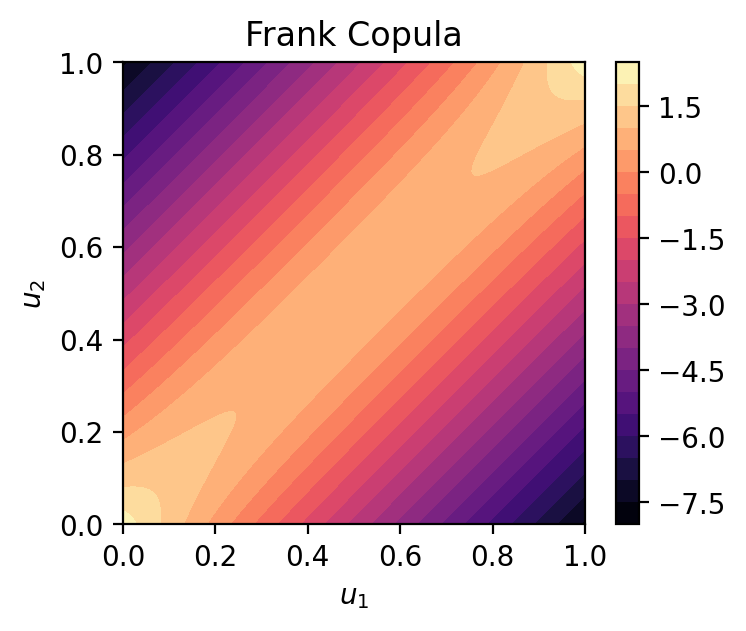

In [54]:
# 推定されたクレイトンコピュラの対数密度関数logc(u1,u2)
# (u1,u2)平面でのメッシュを作成
n_points = 201
u1 = np.linspace(0, 1, n_points)
u2 = np.linspace(0, 1, n_points)
u1_mesh, u2_mesh = np.meshgrid(u1, u2)
u = np.c_[u1_mesh.flatten(), u2_mesh.flatten()]

# インスタンスから密度関数c(u1,u2)を数値計算
c_Frank = copula_Frank.pdf(u).reshape(n_points, n_points)

# プロット
plt.figure(figsize=[4,3], dpi=200)
plt.contourf(u1_mesh, u2_mesh, np.log(c_Frank), cmap='magma', levels=20)
plt.title('Frank Copula')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$u_1$')
plt.ylabel(r'$u_2$')
plt.colorbar()

plt.show()

In [55]:
# 推定された周辺確率密度関数f1(x1),f2(x2)と同時確率密度関数g(x1,x2)
# (x1,x2)平面でのメッシュを作成
n_points = 201
x1 = np.linspace(bivariate_age_income['age'].min(), bivariate_age_income['age'].max(), n_points)
x2 = np.linspace(bivariate_age_income['income'].min(), bivariate_age_income['income'].max(), n_points)
x1_mesh, x2_mesh = np.meshgrid(x1, x2)
x = np.c_[x1_mesh.flatten(), x2_mesh.flatten()]

# インスタンスから周辺確率密度関数f1(x1),f2(x2)を数値計算
f1 = bivariate_age_income_models['age'].pdf(x1)
f2 = bivariate_age_income_models['income'].pdf(x2)

# インスタンスから同時確率密度関数g(x1,x2)を数値計算
u = np.c_[bivariate_age_income_models['age'].cdf(x1_mesh.flatten()),
          bivariate_age_income_models['income'].cdf(x2_mesh.flatten())]
g_Frank = (copula_Frank.pdf(u) 
             * bivariate_age_income_models['age'].pdf(x1_mesh.flatten()) 
             * bivariate_age_income_models['income'].pdf(x2_mesh.flatten())).reshape(n_points, n_points)

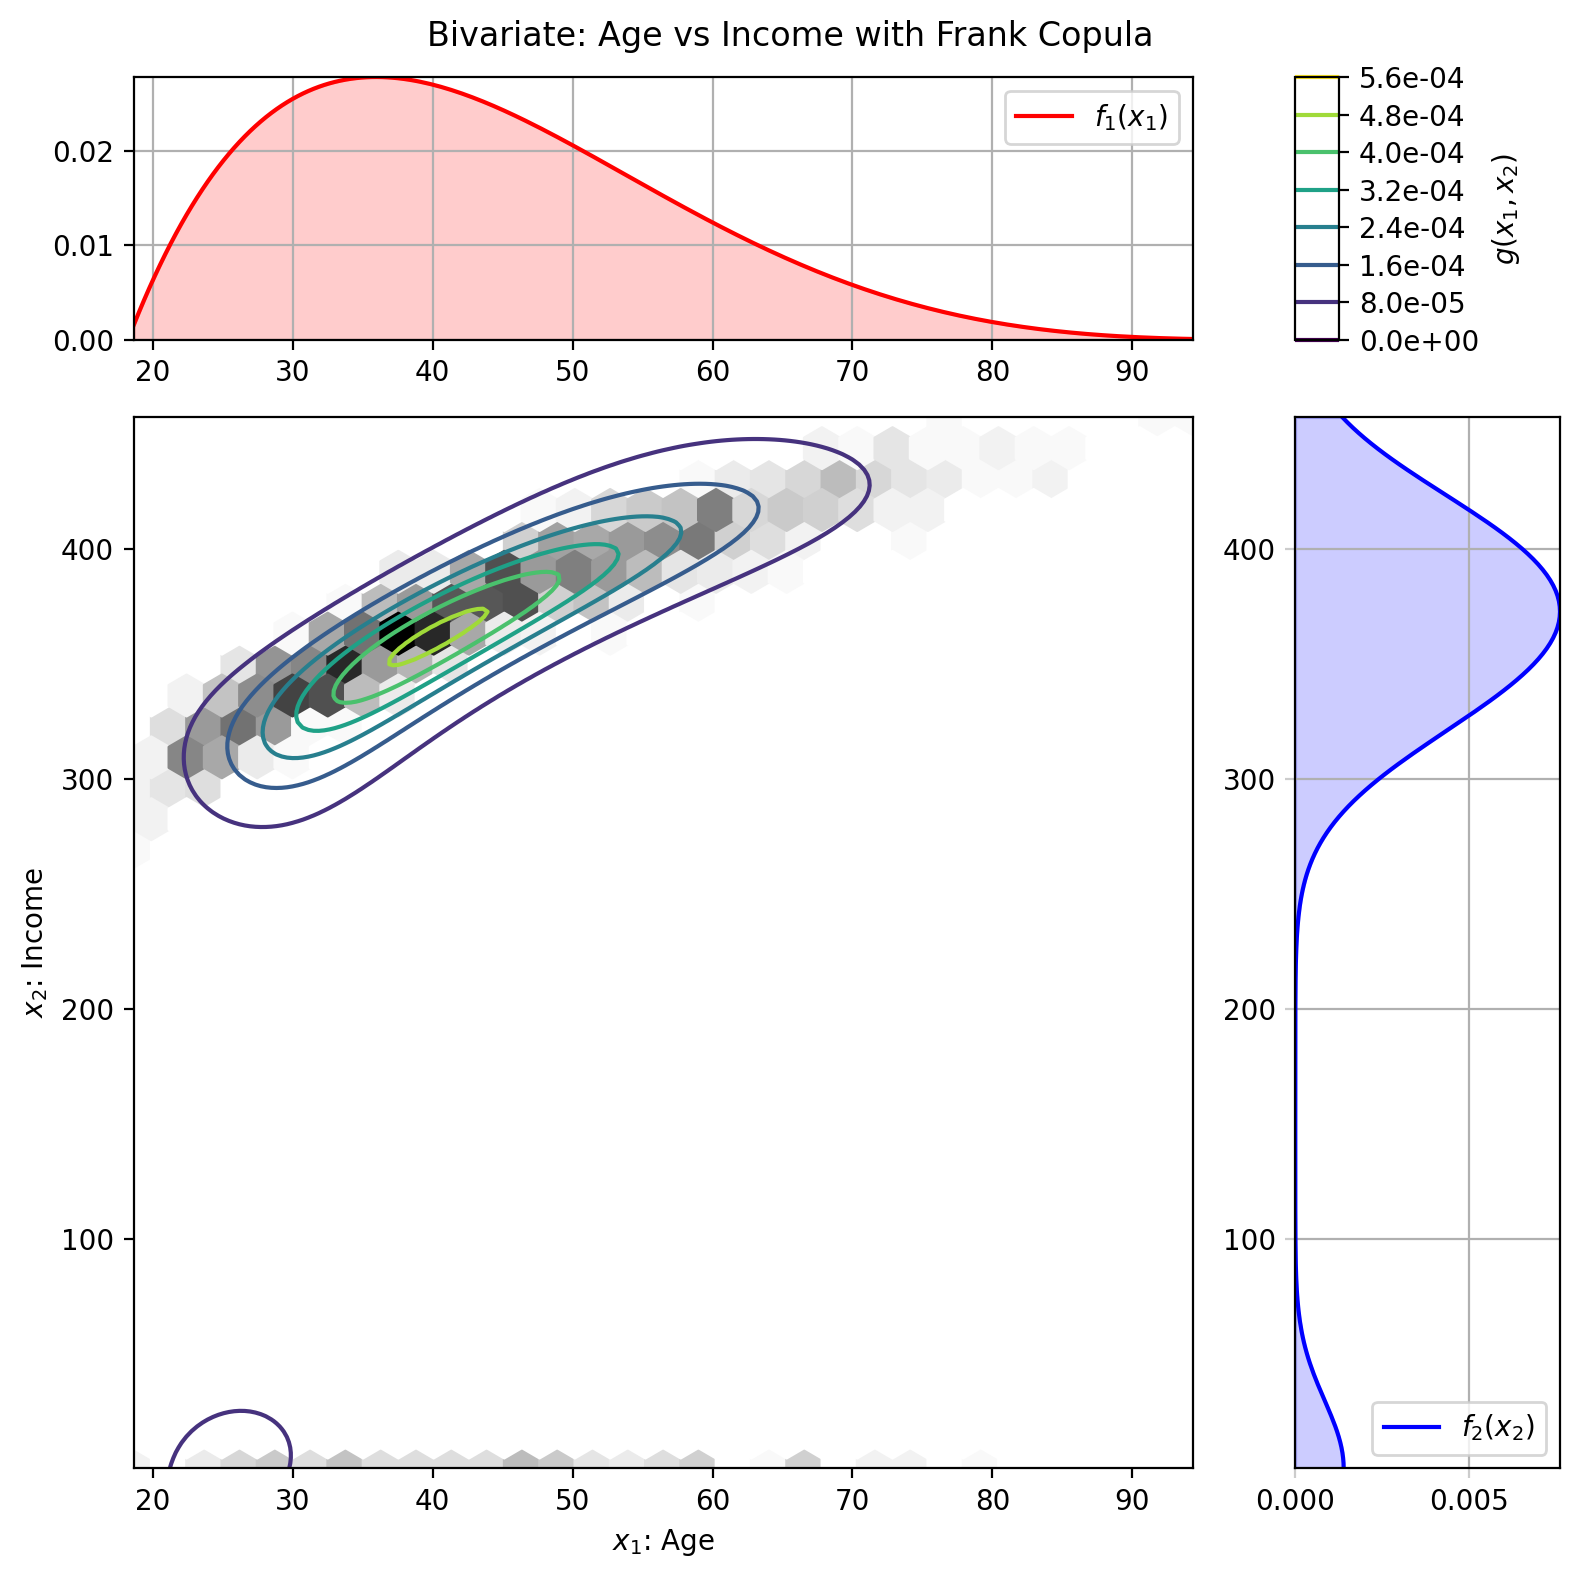

In [56]:
# プロット
fig = plt.figure(figsize=[8,8], dpi=200)
gs = GridSpec(2, 2, height_ratios=[2,8], width_ratios=[8,2])

ax = plt.subplot(gs[2])
ax.hexbin(bivariate_age_income['age'], bivariate_age_income['income'], gridsize=30, cmap='binary')
con = ax.contour(x1_mesh, x2_mesh, g_Frank)
ax.set(axisbelow=False)
ax.set(xlabel=r'$x_1$' + ': Age')
ax.set(ylabel=r'$x_2$' + ': Income')
ax.autoscale(tight=True)

ax = plt.subplot(gs[3])
ax.plot(f2, x2, 'blue', label=r'$f_2(x_2)$')
ax.fill_betweenx(x2, f2, color='blue', alpha=0.2)
ax.tick_params(color="0.8")
ax.autoscale(tight=True)
ax.grid()
ax.legend()

ax = plt.subplot(gs[0])
ax.plot(x1, f1, 'red', label=r'$f_1(x_1)$')
ax.fill_between(x1, f1, color='red', alpha=0.2)
ax.autoscale(tight=True)
ax.grid()
ax.legend()

ax = plt.subplot(gs[1])
ax.set_visible(False)
cax = make_axes_locatable(ax).append_axes('left', size='20%', pad=0)
cbar = fig.colorbar(con, cax=cax, format="%.1e")
cbar.ax.set_ylabel(r'$g(x_1,x_2)$')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Bivariate: Age vs Income with Frank Copula')
plt.show()

### 最適なコピュラの選択

In [57]:
# 最適なコピュラを選択して推定
copula_Bivariate = bivariate.Bivariate()
copula_Bivariate_best = copula_Bivariate.select_copula(bivariate_age_income_CDF.to_numpy())
copula_Bivariate_best.to_dict()

{'copula_type': 'FRANK', 'theta': 9.905011009311847, 'tau': 0.6632072072072072}

## 多変量分布に基づくモデル化（copulas.multivariate）

### 正規コピュラ

- `copulas.multivariate.GaussianMultivariate`

#### 周辺分布を指定して推定

In [58]:
# 全て正規分布に指定して推定
Gaussian_copula_model = multivariate.GaussianMultivariate(
    distribution = univariate.GaussianUnivariate
)
Gaussian_copula_model.fit(trivariate_xyz)
parameters = Gaussian_copula_model.to_dict()

In [59]:
np.round(parameters['correlation'], 3)

array([[ 1.   , -0.024, -0.03 ],
       [-0.024,  1.   ,  0.945],
       [-0.03 ,  0.945,  1.   ]])

In [60]:
parameters['univariates'][0]['type']

'copulas.univariate.gaussian.GaussianUnivariate'

In [61]:
parameters['univariates'][1]['type']

'copulas.univariate.gaussian.GaussianUnivariate'

In [62]:
parameters['univariates'][2]['type']

'copulas.univariate.gaussian.GaussianUnivariate'

In [63]:
# 推定された周辺確率密度関数f1(x1),f2(x2),f3(x3)と同時確率密度関数g12(x1,x2),g23(x2,x3),g31(x3,x1)
# (x1,x2),(x2,x3),(x3,x1)平面でのメッシュを作成
n_points = 201
x1 = np.linspace(trivariate_xyz['x'].min(), trivariate_xyz['x'].max(), n_points)
x2 = np.linspace(trivariate_xyz['y'].min(), trivariate_xyz['y'].max(), n_points)
x3 = np.linspace(trivariate_xyz['z'].min(), trivariate_xyz['z'].max(), n_points)

x1_mesh_for_x12, x2_mesh_for_x12 = np.meshgrid(x1, x2)
x12 = np.c_[x1_mesh_for_x12.flatten(), x2_mesh_for_x12.flatten()]
x2_mesh_for_x23, x3_mesh_for_x23 = np.meshgrid(x2, x3)
x23 = np.c_[x2_mesh_for_x23.flatten(), x3_mesh_for_x23.flatten()]
x3_mesh_for_x31, x1_mesh_for_x31 = np.meshgrid(x3, x1)
x31 = np.c_[x3_mesh_for_x31.flatten(), x1_mesh_for_x31.flatten()]


# インスタンスから周辺確率密度関数f1(x1),f2(x2),f3(x3)を数値計算
f1 = Gaussian_copula_model.univariates[0].pdf(x1)
f2 = Gaussian_copula_model.univariates[1].pdf(x2)
f3 = Gaussian_copula_model.univariates[2].pdf(x3)

# インスタンスから同時確率密度関数g(x1,x2)を近似的に数値計算
# (x1,x2)平面内のメッシュ全てで3変数→2変数へ周辺する計算コストが高いため
# 学習済みモデルから生成した乱数に基づくヒストグラムで近似的に推定
n_samples = 10000
Gaussian_copula_model.set_random_state(random_state=42)
samples = Gaussian_copula_model.sample(num_rows=n_samples)

# 描画の都合上訓練データ外の値は外れ値として除去
samples['x'] = samples['x'].mask(samples['x']<np.min(x1), np.min(x1))
samples['x'] = samples['x'].mask(samples['x']>np.max(x1), np.max(x1))
samples['y'] = samples['y'].mask(samples['y']<np.min(x2), np.min(x2))
samples['y'] = samples['y'].mask(samples['y']>np.max(x2), np.max(x2))
samples['z'] = samples['z'].mask(samples['z']<np.min(x3), np.min(x3))
samples['z'] = samples['z'].mask(samples['z']>np.max(x3), np.max(x3))

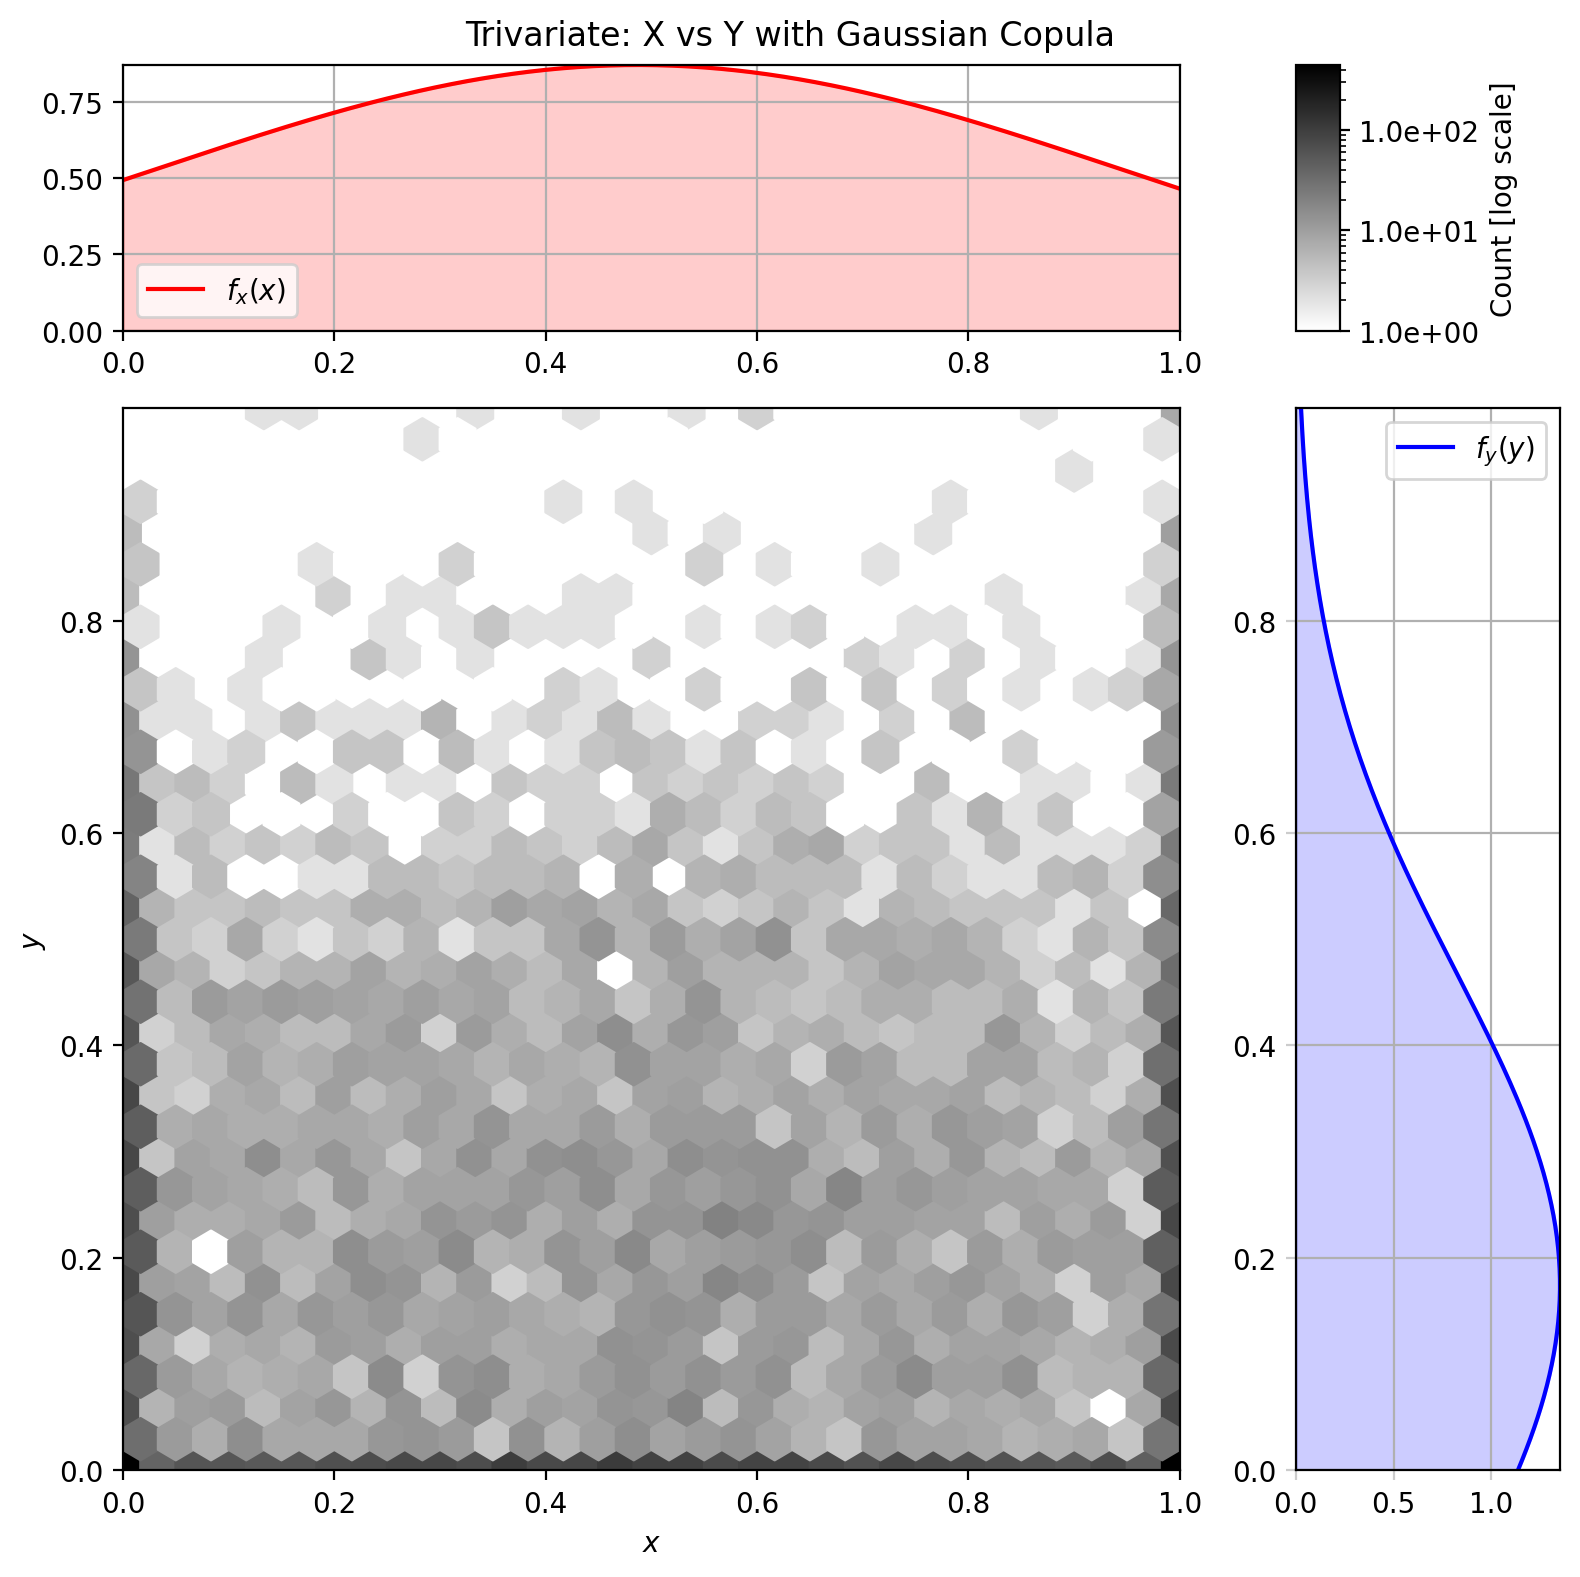

In [64]:
# プロット: X vs Y
fig = plt.figure(figsize=[8,8], dpi=200)
gs = GridSpec(2, 2, height_ratios=[2,8], width_ratios=[8,2])

ax = plt.subplot(gs[2])
con = ax.hexbin(samples['x'], samples['y'], gridsize=30, bins='log', cmap='binary')
ax.set(axisbelow=False)
ax.set(xlabel=r'$x$')
ax.set(ylabel=r'$y$')
ax.autoscale(tight=True)
ax.set(xlim=[np.min(x1),np.max(x1)])
ax.set(ylim=[np.min(x2),np.max(x2)])

ax = plt.subplot(gs[3])
ax.plot(f2, x2, 'blue', label=r'$f_y(y)$')
ax.fill_betweenx(x2, f2, color='blue', alpha=0.2)
ax.tick_params(color="0.8")
ax.autoscale(tight=True)
ax.set(ylim=[np.min(x2),np.max(x2)])
ax.grid()
ax.legend()

ax = plt.subplot(gs[0])
ax.plot(x1, f1, 'red', label=r'$f_x(x)$')
ax.fill_between(x1, f1, color='red', alpha=0.2)
ax.autoscale(tight=True)
ax.set(xlim=[np.min(x1),np.max(x1)])
ax.grid()
ax.legend()

ax = plt.subplot(gs[1])
ax.set_visible(False)
cax = make_axes_locatable(ax).append_axes('left', size='20%', pad=0)
cbar = fig.colorbar(con, cax=cax, format="%.1e")
cbar.ax.set_ylabel('Count [log scale]')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Trivariate: X vs Y with Gaussian Copula')
plt.show()

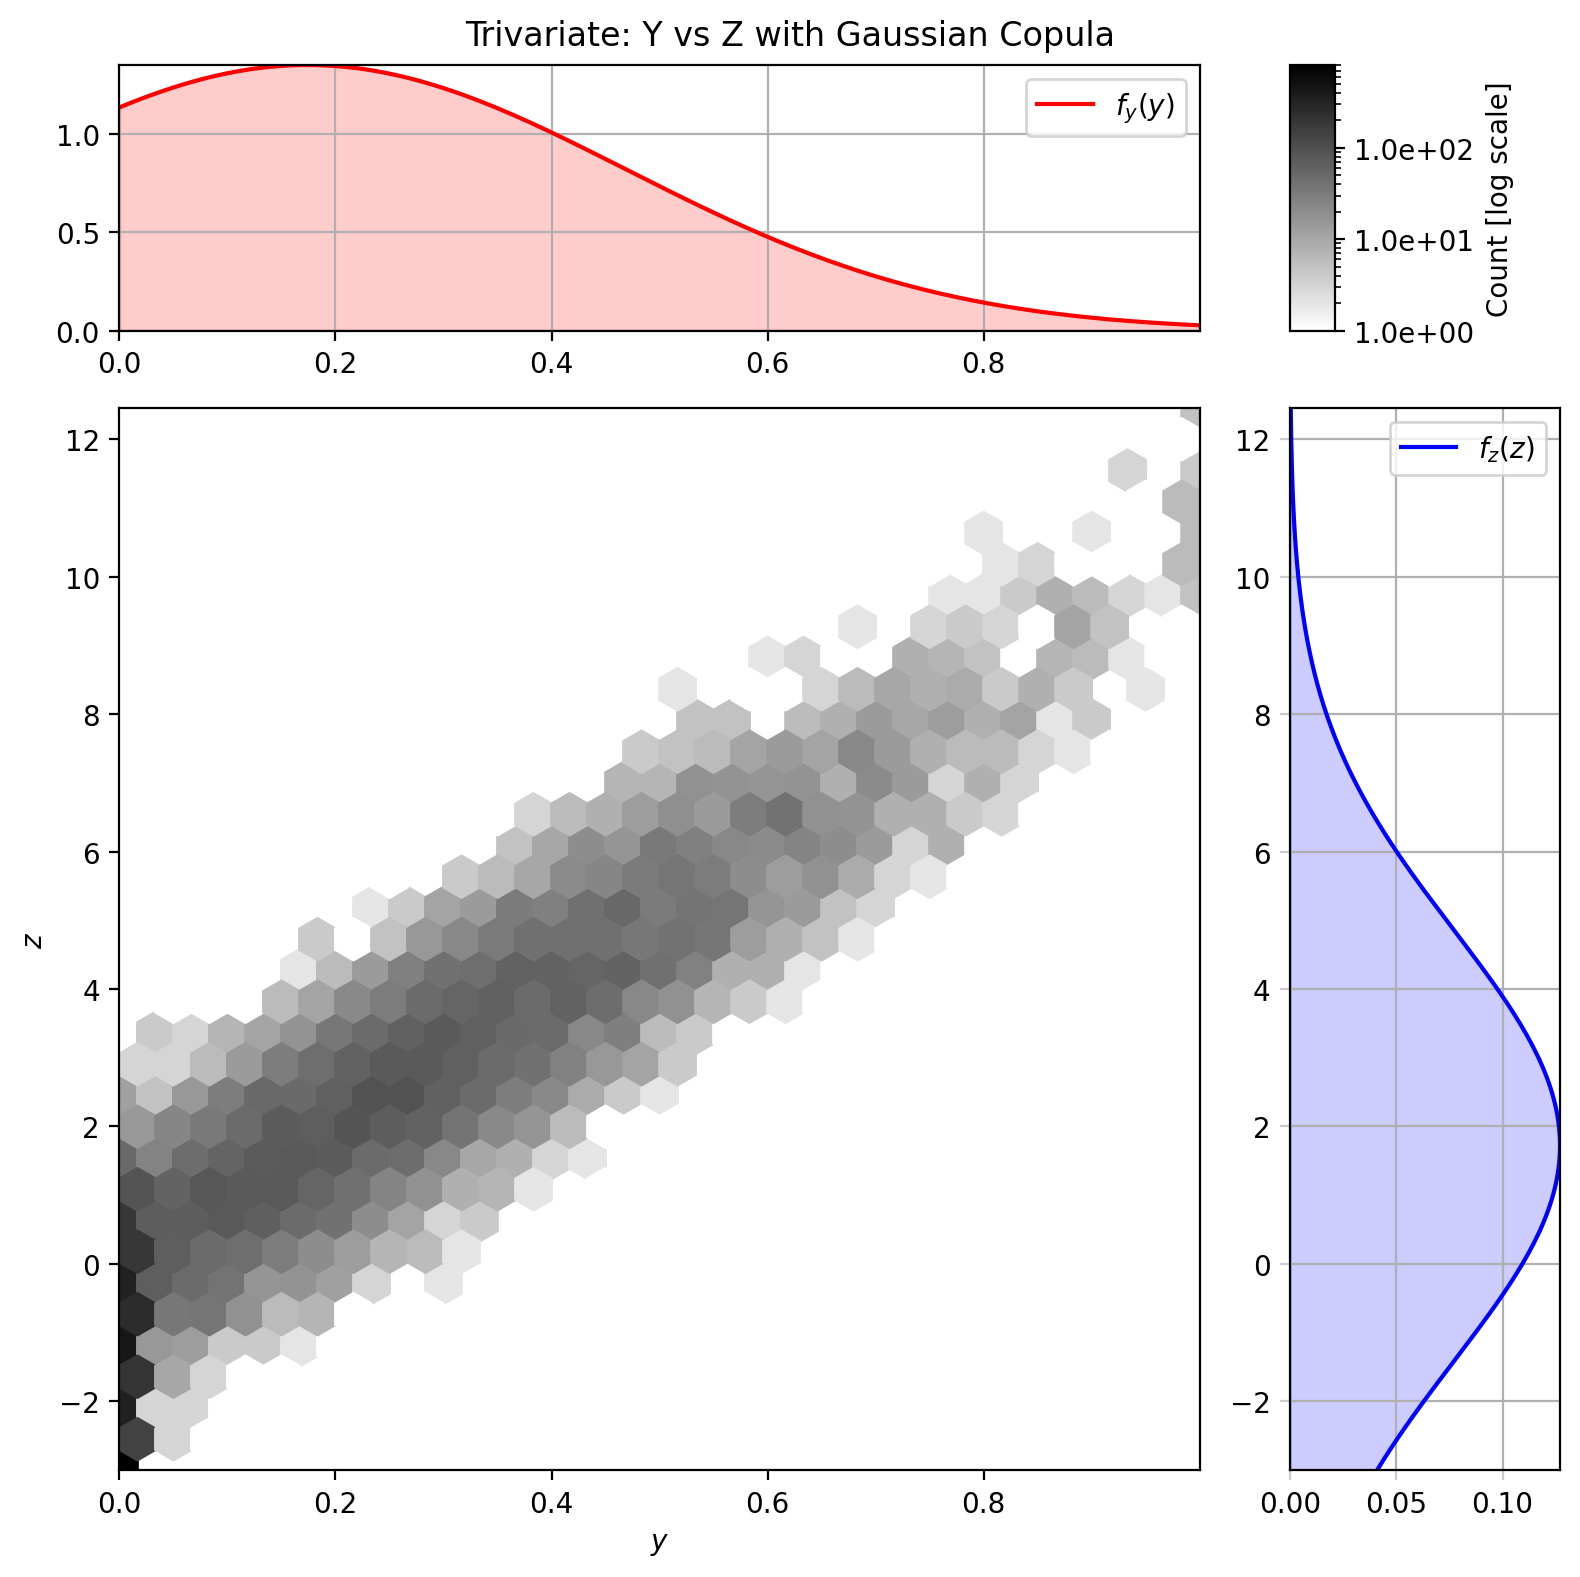

In [65]:
# プロット: Y vs Z
fig = plt.figure(figsize=[8,8], dpi=200)
gs = GridSpec(2, 2, height_ratios=[2,8], width_ratios=[8,2])

ax = plt.subplot(gs[2])
con = ax.hexbin(samples['y'], samples['z'], gridsize=30, bins='log', cmap='binary')
ax.set(axisbelow=False)
ax.set(xlabel=r'$y$')
ax.set(ylabel=r'$z$')
ax.autoscale(tight=True)
ax.set(xlim=[np.min(x2),np.max(x2)])
ax.set(ylim=[np.min(x3),np.max(x3)])

ax = plt.subplot(gs[3])
ax.plot(f3, x3, 'blue', label=r'$f_z(z)$')
ax.fill_betweenx(x3, f3, color='blue', alpha=0.2)
ax.tick_params(color="0.8")
ax.autoscale(tight=True)
ax.set(ylim=[np.min(x3),np.max(x3)])
ax.grid()
ax.legend()

ax = plt.subplot(gs[0])
ax.plot(x2, f2, 'red', label=r'$f_y(y)$')
ax.fill_between(x2, f2, color='red', alpha=0.2)
ax.autoscale(tight=True)
ax.set(xlim=[np.min(x2),np.max(x2)])
ax.grid()
ax.legend()

ax = plt.subplot(gs[1])
ax.set_visible(False)
cax = make_axes_locatable(ax).append_axes('left', size='20%', pad=0)
cbar = fig.colorbar(con, cax=cax, format="%.1e")
cbar.ax.set_ylabel('Count [log scale]')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Trivariate: Y vs Z with Gaussian Copula')
plt.show()

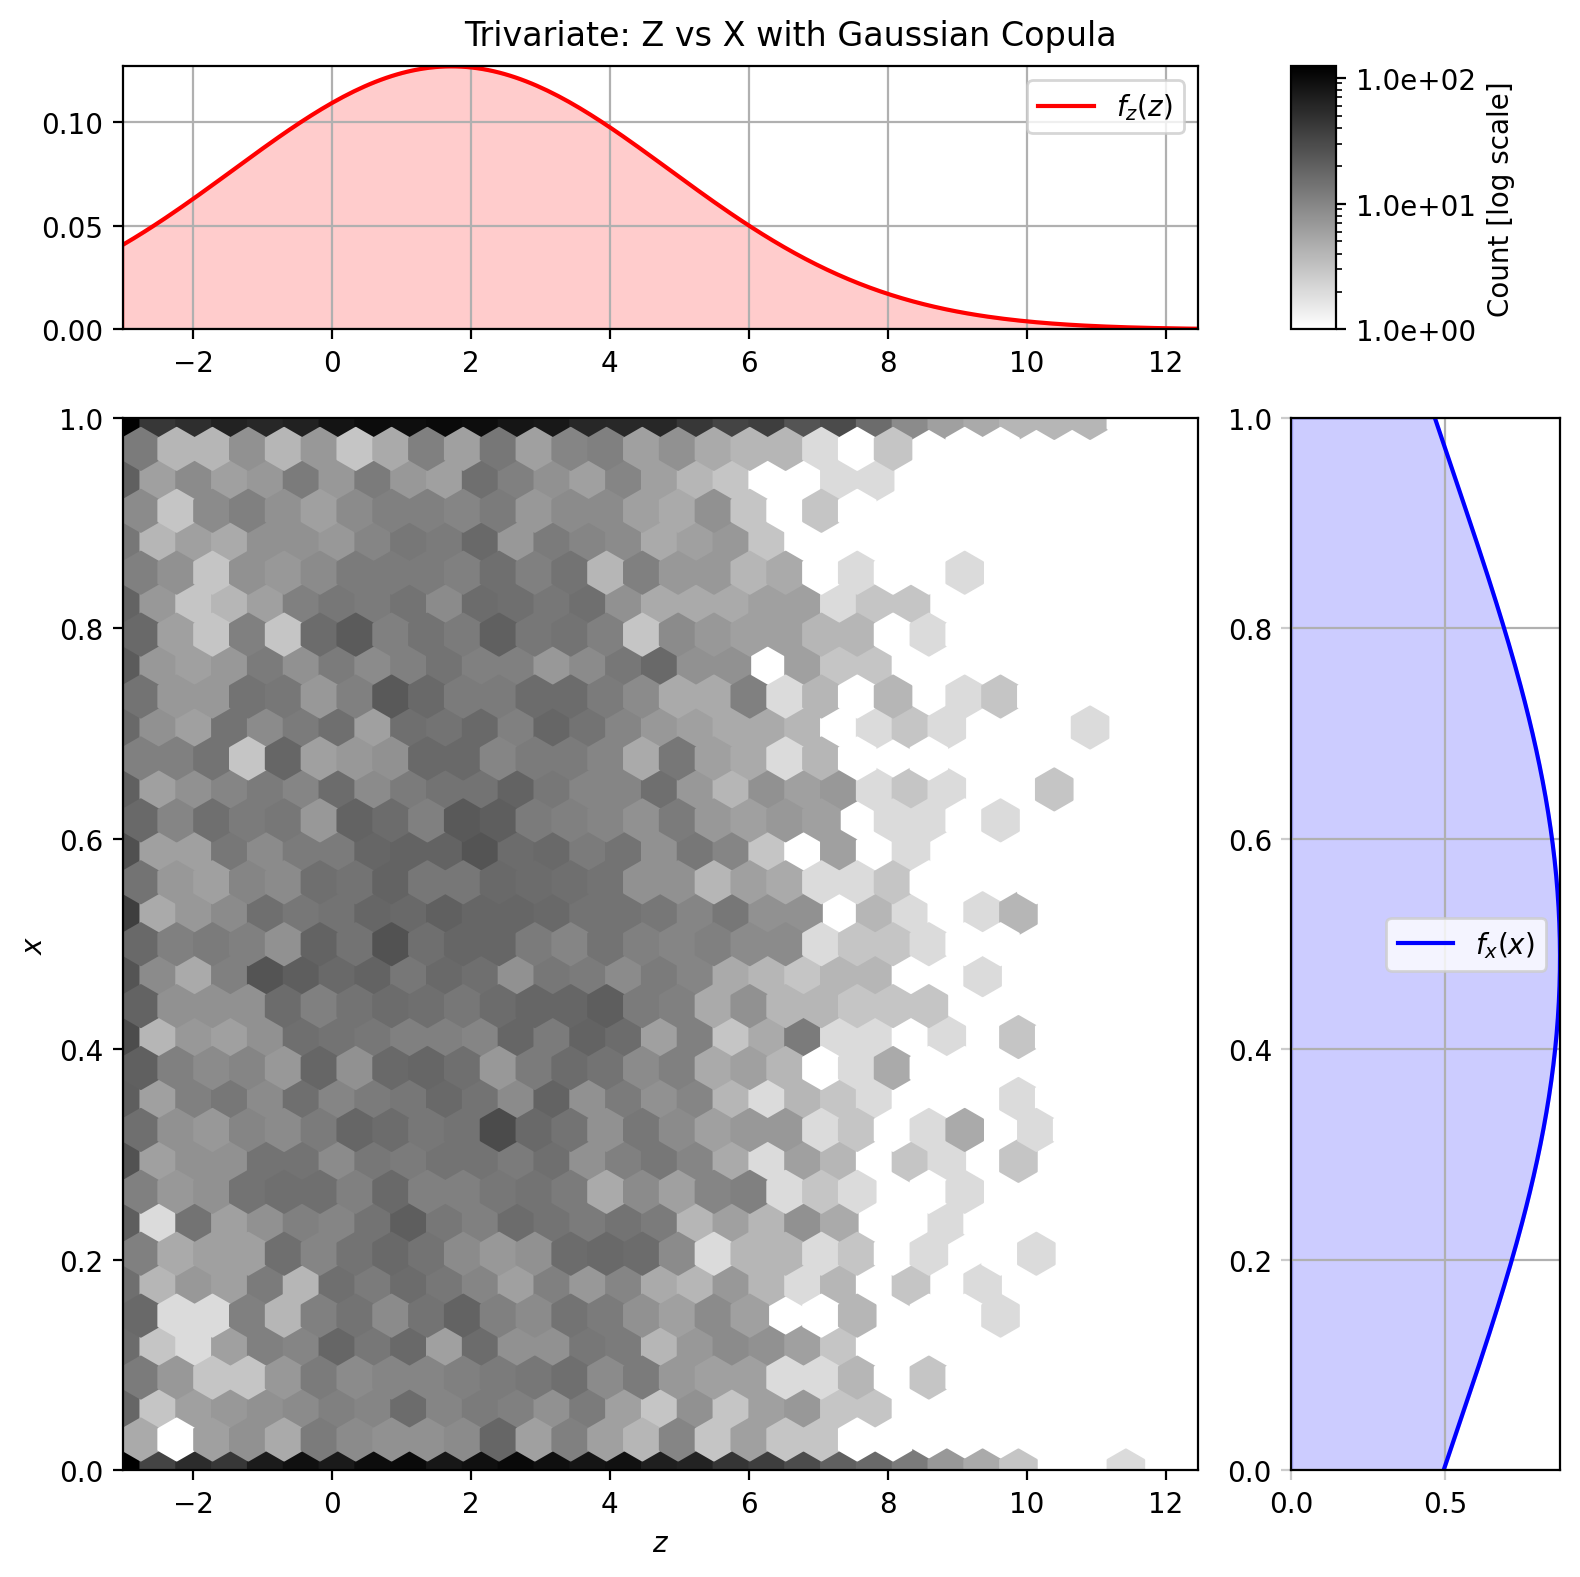

In [66]:
# プロット: Z vs X
fig = plt.figure(figsize=[8,8], dpi=200)
gs = GridSpec(2, 2, height_ratios=[2,8], width_ratios=[8,2])

ax = plt.subplot(gs[2])
con = ax.hexbin(samples['z'], samples['x'], gridsize=30, bins='log', cmap='binary')
ax.set(axisbelow=False)
ax.set(xlabel=r'$z$')
ax.set(ylabel=r'$x$')
ax.autoscale(tight=True)
ax.set(xlim=[np.min(x3),np.max(x3)])
ax.set(ylim=[np.min(x1),np.max(x1)])

ax = plt.subplot(gs[3])
ax.plot(f1, x1, 'blue', label=r'$f_x(x)$')
ax.fill_betweenx(x1, f1, color='blue', alpha=0.2)
ax.tick_params(color="0.8")
ax.autoscale(tight=True)
ax.set(ylim=[np.min(x1),np.max(x1)])
ax.grid()
ax.legend()

ax = plt.subplot(gs[0])
ax.plot(x3, f3, 'red', label=r'$f_z(z)$')
ax.fill_between(x3, f3, color='red', alpha=0.2)
ax.autoscale(tight=True)
ax.set(xlim=[np.min(x3),np.max(x3)])
ax.grid()
ax.legend()

ax = plt.subplot(gs[1])
ax.set_visible(False)
cax = make_axes_locatable(ax).append_axes('left', size='20%', pad=0)
cbar = fig.colorbar(con, cax=cax, format="%.1e")
cbar.ax.set_ylabel('Count [log scale]')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Trivariate: Z vs X with Gaussian Copula')
plt.show()

In [67]:
# パラメトリックモデルに限定して指定
Gaussian_copula_model = multivariate.GaussianMultivariate(
    distribution = univariate.Univariate(parametric=univariate.ParametricType.PARAMETRIC)
)
Gaussian_copula_model.fit(trivariate_xyz)
parameters = Gaussian_copula_model.to_dict()

In [68]:
np.round(parameters['correlation'], 3)

array([[ 1.   , -0.022, -0.039],
       [-0.022,  1.   ,  0.71 ],
       [-0.039,  0.71 ,  1.   ]])

In [69]:
parameters['univariates'][0]['type']

'copulas.univariate.beta.BetaUnivariate'

In [70]:
parameters['univariates'][1]['type']

'copulas.univariate.beta.BetaUnivariate'

In [71]:
parameters['univariates'][2]['type']

'copulas.univariate.student_t.StudentTUnivariate'

In [72]:
# 推定された周辺確率密度関数f1(x1),f2(x2),f3(x3)と同時確率密度関数g12(x1,x2),g23(x2,x3),g31(x3,x1)
# (x1,x2),(x2,x3),(x3,x1)平面でのメッシュを作成
n_points = 201
x1 = np.linspace(trivariate_xyz['x'].min(), trivariate_xyz['x'].max(), n_points)
x2 = np.linspace(trivariate_xyz['y'].min(), trivariate_xyz['y'].max(), n_points)
x3 = np.linspace(trivariate_xyz['z'].min(), trivariate_xyz['z'].max(), n_points)

x1_mesh_for_x12, x2_mesh_for_x12 = np.meshgrid(x1, x2)
x12 = np.c_[x1_mesh_for_x12.flatten(), x2_mesh_for_x12.flatten()]
x2_mesh_for_x23, x3_mesh_for_x23 = np.meshgrid(x2, x3)
x23 = np.c_[x2_mesh_for_x23.flatten(), x3_mesh_for_x23.flatten()]
x3_mesh_for_x31, x1_mesh_for_x31 = np.meshgrid(x3, x1)
x31 = np.c_[x3_mesh_for_x31.flatten(), x1_mesh_for_x31.flatten()]


# インスタンスから周辺確率密度関数f1(x1),f2(x2),f3(x3)を数値計算
f1 = Gaussian_copula_model.univariates[0].pdf(x1)
f2 = Gaussian_copula_model.univariates[1].pdf(x2)
f3 = Gaussian_copula_model.univariates[2].pdf(x3)

# インスタンスから同時確率密度関数g(x1,x2)を近似的に数値計算
# (x1,x2)平面内のメッシュ全てで3変数→2変数へ周辺する計算コストが高いため
# 学習済みモデルから生成した乱数に基づくヒストグラムで近似的に推定
n_samples = 10000
Gaussian_copula_model.set_random_state(random_state=42)
samples = Gaussian_copula_model.sample(num_rows=n_samples)

# 描画の都合上訓練データ外の値は外れ値として除去
samples['x'] = samples['x'].mask(samples['x']<np.min(x1), np.min(x1))
samples['x'] = samples['x'].mask(samples['x']>np.max(x1), np.max(x1))
samples['y'] = samples['y'].mask(samples['y']<np.min(x2), np.min(x2))
samples['y'] = samples['y'].mask(samples['y']>np.max(x2), np.max(x2))
samples['z'] = samples['z'].mask(samples['z']<np.min(x3), np.min(x3))
samples['z'] = samples['z'].mask(samples['z']>np.max(x3), np.max(x3))

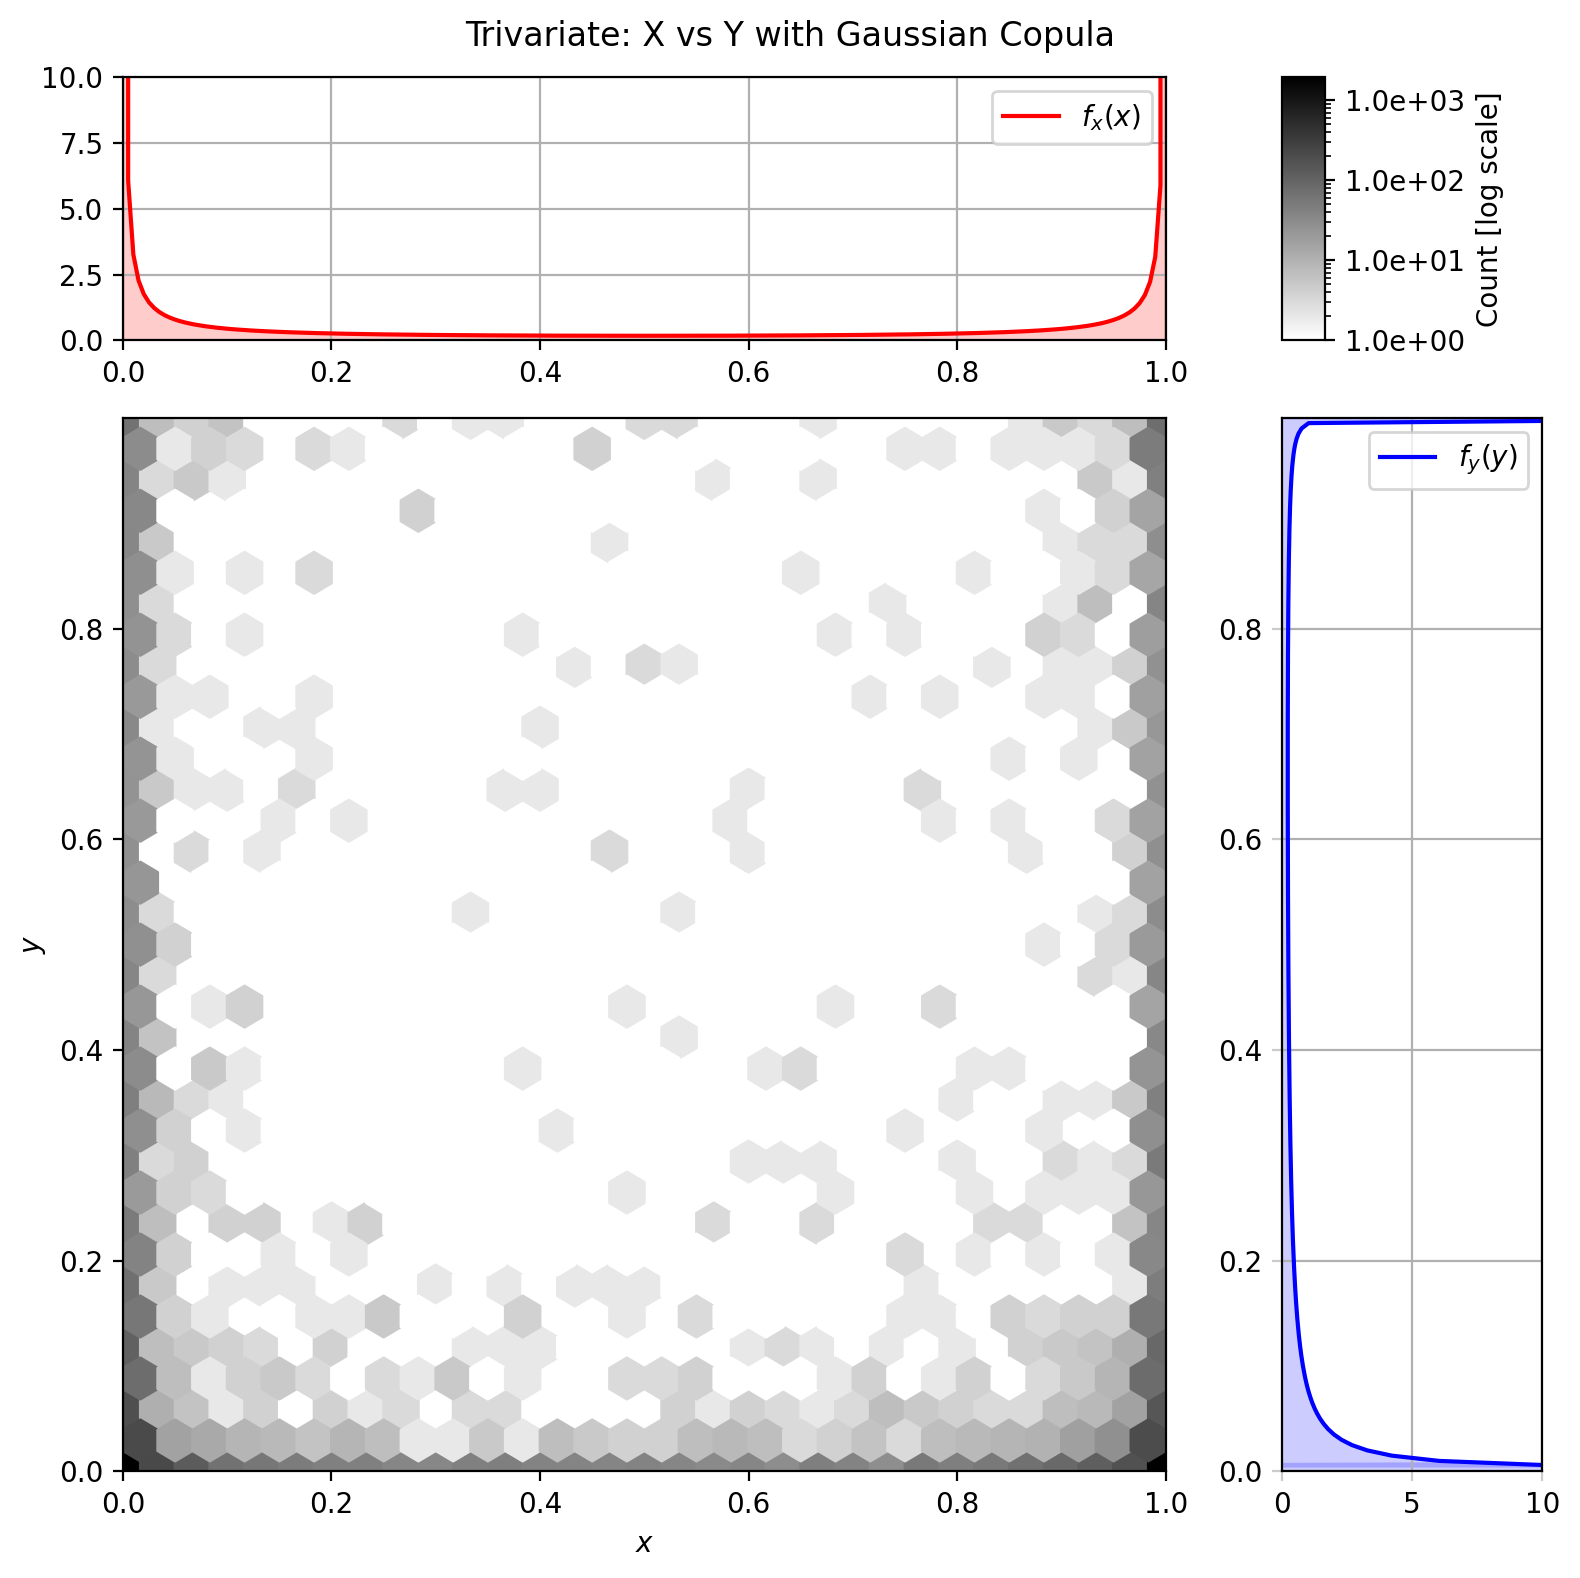

In [73]:
# プロット: X vs Y
fig = plt.figure(figsize=[8,8], dpi=200)
gs = GridSpec(2, 2, height_ratios=[2,8], width_ratios=[8,2])

ax = plt.subplot(gs[2])
con = ax.hexbin(samples['x'], samples['y'], gridsize=30, bins='log', cmap='binary')
ax.set(axisbelow=False)
ax.set(xlabel=r'$x$')
ax.set(ylabel=r'$y$')
ax.autoscale(tight=True)
ax.set(xlim=[np.min(x1),np.max(x1)])
ax.set(ylim=[np.min(x2),np.max(x2)])

ax = plt.subplot(gs[3])
ax.plot(f2, x2, 'blue', label=r'$f_y(y)$')
ax.fill_betweenx(x2, f2, color='blue', alpha=0.2)
ax.tick_params(color="0.8")
ax.autoscale(tight=True)
ax.set(xlim=[0,10])
ax.set(ylim=[np.min(x2),np.max(x2)])
ax.grid()
ax.legend()

ax = plt.subplot(gs[0])
ax.plot(x1, f1, 'red', label=r'$f_x(x)$')
ax.fill_between(x1, f1, color='red', alpha=0.2)
ax.autoscale(tight=True)
ax.set(xlim=[np.min(x1),np.max(x1)])
ax.set(ylim=[0,10])
ax.grid()
ax.legend()

ax = plt.subplot(gs[1])
ax.set_visible(False)
cax = make_axes_locatable(ax).append_axes('left', size='20%', pad=0)
cbar = fig.colorbar(con, cax=cax, format="%.1e")
cbar.ax.set_ylabel('Count [log scale]')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Trivariate: X vs Y with Gaussian Copula')
plt.show()

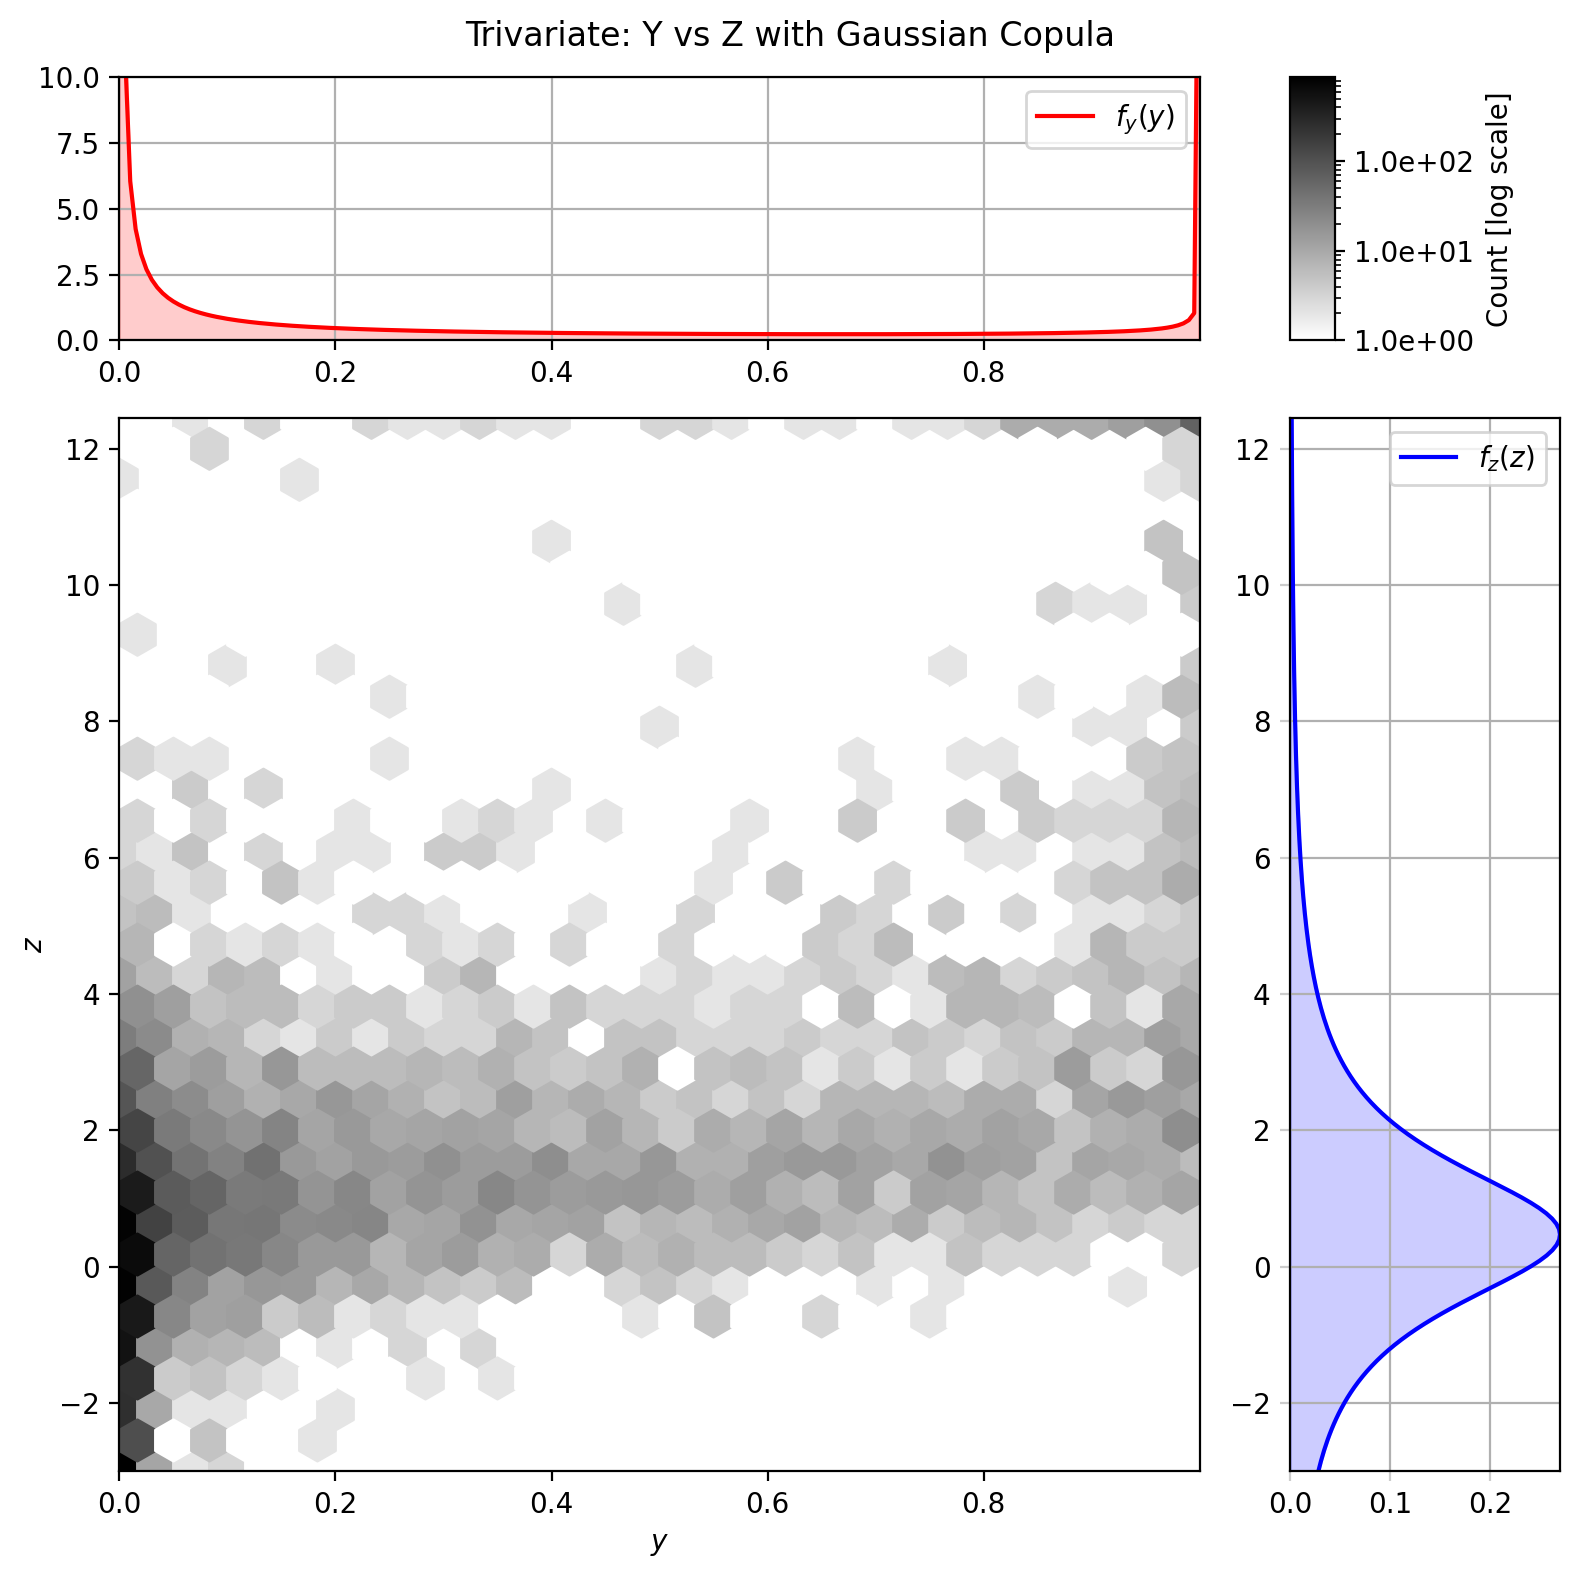

In [74]:
# プロット: Y vs Z
fig = plt.figure(figsize=[8,8], dpi=200)
gs = GridSpec(2, 2, height_ratios=[2,8], width_ratios=[8,2])

ax = plt.subplot(gs[2])
con = ax.hexbin(samples['y'], samples['z'], gridsize=30, bins='log', cmap='binary')
ax.set(axisbelow=False)
ax.set(xlabel=r'$y$')
ax.set(ylabel=r'$z$')
ax.autoscale(tight=True)
ax.set(xlim=[np.min(x2),np.max(x2)])
ax.set(ylim=[np.min(x3),np.max(x3)])

ax = plt.subplot(gs[3])
ax.plot(f3, x3, 'blue', label=r'$f_z(z)$')
ax.fill_betweenx(x3, f3, color='blue', alpha=0.2)
ax.tick_params(color="0.8")
ax.autoscale(tight=True)
ax.set(ylim=[np.min(x3),np.max(x3)])
ax.grid()
ax.legend()

ax = plt.subplot(gs[0])
ax.plot(x2, f2, 'red', label=r'$f_y(y)$')
ax.fill_between(x2, f2, color='red', alpha=0.2)
ax.autoscale(tight=True)
ax.set(xlim=[np.min(x2),np.max(x2)])
ax.set(ylim=[0,10])
ax.grid()
ax.legend()

ax = plt.subplot(gs[1])
ax.set_visible(False)
cax = make_axes_locatable(ax).append_axes('left', size='20%', pad=0)
cbar = fig.colorbar(con, cax=cax, format="%.1e")
cbar.ax.set_ylabel('Count [log scale]')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Trivariate: Y vs Z with Gaussian Copula')
plt.show()

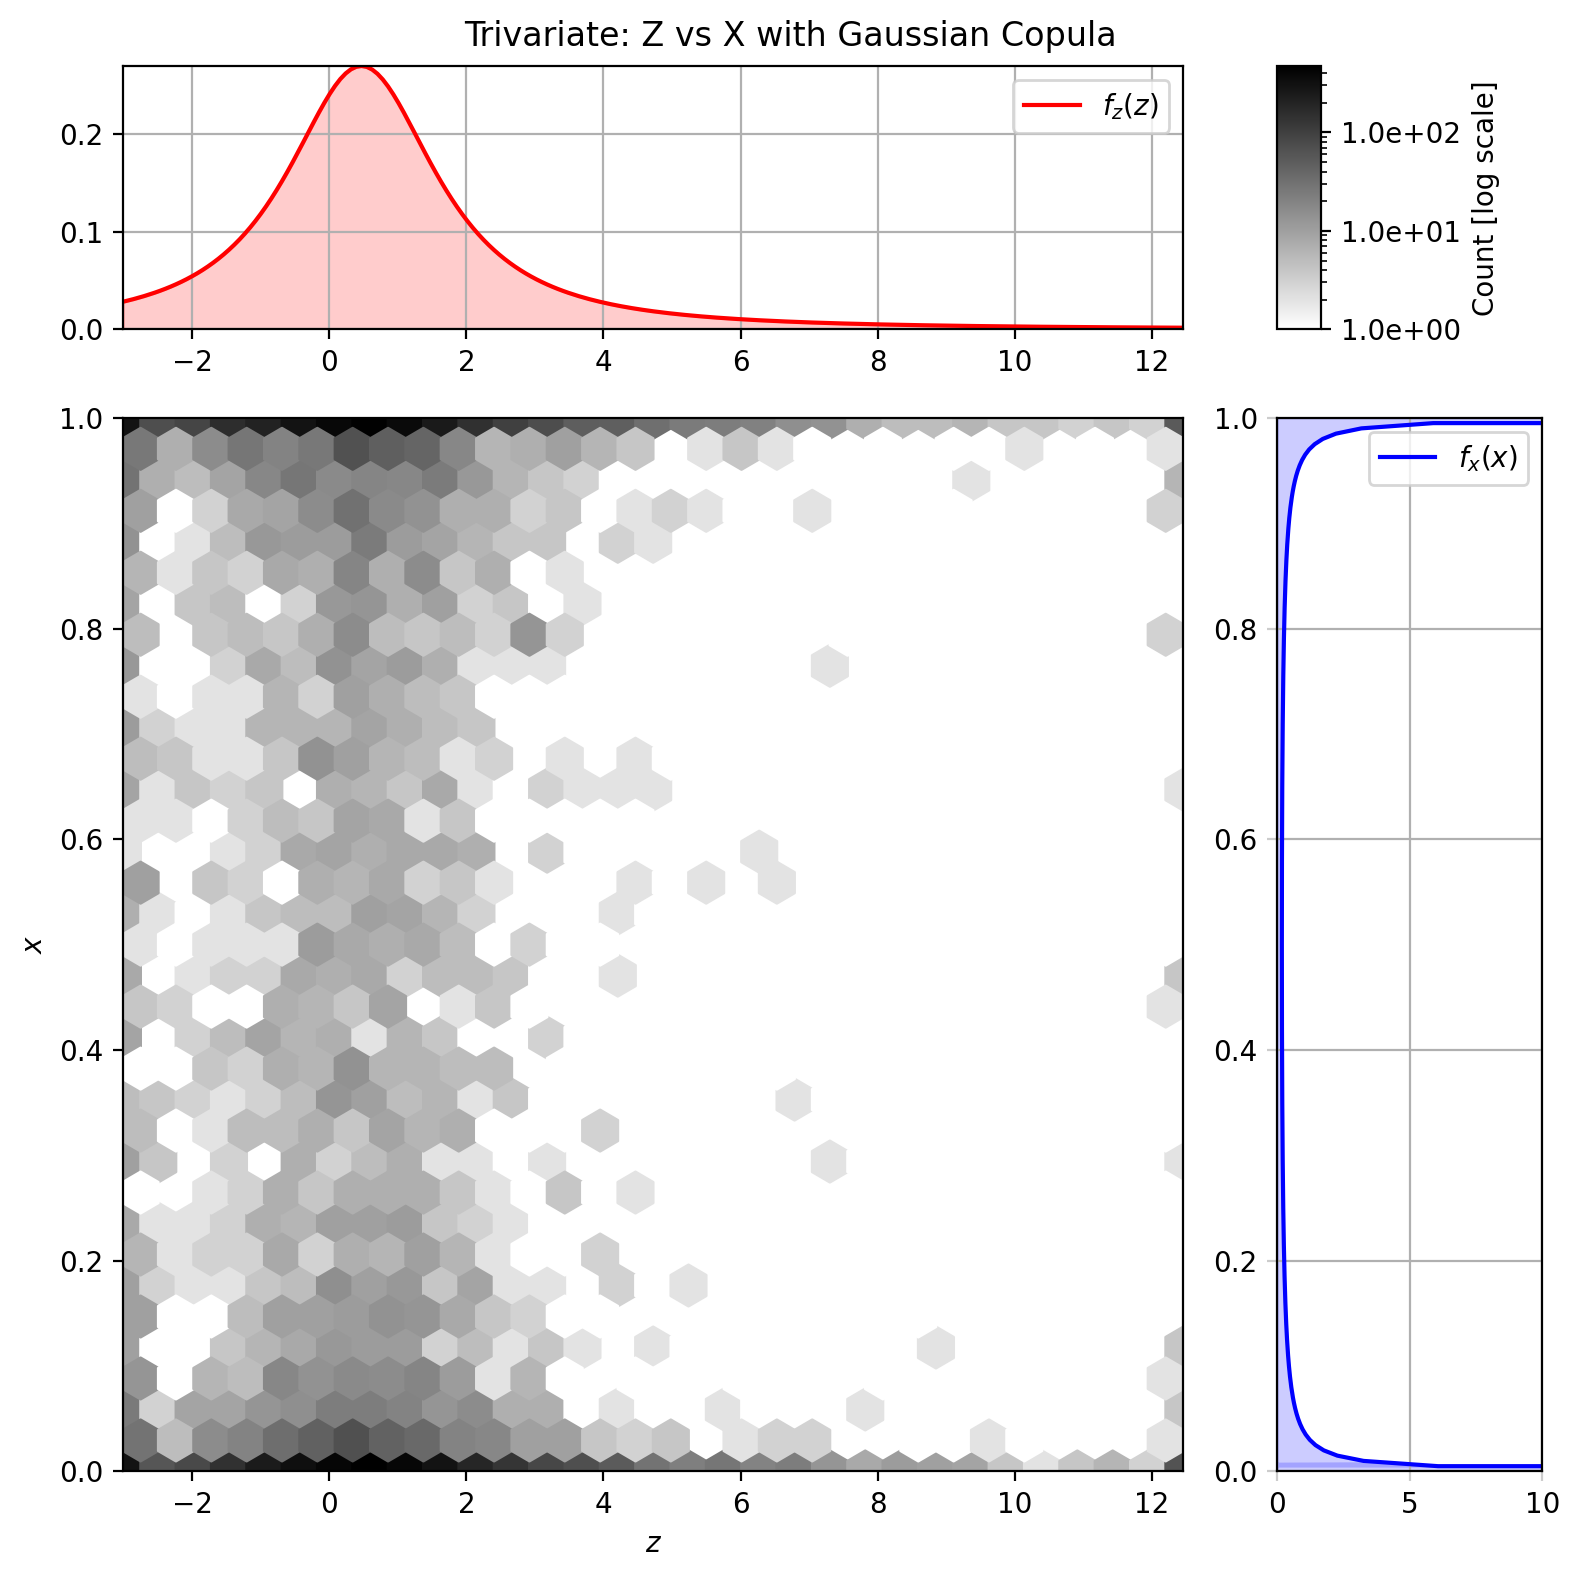

In [75]:
# プロット: Z vs X
fig = plt.figure(figsize=[8,8], dpi=200)
gs = GridSpec(2, 2, height_ratios=[2,8], width_ratios=[8,2])

ax = plt.subplot(gs[2])
con = ax.hexbin(samples['z'], samples['x'], gridsize=30, bins='log', cmap='binary')
ax.set(axisbelow=False)
ax.set(xlabel=r'$z$')
ax.set(ylabel=r'$x$')
ax.autoscale(tight=True)
ax.set(xlim=[np.min(x3),np.max(x3)])
ax.set(ylim=[np.min(x1),np.max(x1)])

ax = plt.subplot(gs[3])
ax.plot(f1, x1, 'blue', label=r'$f_x(x)$')
ax.fill_betweenx(x1, f1, color='blue', alpha=0.2)
ax.tick_params(color="0.8")
ax.autoscale(tight=True)
ax.set(ylim=[np.min(x1),np.max(x1)])
ax.set(xlim=[0,10])
ax.grid()
ax.legend()

ax = plt.subplot(gs[0])
ax.plot(x3, f3, 'red', label=r'$f_z(z)$')
ax.fill_between(x3, f3, color='red', alpha=0.2)
ax.autoscale(tight=True)
ax.set(xlim=[np.min(x3),np.max(x3)])
ax.grid()
ax.legend()

ax = plt.subplot(gs[1])
ax.set_visible(False)
cax = make_axes_locatable(ax).append_axes('left', size='20%', pad=0)
cbar = fig.colorbar(con, cax=cax, format="%.1e")
cbar.ax.set_ylabel('Count [log scale]')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Trivariate: Z vs X with Gaussian Copula')
plt.show()

In [76]:
# より詳細に分布を指定
Gaussian_copula_model = multivariate.GaussianMultivariate(
    distribution = {
        "x": univariate.BetaUnivariate,
        "y": univariate.GaussianKDE,
        "z": univariate.GaussianUnivariate,
    }
)
Gaussian_copula_model.fit(trivariate_xyz)
parameters = Gaussian_copula_model.to_dict()

In [77]:
np.round(parameters['correlation'], 3)

array([[ 1.   , -0.038, -0.051],
       [-0.038,  1.   ,  0.906],
       [-0.051,  0.906,  1.   ]])

In [78]:
parameters['univariates'][0]['type']

'copulas.univariate.beta.BetaUnivariate'

In [79]:
parameters['univariates'][1]['type']

'copulas.univariate.gaussian_kde.GaussianKDE'

In [80]:
parameters['univariates'][2]['type']

'copulas.univariate.gaussian.GaussianUnivariate'

In [81]:
# 推定された周辺確率密度関数f1(x1),f2(x2),f3(x3)と同時確率密度関数g12(x1,x2),g23(x2,x3),g31(x3,x1)
# (x1,x2),(x2,x3),(x3,x1)平面でのメッシュを作成
n_points = 201
x1 = np.linspace(trivariate_xyz['x'].min(), trivariate_xyz['x'].max(), n_points)
x2 = np.linspace(trivariate_xyz['y'].min(), trivariate_xyz['y'].max(), n_points)
x3 = np.linspace(trivariate_xyz['z'].min(), trivariate_xyz['z'].max(), n_points)

x1_mesh_for_x12, x2_mesh_for_x12 = np.meshgrid(x1, x2)
x12 = np.c_[x1_mesh_for_x12.flatten(), x2_mesh_for_x12.flatten()]
x2_mesh_for_x23, x3_mesh_for_x23 = np.meshgrid(x2, x3)
x23 = np.c_[x2_mesh_for_x23.flatten(), x3_mesh_for_x23.flatten()]
x3_mesh_for_x31, x1_mesh_for_x31 = np.meshgrid(x3, x1)
x31 = np.c_[x3_mesh_for_x31.flatten(), x1_mesh_for_x31.flatten()]


# インスタンスから周辺確率密度関数f1(x1),f2(x2),f3(x3)を数値計算
f1 = Gaussian_copula_model.univariates[0].pdf(x1)
f2 = Gaussian_copula_model.univariates[1].pdf(x2)
f3 = Gaussian_copula_model.univariates[2].pdf(x3)

# インスタンスから同時確率密度関数g(x1,x2)を近似的に数値計算
# (x1,x2)平面内のメッシュ全てで3変数→2変数へ周辺する計算コストが高いため
# 学習済みモデルから生成した乱数に基づくヒストグラムで近似的に推定
n_samples = 10000
Gaussian_copula_model.set_random_state(random_state=42)
samples = Gaussian_copula_model.sample(num_rows=n_samples)

# 描画の都合上訓練データ外の値は外れ値として除去
samples['x'] = samples['x'].mask(samples['x']<np.min(x1), np.min(x1))
samples['x'] = samples['x'].mask(samples['x']>np.max(x1), np.max(x1))
samples['y'] = samples['y'].mask(samples['y']<np.min(x2), np.min(x2))
samples['y'] = samples['y'].mask(samples['y']>np.max(x2), np.max(x2))
samples['z'] = samples['z'].mask(samples['z']<np.min(x3), np.min(x3))
samples['z'] = samples['z'].mask(samples['z']>np.max(x3), np.max(x3))

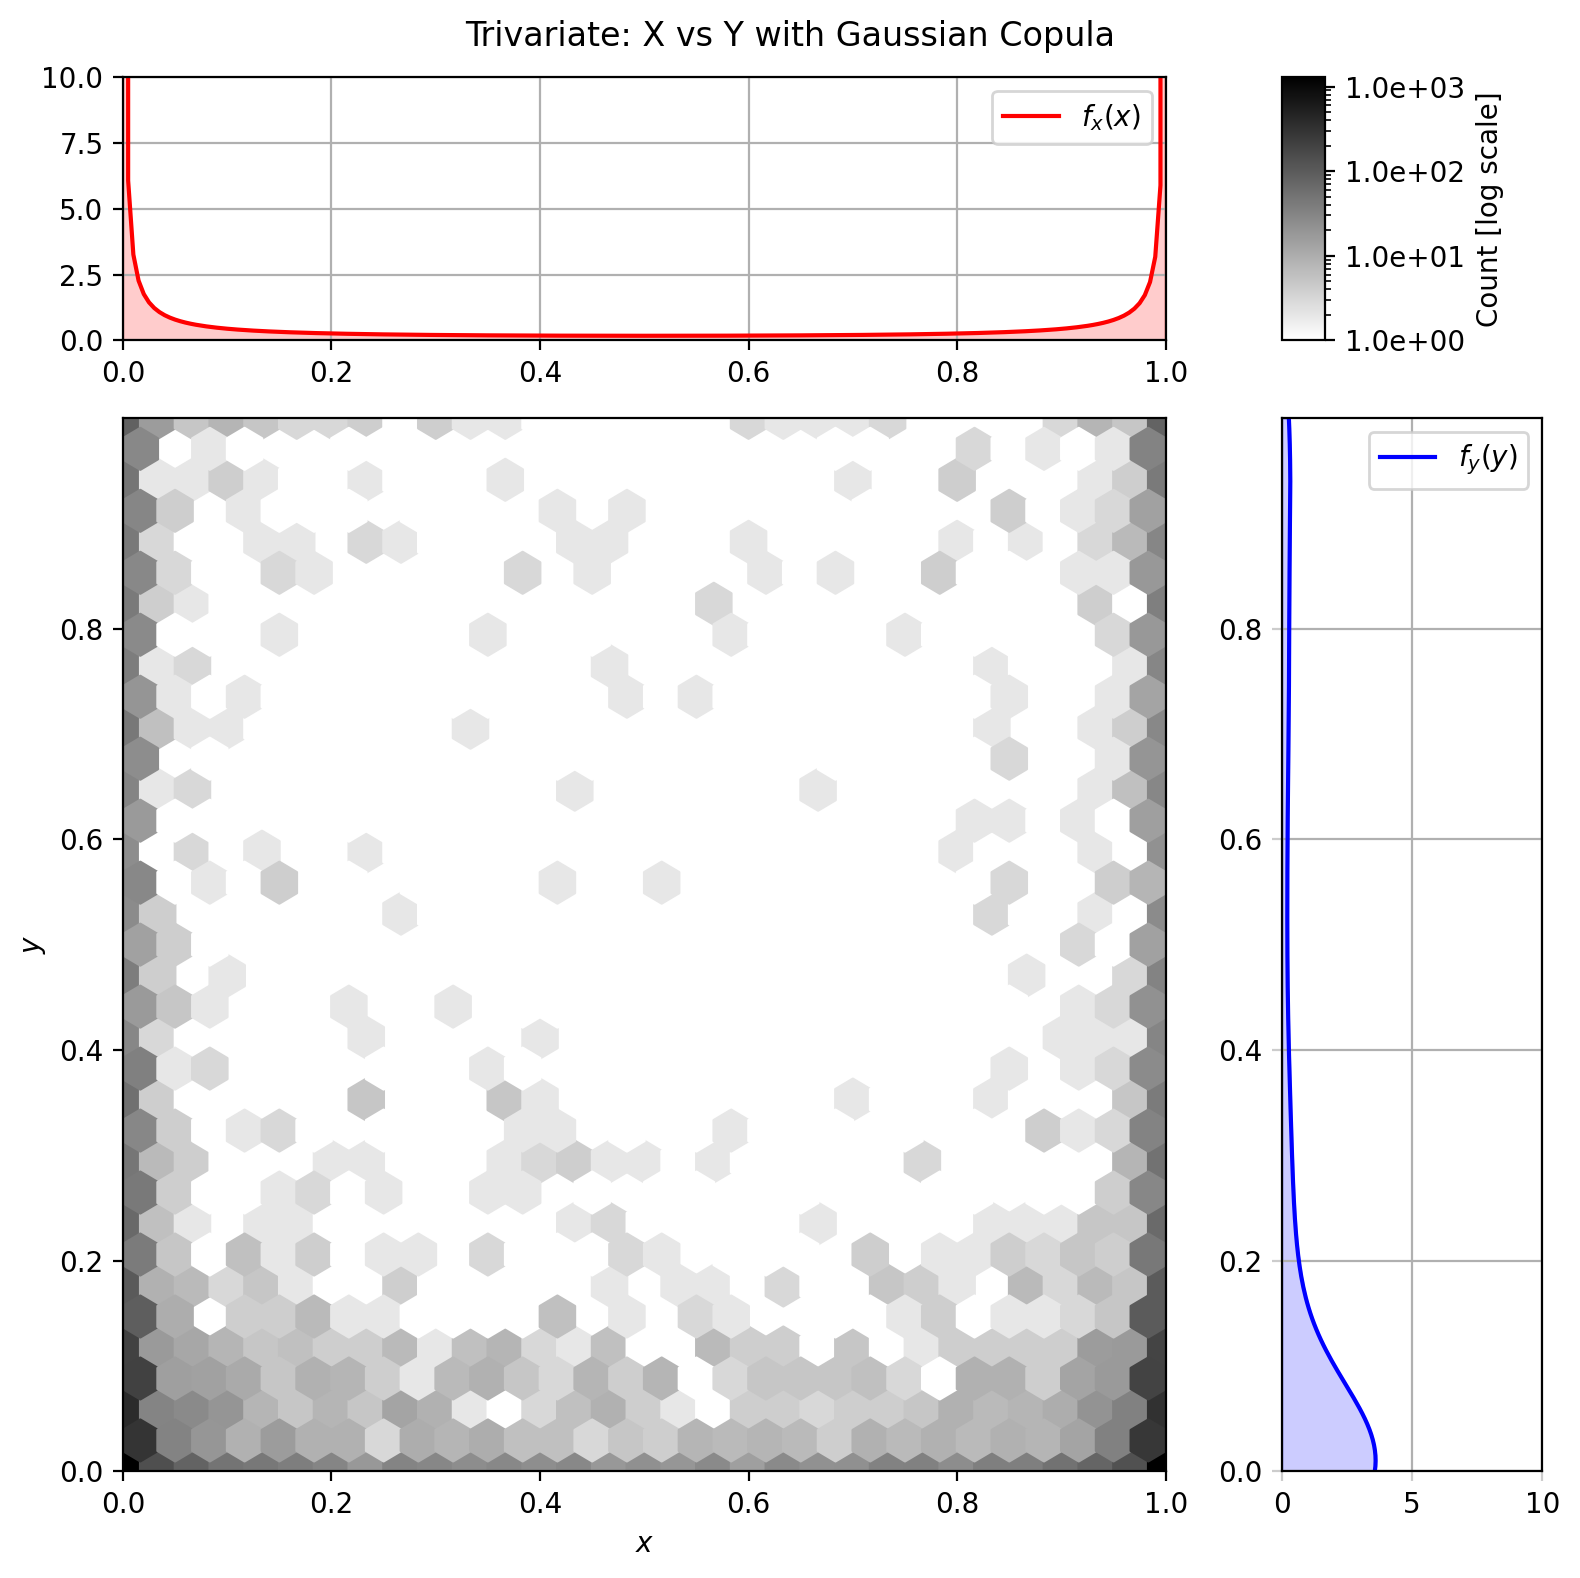

In [82]:
# プロット: X vs Y
fig = plt.figure(figsize=[8,8], dpi=200)
gs = GridSpec(2, 2, height_ratios=[2,8], width_ratios=[8,2])

ax = plt.subplot(gs[2])
con = ax.hexbin(samples['x'], samples['y'], gridsize=30, bins='log', cmap='binary')
ax.set(axisbelow=False)
ax.set(xlabel=r'$x$')
ax.set(ylabel=r'$y$')
ax.autoscale(tight=True)
ax.set(xlim=[np.min(x1),np.max(x1)])
ax.set(ylim=[np.min(x2),np.max(x2)])

ax = plt.subplot(gs[3])
ax.plot(f2, x2, 'blue', label=r'$f_y(y)$')
ax.fill_betweenx(x2, f2, color='blue', alpha=0.2)
ax.tick_params(color="0.8")
ax.autoscale(tight=True)
ax.set(xlim=[0,10])
ax.set(ylim=[np.min(x2),np.max(x2)])
ax.grid()
ax.legend()

ax = plt.subplot(gs[0])
ax.plot(x1, f1, 'red', label=r'$f_x(x)$')
ax.fill_between(x1, f1, color='red', alpha=0.2)
ax.autoscale(tight=True)
ax.set(xlim=[np.min(x1),np.max(x1)])
ax.set(ylim=[0,10])
ax.grid()
ax.legend()

ax = plt.subplot(gs[1])
ax.set_visible(False)
cax = make_axes_locatable(ax).append_axes('left', size='20%', pad=0)
cbar = fig.colorbar(con, cax=cax, format="%.1e")
cbar.ax.set_ylabel('Count [log scale]')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Trivariate: X vs Y with Gaussian Copula')
plt.show()

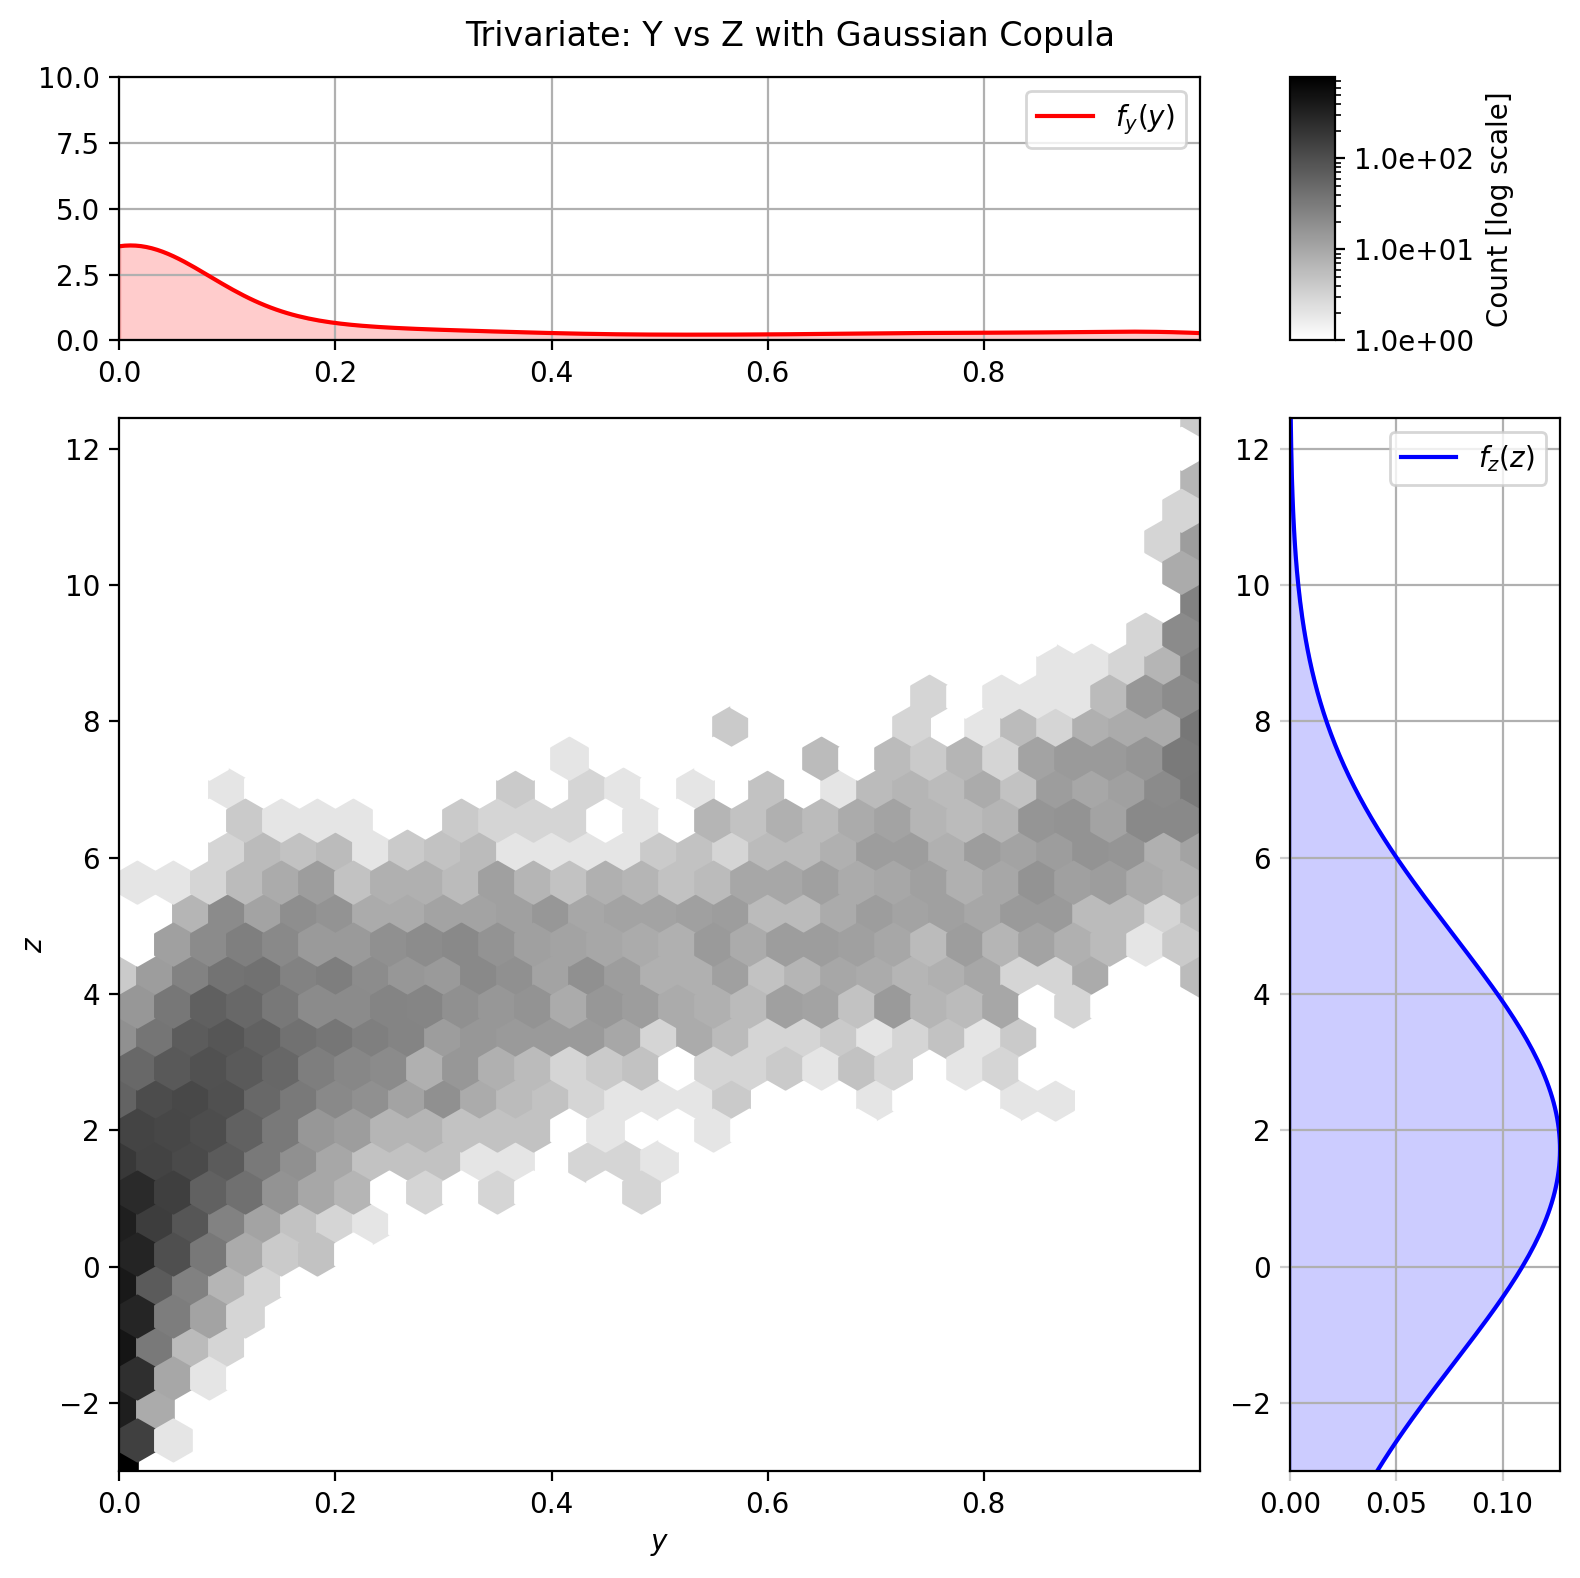

In [83]:
# プロット: Y vs Z
fig = plt.figure(figsize=[8,8], dpi=200)
gs = GridSpec(2, 2, height_ratios=[2,8], width_ratios=[8,2])

ax = plt.subplot(gs[2])
con = ax.hexbin(samples['y'], samples['z'], gridsize=30, bins='log', cmap='binary')
ax.set(axisbelow=False)
ax.set(xlabel=r'$y$')
ax.set(ylabel=r'$z$')
ax.autoscale(tight=True)
ax.set(xlim=[np.min(x2),np.max(x2)])
ax.set(ylim=[np.min(x3),np.max(x3)])

ax = plt.subplot(gs[3])
ax.plot(f3, x3, 'blue', label=r'$f_z(z)$')
ax.fill_betweenx(x3, f3, color='blue', alpha=0.2)
ax.tick_params(color="0.8")
ax.autoscale(tight=True)
ax.set(ylim=[np.min(x3),np.max(x3)])
ax.grid()
ax.legend()

ax = plt.subplot(gs[0])
ax.plot(x2, f2, 'red', label=r'$f_y(y)$')
ax.fill_between(x2, f2, color='red', alpha=0.2)
ax.autoscale(tight=True)
ax.set(xlim=[np.min(x2),np.max(x2)])
ax.set(ylim=[0,10])
ax.grid()
ax.legend()

ax = plt.subplot(gs[1])
ax.set_visible(False)
cax = make_axes_locatable(ax).append_axes('left', size='20%', pad=0)
cbar = fig.colorbar(con, cax=cax, format="%.1e")
cbar.ax.set_ylabel('Count [log scale]')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Trivariate: Y vs Z with Gaussian Copula')
plt.show()

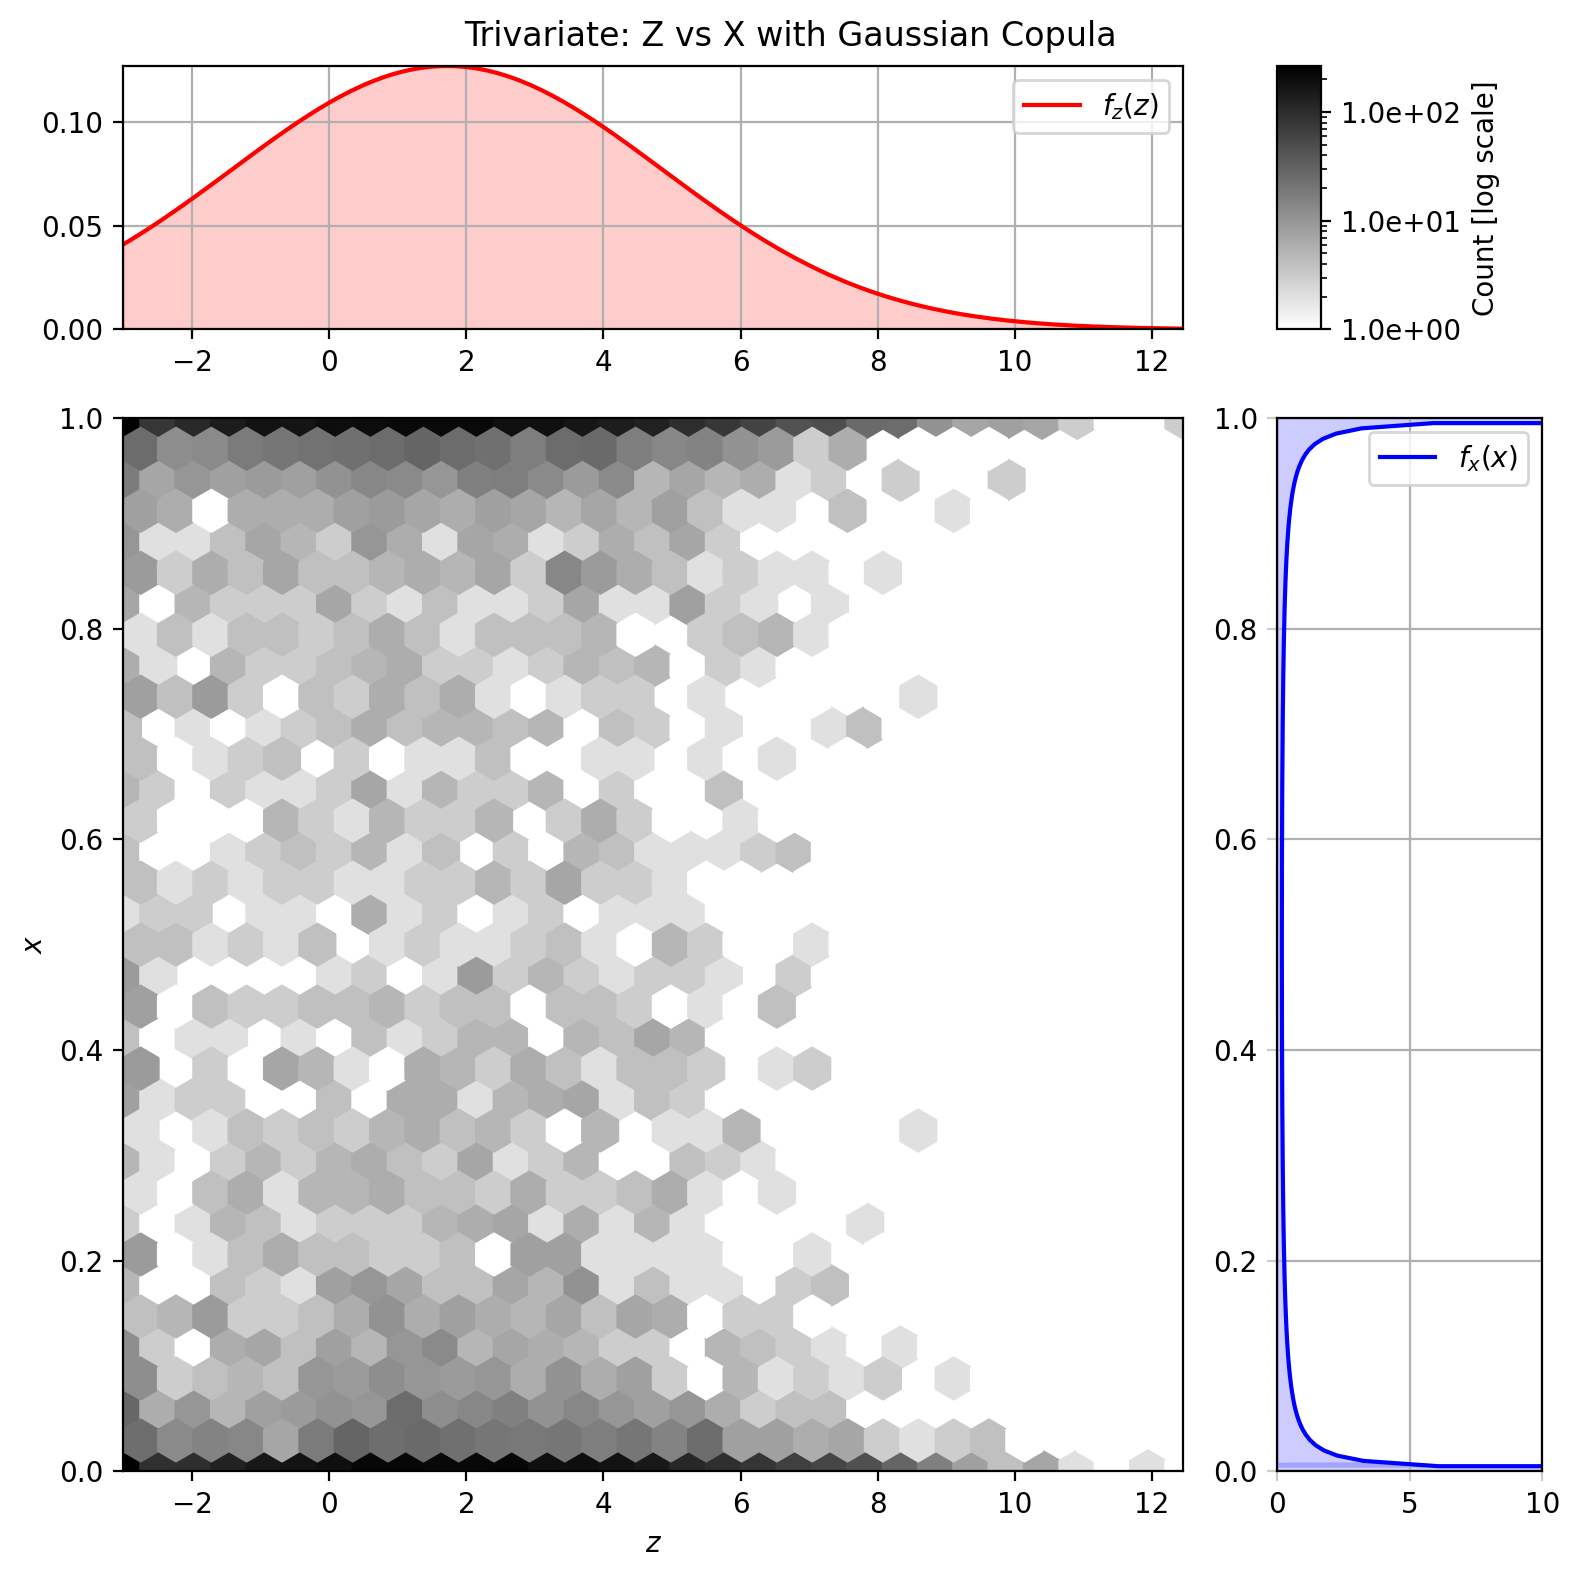

In [84]:
# プロット: Z vs X
fig = plt.figure(figsize=[8,8], dpi=200)
gs = GridSpec(2, 2, height_ratios=[2,8], width_ratios=[8,2])

ax = plt.subplot(gs[2])
con = ax.hexbin(samples['z'], samples['x'], gridsize=30, bins='log', cmap='binary')
ax.set(axisbelow=False)
ax.set(xlabel=r'$z$')
ax.set(ylabel=r'$x$')
ax.autoscale(tight=True)
ax.set(xlim=[np.min(x3),np.max(x3)])
ax.set(ylim=[np.min(x1),np.max(x1)])

ax = plt.subplot(gs[3])
ax.plot(f1, x1, 'blue', label=r'$f_x(x)$')
ax.fill_betweenx(x1, f1, color='blue', alpha=0.2)
ax.tick_params(color="0.8")
ax.autoscale(tight=True)
ax.set(ylim=[np.min(x1),np.max(x1)])
ax.set(xlim=[0,10])
ax.grid()
ax.legend()

ax = plt.subplot(gs[0])
ax.plot(x3, f3, 'red', label=r'$f_z(z)$')
ax.fill_between(x3, f3, color='red', alpha=0.2)
ax.autoscale(tight=True)
ax.set(xlim=[np.min(x3),np.max(x3)])
ax.grid()
ax.legend()

ax = plt.subplot(gs[1])
ax.set_visible(False)
cax = make_axes_locatable(ax).append_axes('left', size='20%', pad=0)
cbar = fig.colorbar(con, cax=cax, format="%.1e")
cbar.ax.set_ylabel('Count [log scale]')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Trivariate: Z vs X with Gaussian Copula')
plt.show()

#### 周辺分布を指定せず推定

In [85]:
# 周辺分布を指定しない
Gaussian_copula_model = multivariate.GaussianMultivariate()
Gaussian_copula_model.fit(trivariate_xyz)
parameters = Gaussian_copula_model.to_dict()

In [86]:
np.round(parameters['correlation'], 3)

array([[ 1.   , -0.022, -0.039],
       [-0.022,  1.   ,  0.696],
       [-0.039,  0.696,  1.   ]])

In [87]:
parameters['univariates'][0]['type']

'copulas.univariate.beta.BetaUnivariate'

In [88]:
parameters['univariates'][1]['type']

'copulas.univariate.beta.BetaUnivariate'

In [89]:
parameters['univariates'][2]['type']

'copulas.univariate.gaussian_kde.GaussianKDE'

In [90]:
# 推定された周辺確率密度関数f1(x1),f2(x2),f3(x3)と同時確率密度関数g12(x1,x2),g23(x2,x3),g31(x3,x1)
# (x1,x2),(x2,x3),(x3,x1)平面でのメッシュを作成
n_points = 201
x1 = np.linspace(trivariate_xyz['x'].min(), trivariate_xyz['x'].max(), n_points)
x2 = np.linspace(trivariate_xyz['y'].min(), trivariate_xyz['y'].max(), n_points)
x3 = np.linspace(trivariate_xyz['z'].min(), trivariate_xyz['z'].max(), n_points)

x1_mesh_for_x12, x2_mesh_for_x12 = np.meshgrid(x1, x2)
x12 = np.c_[x1_mesh_for_x12.flatten(), x2_mesh_for_x12.flatten()]
x2_mesh_for_x23, x3_mesh_for_x23 = np.meshgrid(x2, x3)
x23 = np.c_[x2_mesh_for_x23.flatten(), x3_mesh_for_x23.flatten()]
x3_mesh_for_x31, x1_mesh_for_x31 = np.meshgrid(x3, x1)
x31 = np.c_[x3_mesh_for_x31.flatten(), x1_mesh_for_x31.flatten()]


# インスタンスから周辺確率密度関数f1(x1),f2(x2),f3(x3)を数値計算
f1 = Gaussian_copula_model.univariates[0].pdf(x1)
f2 = Gaussian_copula_model.univariates[1].pdf(x2)
f3 = Gaussian_copula_model.univariates[2].pdf(x3)

# インスタンスから同時確率密度関数g(x1,x2)を近似的に数値計算
# (x1,x2)平面内のメッシュ全てで3変数→2変数へ周辺する計算コストが高いため
# 学習済みモデルから生成した乱数に基づくヒストグラムで近似的に推定
n_samples = 10000
Gaussian_copula_model.set_random_state(random_state=42)
samples = Gaussian_copula_model.sample(num_rows=n_samples)

# 描画の都合上訓練データ外の値は外れ値として除去
samples['x'] = samples['x'].mask(samples['x']<np.min(x1), np.min(x1))
samples['x'] = samples['x'].mask(samples['x']>np.max(x1), np.max(x1))
samples['y'] = samples['y'].mask(samples['y']<np.min(x2), np.min(x2))
samples['y'] = samples['y'].mask(samples['y']>np.max(x2), np.max(x2))
samples['z'] = samples['z'].mask(samples['z']<np.min(x3), np.min(x3))
samples['z'] = samples['z'].mask(samples['z']>np.max(x3), np.max(x3))

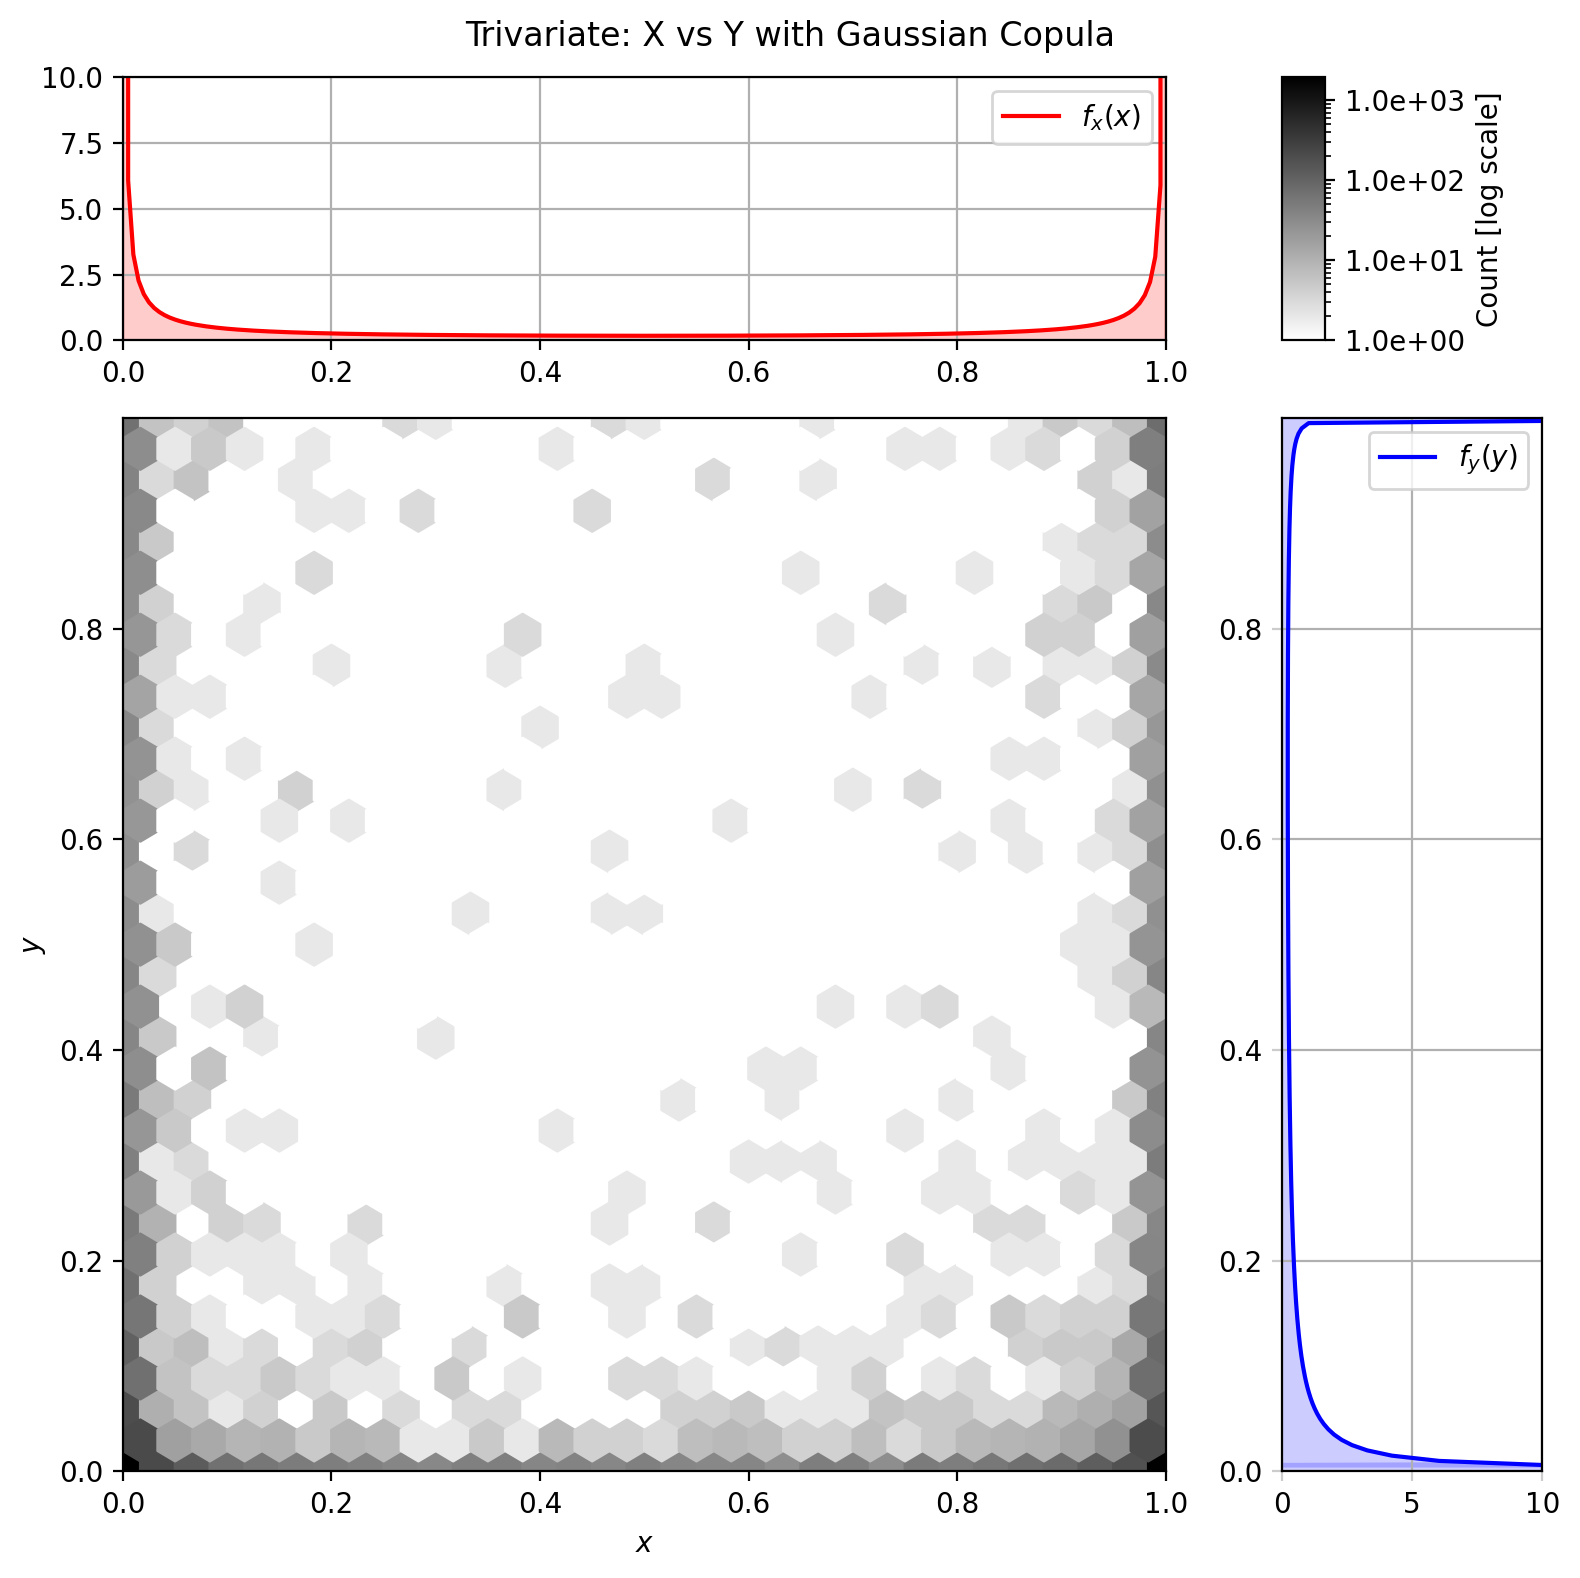

In [91]:
# プロット: X vs Y
fig = plt.figure(figsize=[8,8], dpi=200)
gs = GridSpec(2, 2, height_ratios=[2,8], width_ratios=[8,2])

ax = plt.subplot(gs[2])
con = ax.hexbin(samples['x'], samples['y'], gridsize=30, bins='log', cmap='binary')
ax.set(axisbelow=False)
ax.set(xlabel=r'$x$')
ax.set(ylabel=r'$y$')
ax.autoscale(tight=True)
ax.set(xlim=[np.min(x1),np.max(x1)])
ax.set(ylim=[np.min(x2),np.max(x2)])

ax = plt.subplot(gs[3])
ax.plot(f2, x2, 'blue', label=r'$f_y(y)$')
ax.fill_betweenx(x2, f2, color='blue', alpha=0.2)
ax.tick_params(color="0.8")
ax.autoscale(tight=True)
ax.set(xlim=[0,10])
ax.set(ylim=[np.min(x2),np.max(x2)])
ax.grid()
ax.legend()

ax = plt.subplot(gs[0])
ax.plot(x1, f1, 'red', label=r'$f_x(x)$')
ax.fill_between(x1, f1, color='red', alpha=0.2)
ax.autoscale(tight=True)
ax.set(xlim=[np.min(x1),np.max(x1)])
ax.set(ylim=[0,10])
ax.grid()
ax.legend()

ax = plt.subplot(gs[1])
ax.set_visible(False)
cax = make_axes_locatable(ax).append_axes('left', size='20%', pad=0)
cbar = fig.colorbar(con, cax=cax, format="%.1e")
cbar.ax.set_ylabel('Count [log scale]')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Trivariate: X vs Y with Gaussian Copula')
plt.show()

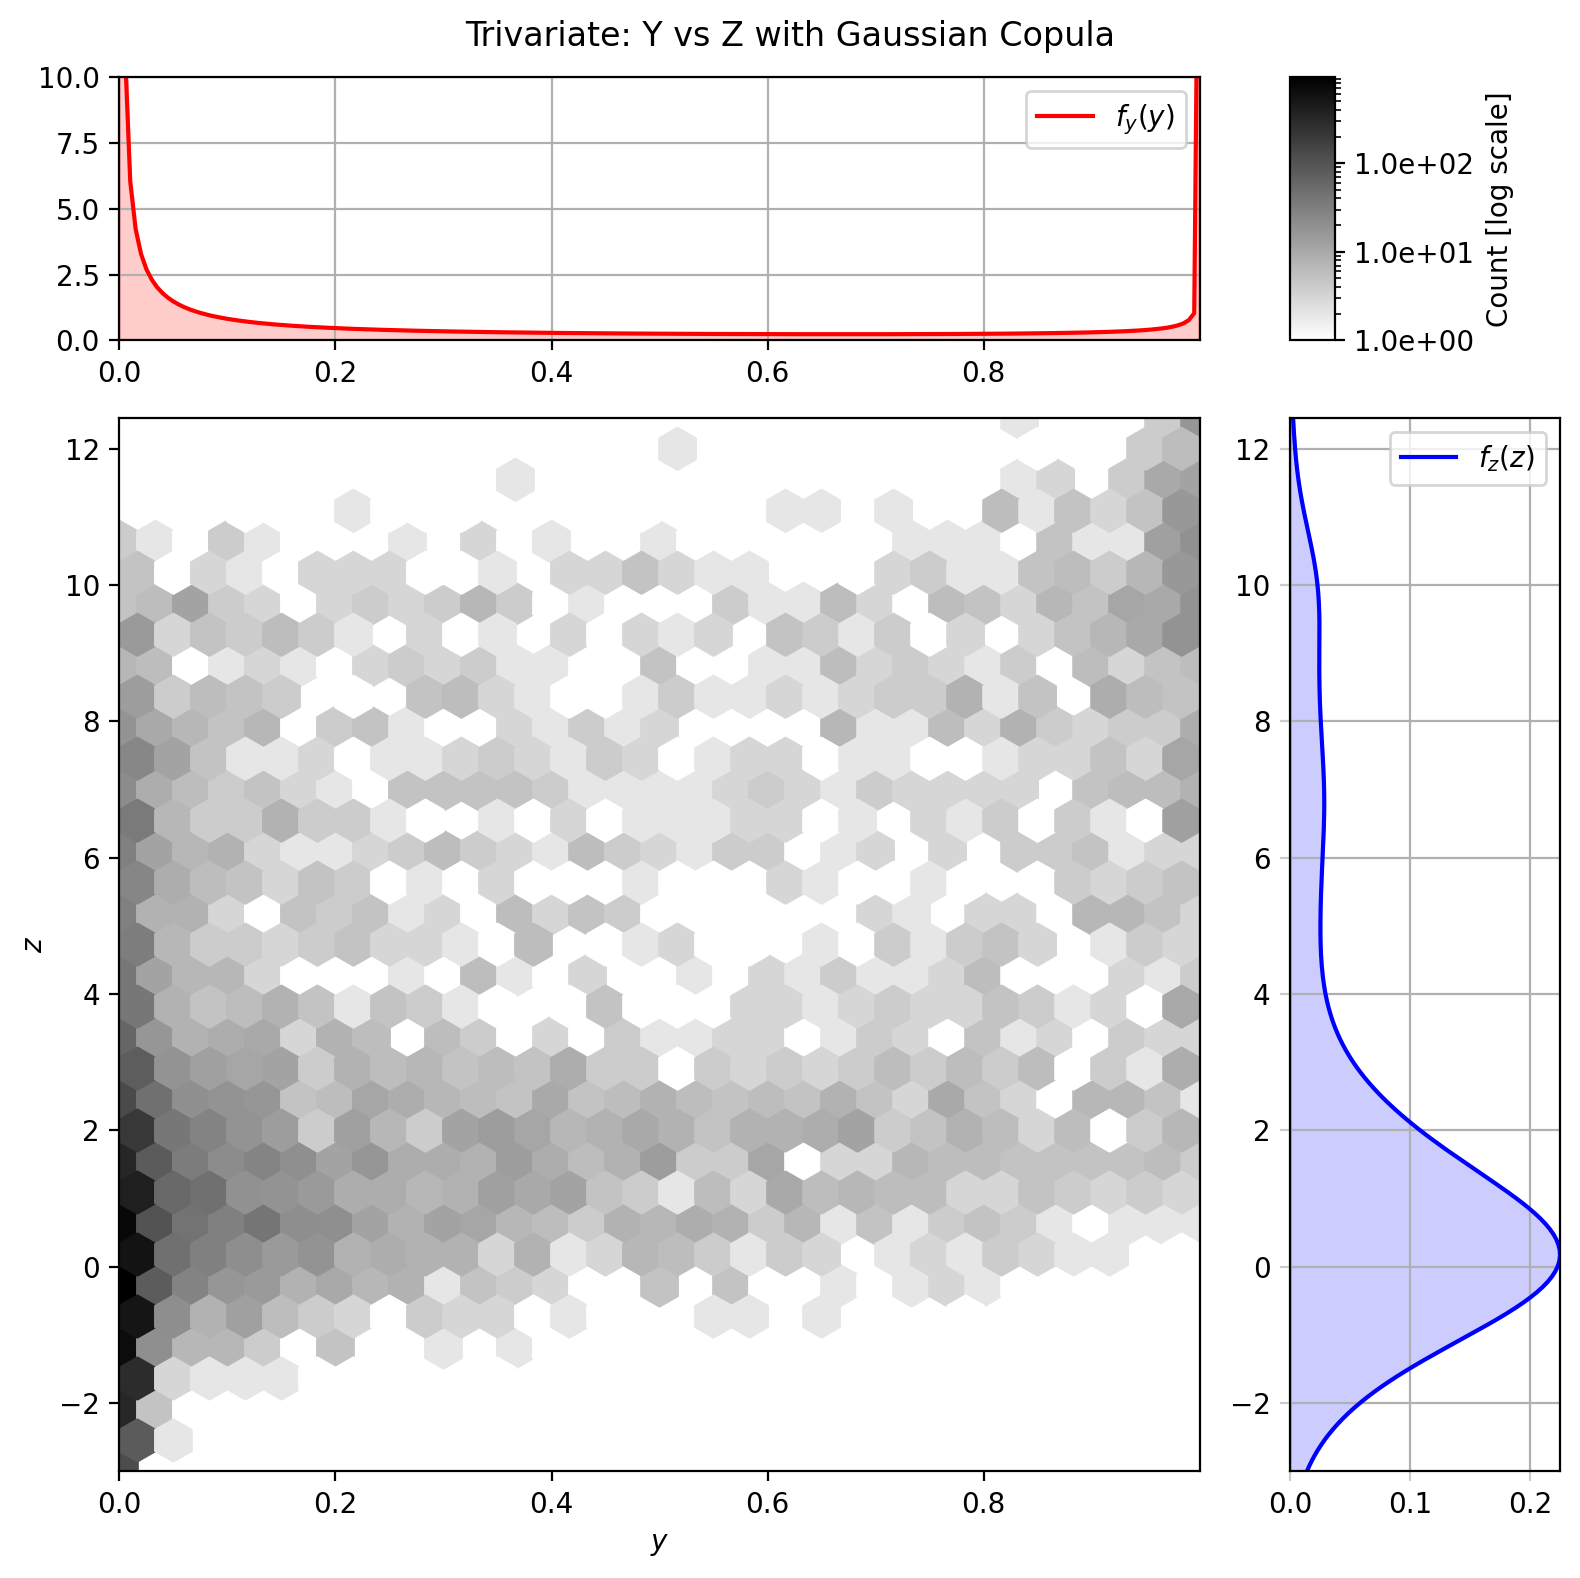

In [92]:
# プロット: Y vs Z
fig = plt.figure(figsize=[8,8], dpi=200)
gs = GridSpec(2, 2, height_ratios=[2,8], width_ratios=[8,2])

ax = plt.subplot(gs[2])
con = ax.hexbin(samples['y'], samples['z'], gridsize=30, bins='log', cmap='binary')
ax.set(axisbelow=False)
ax.set(xlabel=r'$y$')
ax.set(ylabel=r'$z$')
ax.autoscale(tight=True)
ax.set(xlim=[np.min(x2),np.max(x2)])
ax.set(ylim=[np.min(x3),np.max(x3)])

ax = plt.subplot(gs[3])
ax.plot(f3, x3, 'blue', label=r'$f_z(z)$')
ax.fill_betweenx(x3, f3, color='blue', alpha=0.2)
ax.tick_params(color="0.8")
ax.autoscale(tight=True)
ax.set(ylim=[np.min(x3),np.max(x3)])
ax.grid()
ax.legend()

ax = plt.subplot(gs[0])
ax.plot(x2, f2, 'red', label=r'$f_y(y)$')
ax.fill_between(x2, f2, color='red', alpha=0.2)
ax.autoscale(tight=True)
ax.set(xlim=[np.min(x2),np.max(x2)])
ax.set(ylim=[0,10])
ax.grid()
ax.legend()

ax = plt.subplot(gs[1])
ax.set_visible(False)
cax = make_axes_locatable(ax).append_axes('left', size='20%', pad=0)
cbar = fig.colorbar(con, cax=cax, format="%.1e")
cbar.ax.set_ylabel('Count [log scale]')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Trivariate: Y vs Z with Gaussian Copula')
plt.show()

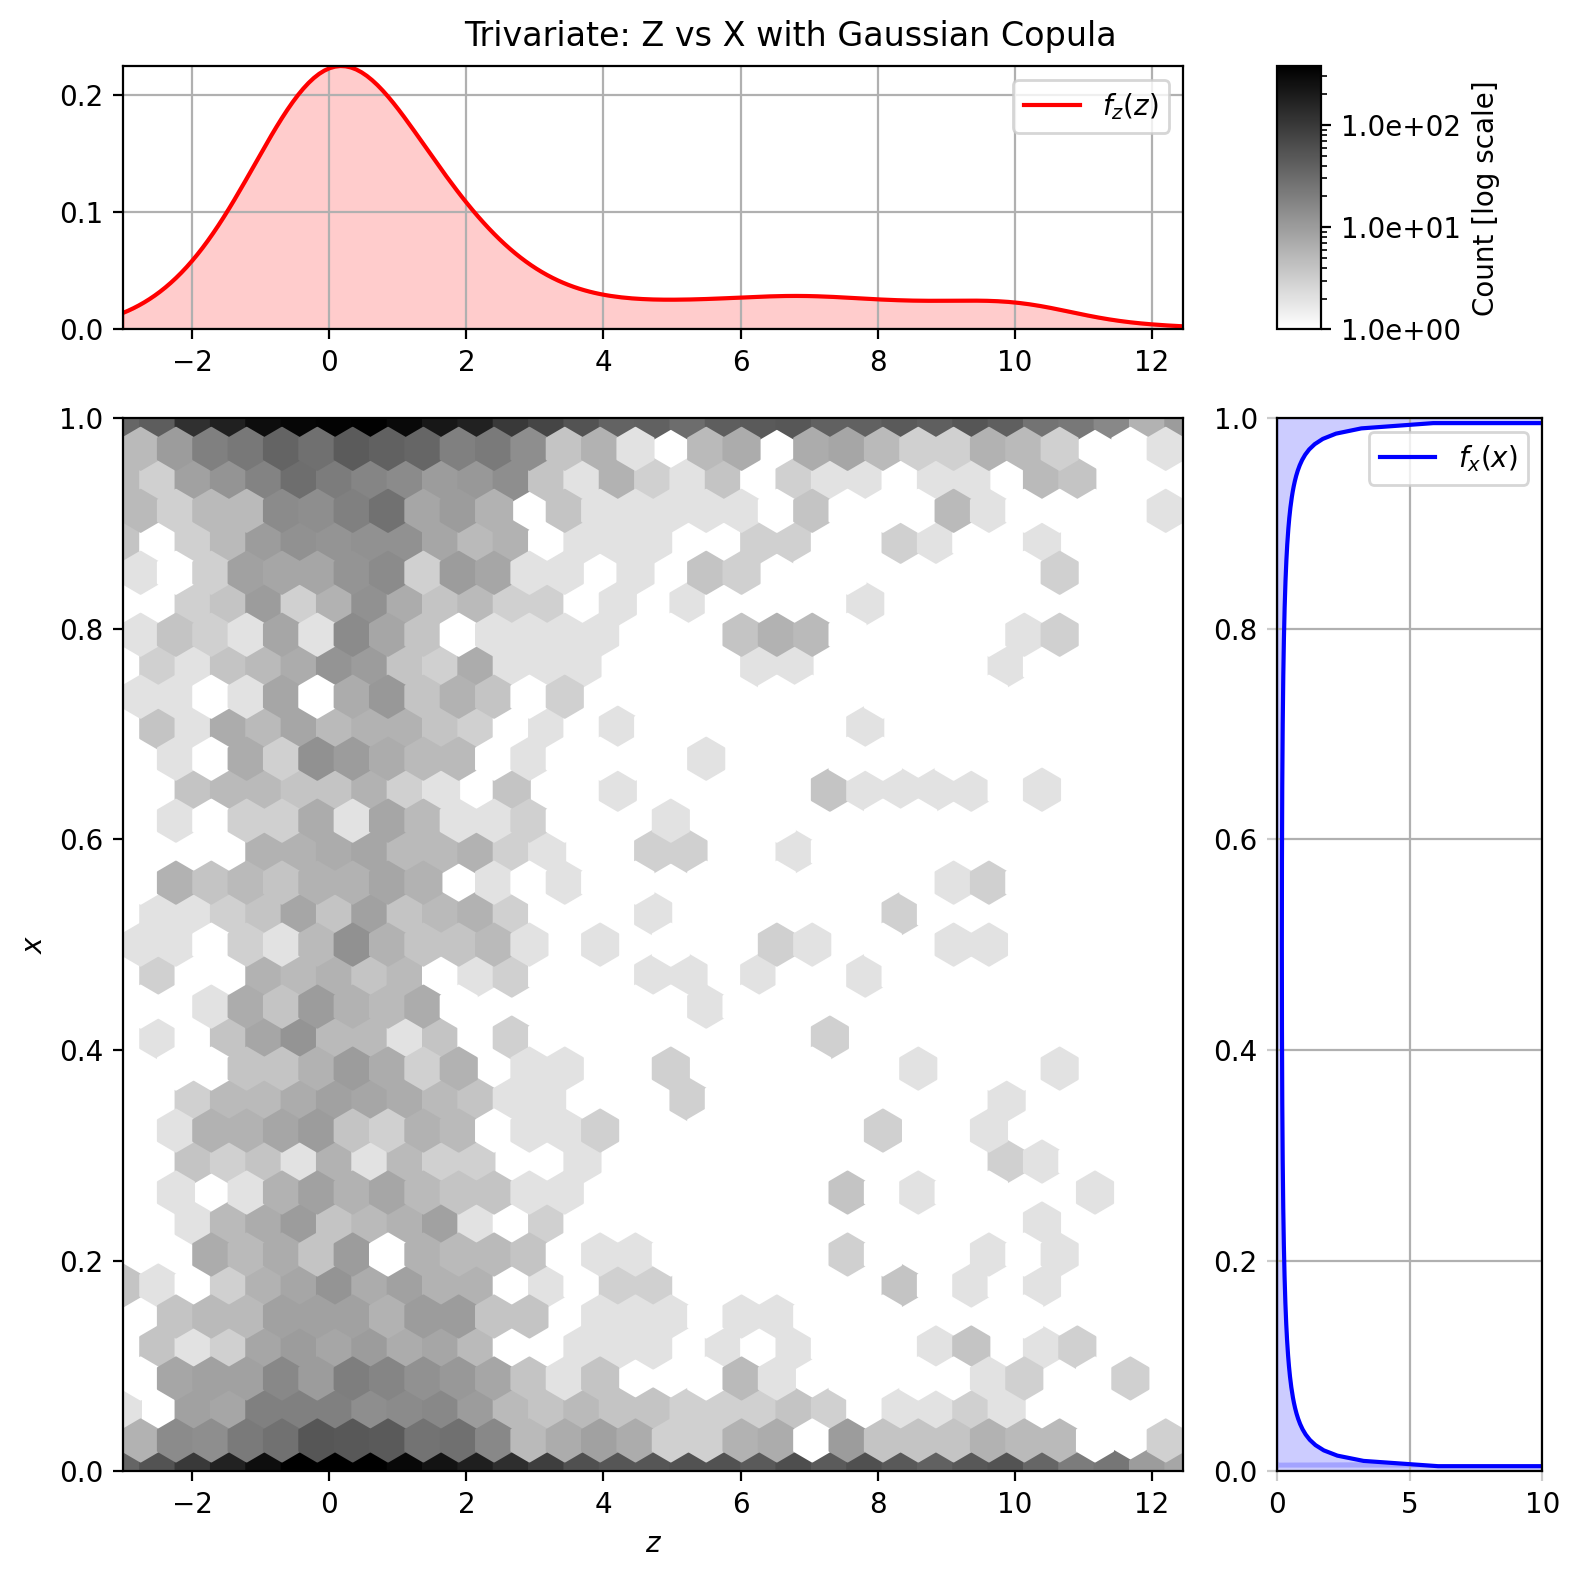

In [93]:
# プロット: Z vs X
fig = plt.figure(figsize=[8,8], dpi=200)
gs = GridSpec(2, 2, height_ratios=[2,8], width_ratios=[8,2])

ax = plt.subplot(gs[2])
con = ax.hexbin(samples['z'], samples['x'], gridsize=30, bins='log', cmap='binary')
ax.set(axisbelow=False)
ax.set(xlabel=r'$z$')
ax.set(ylabel=r'$x$')
ax.autoscale(tight=True)
ax.set(xlim=[np.min(x3),np.max(x3)])
ax.set(ylim=[np.min(x1),np.max(x1)])

ax = plt.subplot(gs[3])
ax.plot(f1, x1, 'blue', label=r'$f_x(x)$')
ax.fill_betweenx(x1, f1, color='blue', alpha=0.2)
ax.tick_params(color="0.8")
ax.autoscale(tight=True)
ax.set(ylim=[np.min(x1),np.max(x1)])
ax.set(xlim=[0,10])
ax.grid()
ax.legend()

ax = plt.subplot(gs[0])
ax.plot(x3, f3, 'red', label=r'$f_z(z)$')
ax.fill_between(x3, f3, color='red', alpha=0.2)
ax.autoscale(tight=True)
ax.set(xlim=[np.min(x3),np.max(x3)])
ax.grid()
ax.legend()

ax = plt.subplot(gs[1])
ax.set_visible(False)
cax = make_axes_locatable(ax).append_axes('left', size='20%', pad=0)
cbar = fig.colorbar(con, cax=cax, format="%.1e")
cbar.ax.set_ylabel('Count [log scale]')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Trivariate: Z vs X with Gaussian Copula')
plt.show()